# KMeans cluster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
country_df=pd.read_csv("country-data.csv")

In [46]:
country_df.head(99)
pd.set_option('display.max_rows', 500)
country_df.head(99)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
#Here is not duplicate value present in this data
country_df[country_df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [5]:
new_data=country_df.drop(columns=['country','gdpp'])

In [6]:
new_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13
...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67


In [7]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(new_data),columns=new_data.columns)
data_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946
...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944


In [8]:
pd.set_option('display.float_format',lambda x: "%.6f" %x)
data_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
std,1.003008,1.003008,1.003008,1.003008,1.003008,1.003008,1.003008,1.003008
min,-0.887138,-1.500192,-1.827827,-1.939940,-0.860326,-1.137852,-4.337186,-1.191250
25%,-0.746619,-0.633337,-0.692211,-0.691479,-0.717456,-0.566641,-0.592758,-0.763902
50%,-0.471798,-0.223528,-0.181001,-0.148743,-0.373808,-0.226950,0.286958,-0.356431
75%,0.592667,0.374720,0.651541,0.491353,0.294237,0.281636,0.704258,0.617525
max,4.221297,5.813835,4.047436,5.266181,5.611542,9.129718,1.380962,3.009349


In [9]:
data_scaled_copy=data_scaled.copy(deep=True)

{1: 1336.0, 2: 920.7664031311609, 3: 774.143411908239, 4: 657.7770477963129, 5: 589.8790583293348, 6: 510.0370874009146, 7: 451.3880196655711, 8: 404.5746532606553, 9: 377.9194771769973}


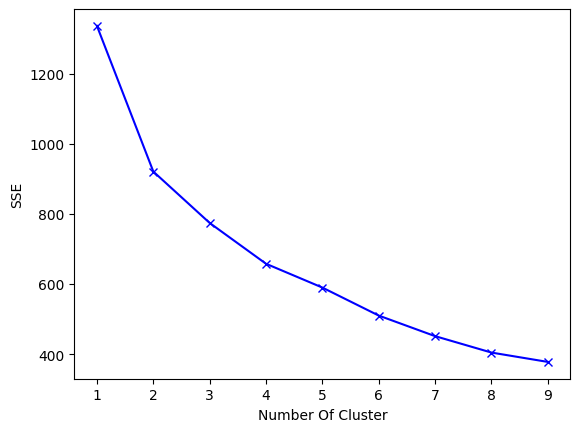

In [36]:
#KMeans Clustering
sse={}
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=1).fit(data_scaled)
    # for k in no of cluster and inertia_ is sum of square of distance from the clusters
    sse[k]=kmeans.inertia_
print(sse)
# Elbow plot
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel("Number Of Cluster")
plt.ylabel("SSE")
plt.show()


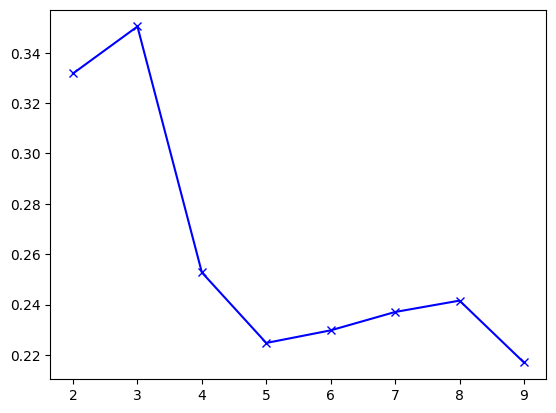

In [54]:
# silhouette_score
# The Silhouette score is used to measure the degree of separation between clusters when the points are 
# nearer to cluter but cluster is more far away from each other so that sihoutte score should be high
# And here is distance between two cluster so range must be start with two
sc={}
for k in range (2,10):
    kmeans=KMeans(n_clusters=k,random_state=1).fit(data_scaled)
    label=kmeans.predict(data_scaled)
    sc[k]=silhouette_score(data_scaled,label)
    
plt.figure()
plt.plot(list(sc.keys()),list(sc.values()),'bx-')
plt.show()
# so from elbow from 2 to 8 cluster is good and from silhouette_score it clear that between 3 cluster
# is the best to take here we choose K=3 cluster

    

In [57]:
# Now I run the my final clustering
kmeans= KMeans(n_clusters=3,random_state=1)
kmeans.fit(data_scaled)
# adding column of kmean_label in both copytable and the original data 
data_scaled_copy["KMean_label"]=kmeans.predict(data_scaled)
data_scaled_copy

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,KMean_label
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,0
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,0
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,1


In [67]:
country_df["KMean_label"]=kmeans.predict(data_scaled)
country_df
country_df["KMean_label"].value_counts()
#from output we get that my 1st cluster contain 112 country and other is 52 and one other is 3 country 

0    112
1     52
2      3
Name: KMean_label, dtype: int64

In [81]:
mean=country_df.groupby('KMean_label').mean()
median=country_df.groupby('KMean_label').median()
df_kmeans=pd.concat([mean,median],axis=0)
df_kmeans.T

C:\Users\chemi\AppData\Local\Temp\ipykernel_13380\2042542975.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean=country_df.groupby('KMean_label').mean()
C:\Users\chemi\AppData\Local\Temp\ipykernel_13380\2042542975.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median=country_df.groupby('KMean_label').median()


KMean_label,0,1,2,0,1,2
child_mort,15.703571,88.844231,4.133333,12.450000,85.650000,2.800000
exports,43.487500,28.203827,176.000000,39.600000,23.300000,175.000000
health,7.069464,6.270385,6.793333,6.790000,5.480000,7.770000
imports,46.143750,42.164729,156.666667,44.900000,39.750000,154.000000
income,22069.285714,3832.750000,64033.333333,16250.000000,1960.000000,72100.000000
inflation,6.042920,11.833750,2.468000,3.810000,8.950000,3.620000
life_expec,75.215179,59.892308,81.433333,75.800000,60.450000,81.300000
total_fer,2.119821,4.822115,1.380000,1.995000,5.000000,1.360000
gdpp,16937.535714,1832.884615,57566.666667,8580.000000,932.000000,46600.000000


In [87]:
country_df[country_df.KMean_label==0].tail(50)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_label
90,Lithuania,6.100000,65.300000,7.040000,67.200000,21100,2.380000,73.200000,1.500000,12000,0
92,"Macedonia, FYR",10.400000,39.800000,7.090000,58.100000,11400,2.040000,74.000000,1.470000,4540,0
95,Malaysia,7.900000,86.900000,4.390000,71.000000,21100,7.270000,74.500000,2.150000,9070,0
96,Maldives,13.200000,77.600000,6.330000,65.400000,10500,2.880000,77.900000,2.230000,7100,0
100,Mauritius,15.000000,51.200000,6.000000,62.200000,15900,1.130000,73.400000,1.570000,8000,0
101,"Micronesia, Fed. Sts.",40.000000,23.500000,14.200000,81.000000,3340,3.800000,65.400000,3.460000,2860,0
102,Moldova,17.200000,39.200000,11.700000,78.500000,3910,11.100000,69.700000,1.270000,1630,0
103,Mongolia,26.100000,46.700000,5.440000,56.700000,7710,39.200000,66.200000,2.640000,2650,0
104,Montenegro,6.800000,37.000000,9.110000,62.700000,14000,1.600000,76.400000,1.770000,6680,0
105,Morocco,33.500000,32.200000,5.200000,43.000000,6440,0.976000,73.500000,2.580000,2830,0


# Herrarichal clustering

In [7]:
import pandas as pd
import numpy as np

In [8]:
cric_df=pd.read_csv("cricket.csv",encoding="latin1")

In [9]:
cric_df[["start" ,"End"]]=cric_df.Span.str.split("-",expand=True)

In [10]:
cric_df[["start","End"]]=cric_df[["start","End"]].astype(int)

In [11]:
cric_df["Exp"]=cric_df["End"]-cric_df["start"]

In [12]:
cric_df=cric_df.drop(["Span","start","End"],axis=1)

In [13]:
cric_df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
viz_col=cric_df.columns
viz_col=viz_col.drop("Player")

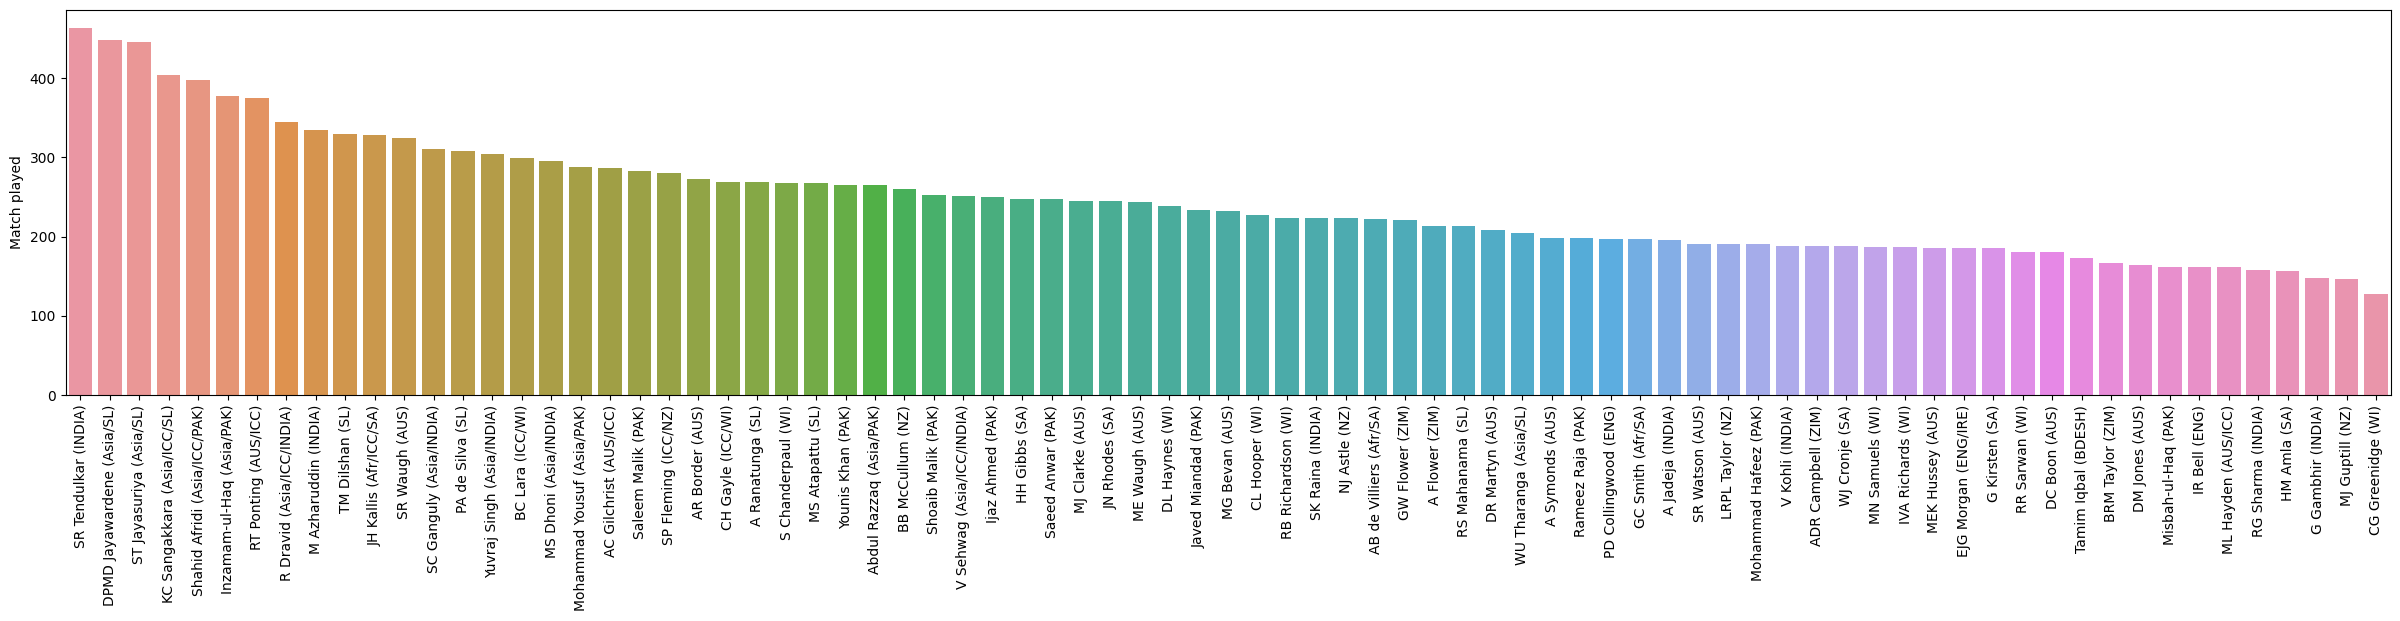

In [16]:

plt.figure(figsize=(30,5))
mat=cric_df[["Player","Mat"]].sort_values("Mat",ascending=False)
ax=sns.barplot(x="Player",y='Mat',data=mat)
ax.set(xlabel="",ylabel="Match played")
plt.xticks(rotation=90)
plt.show()

In [17]:
cric_df.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'Exp'],
      dtype='object')

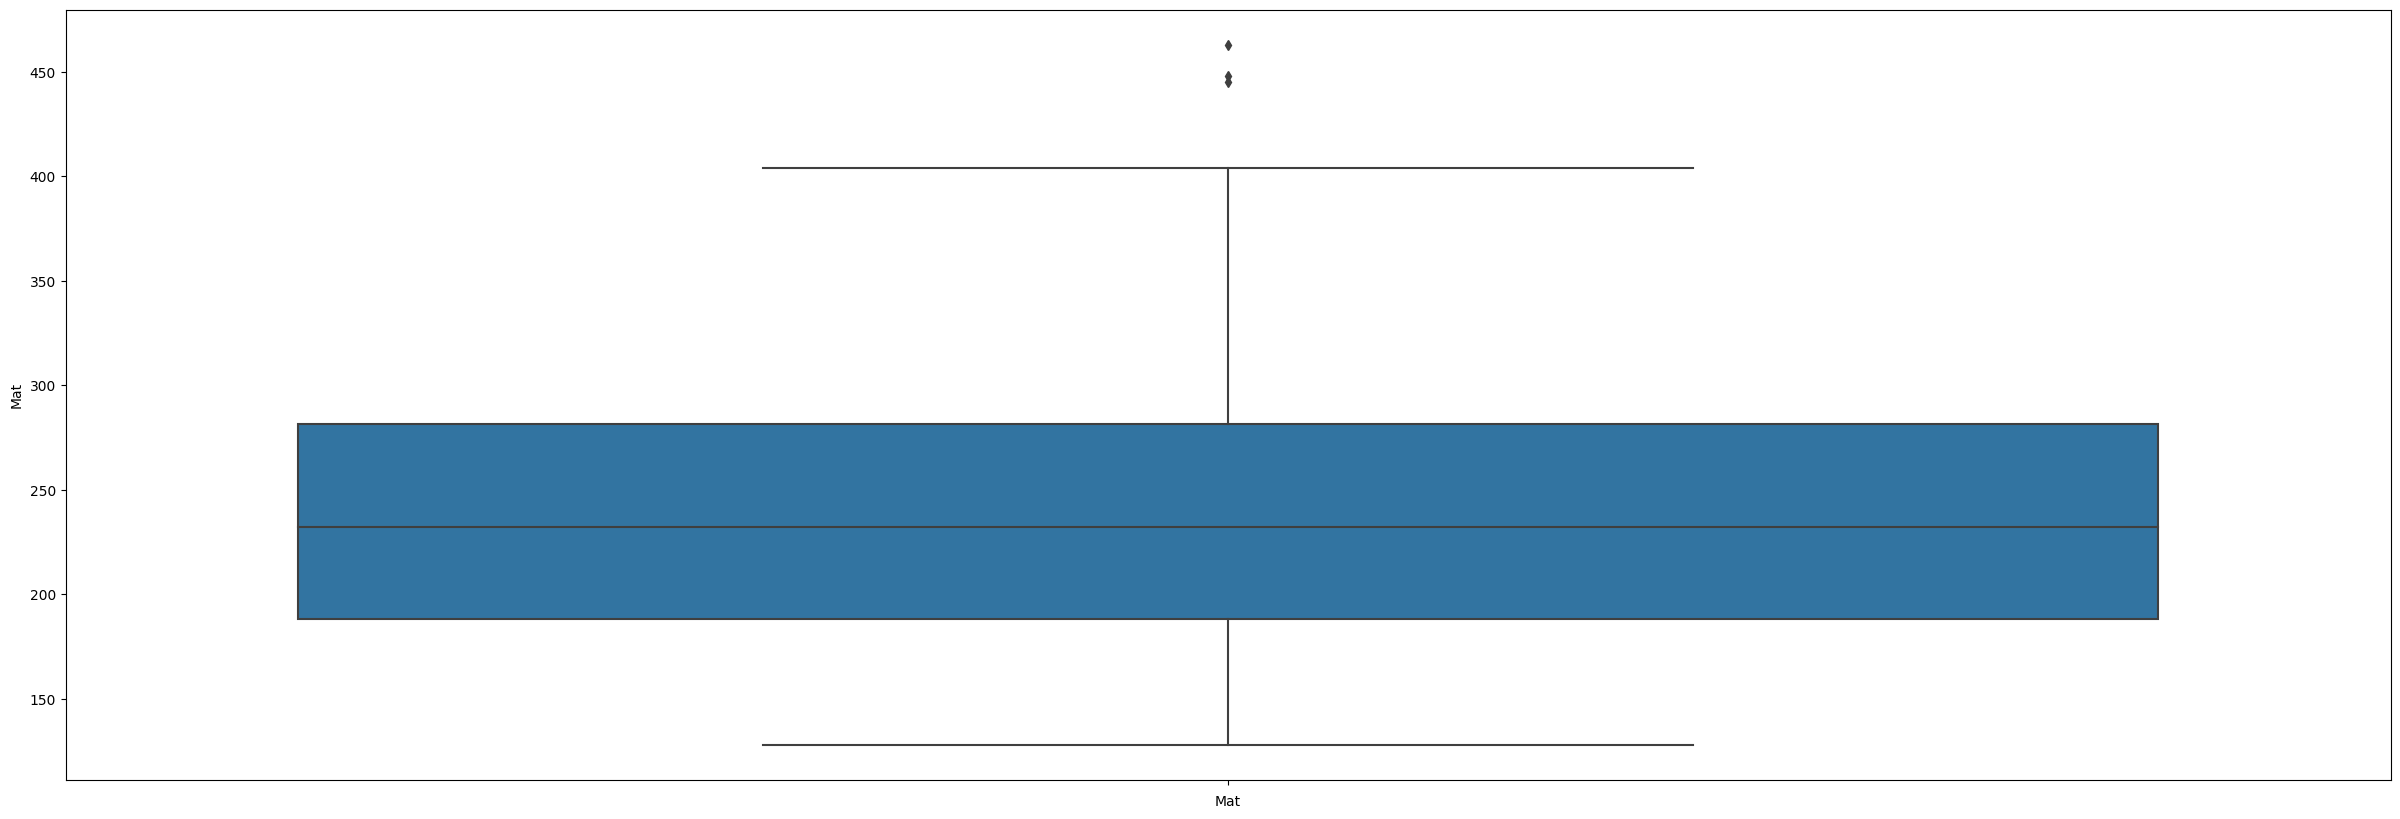

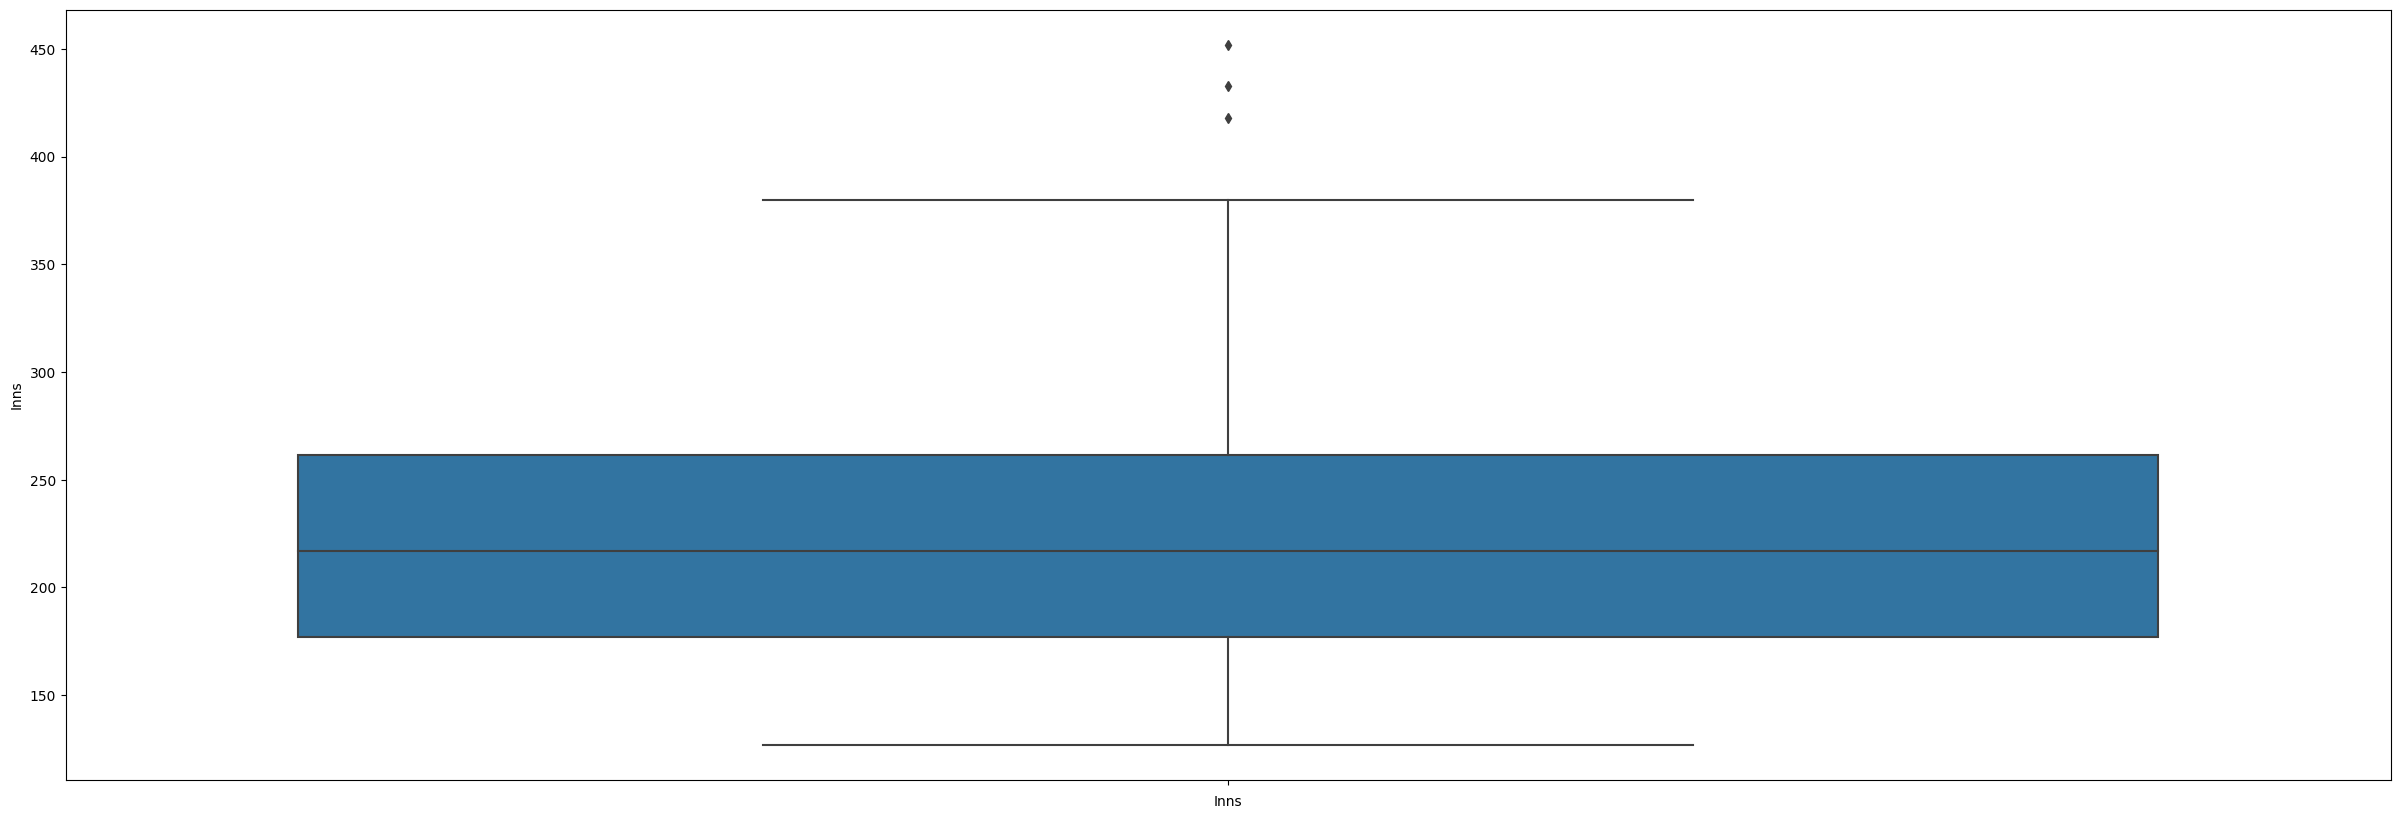

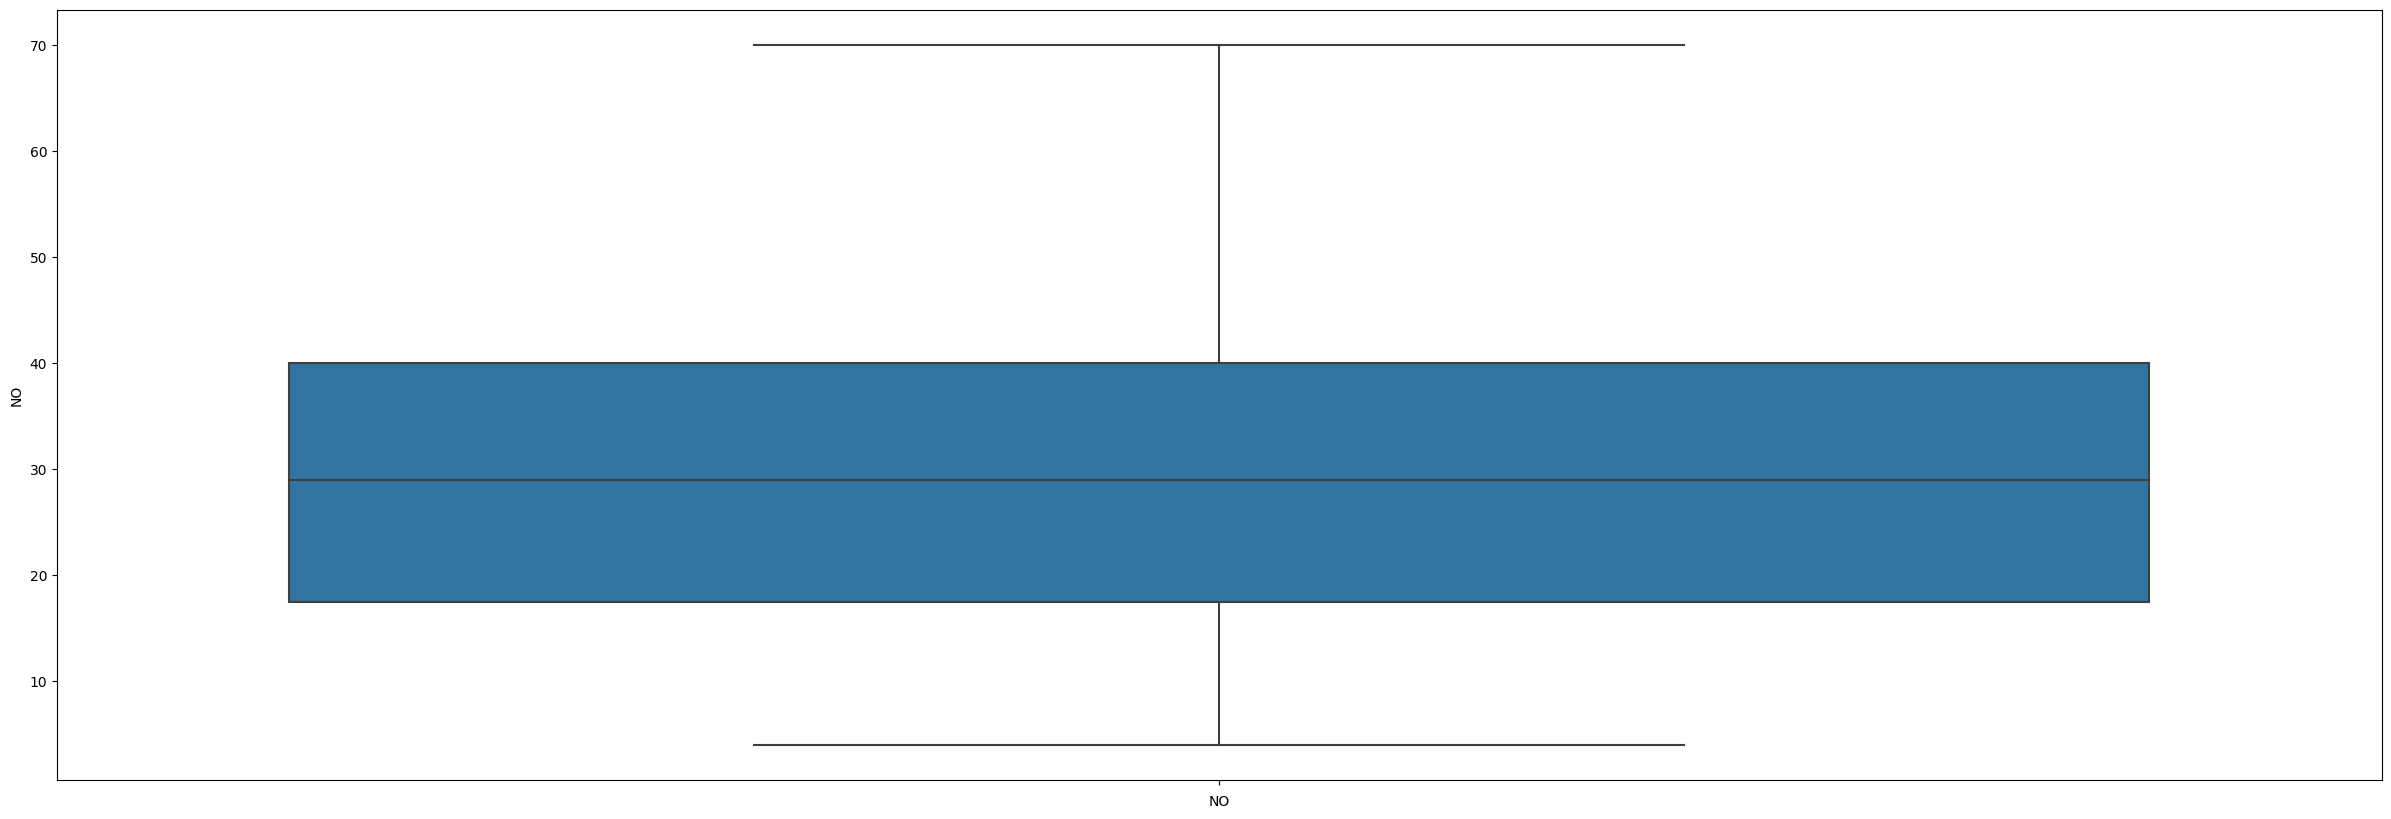

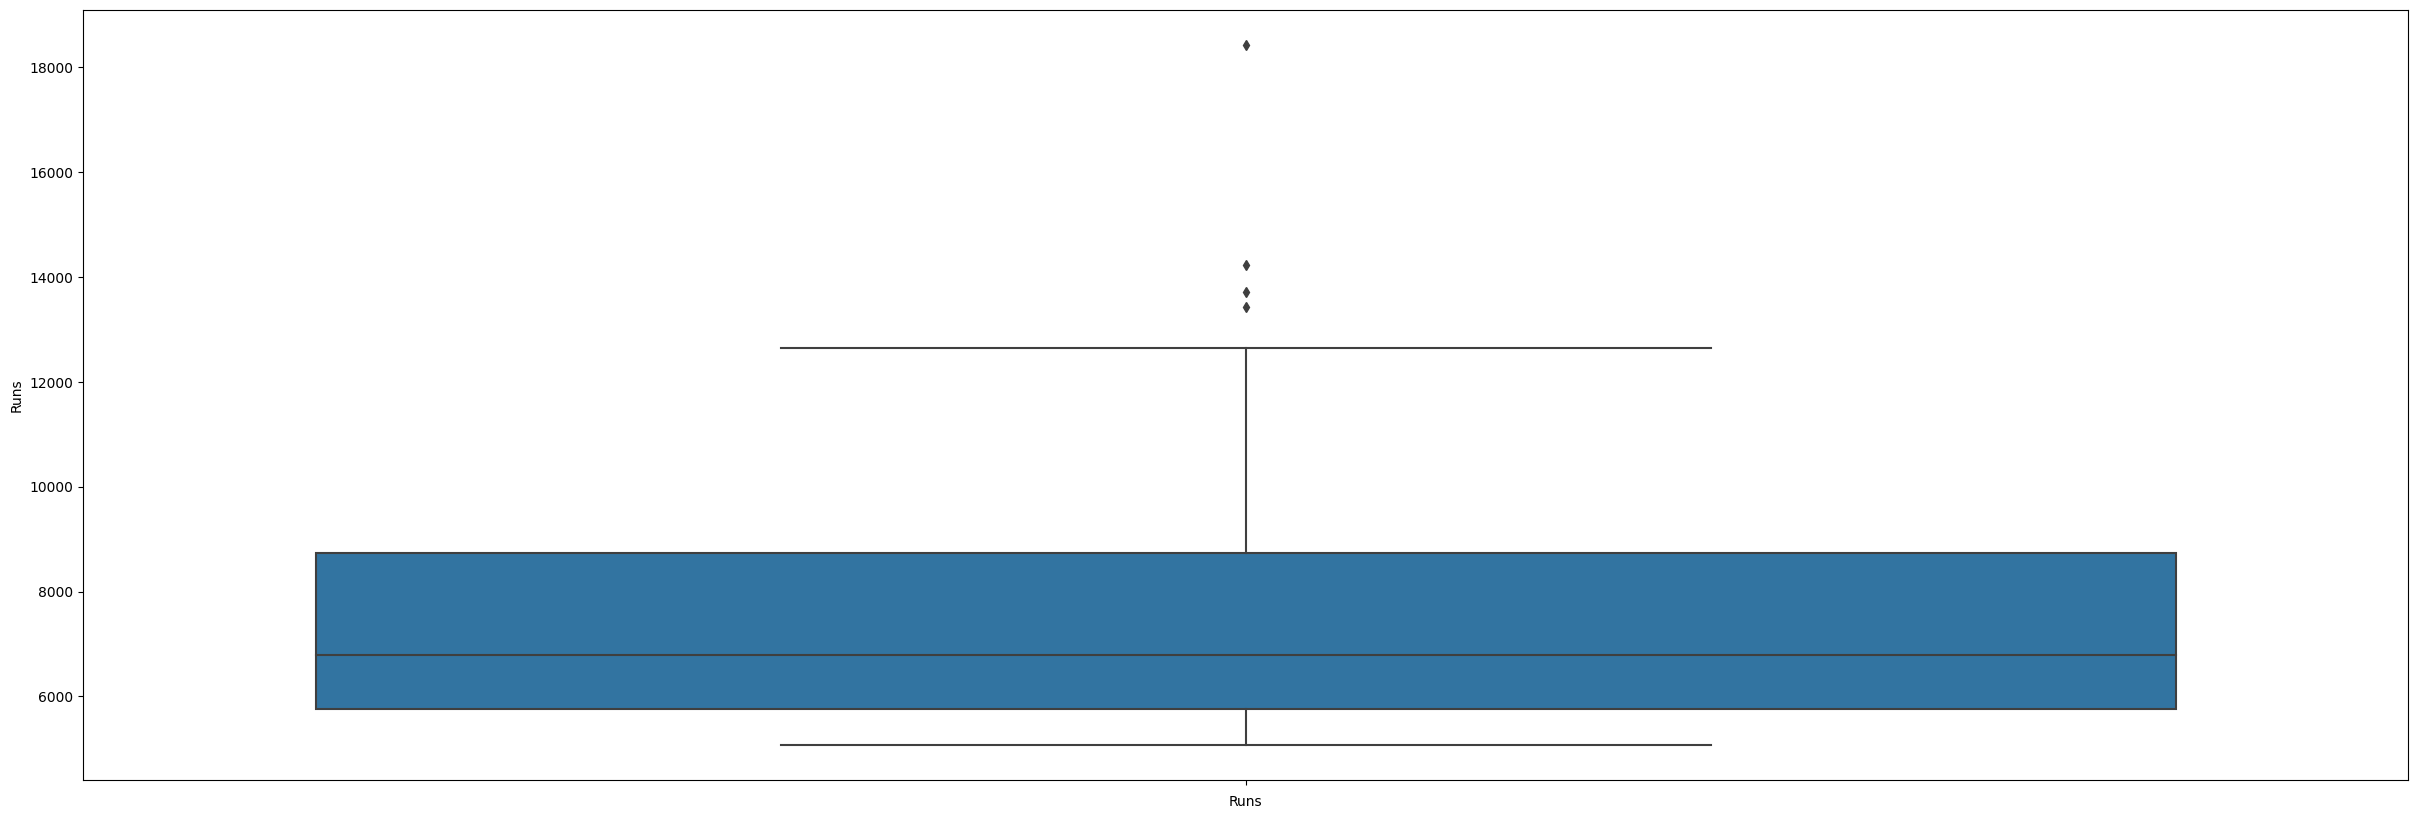

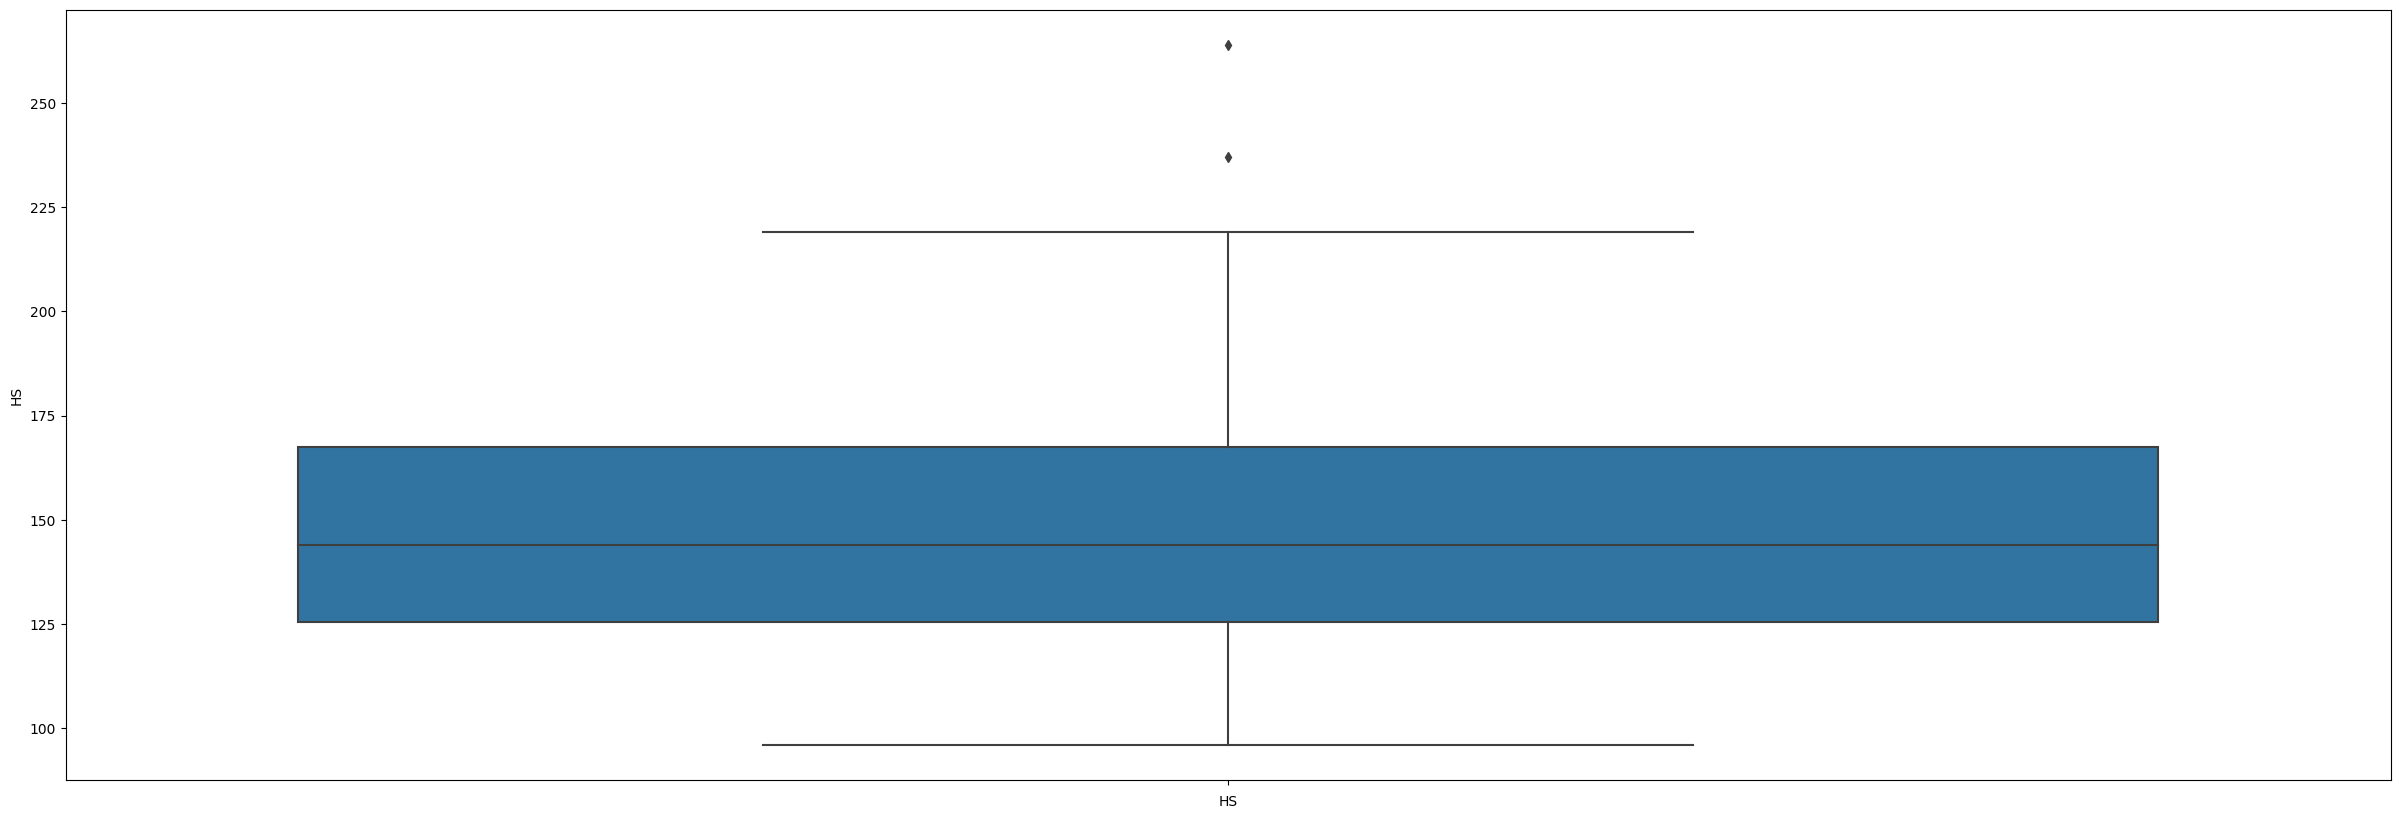

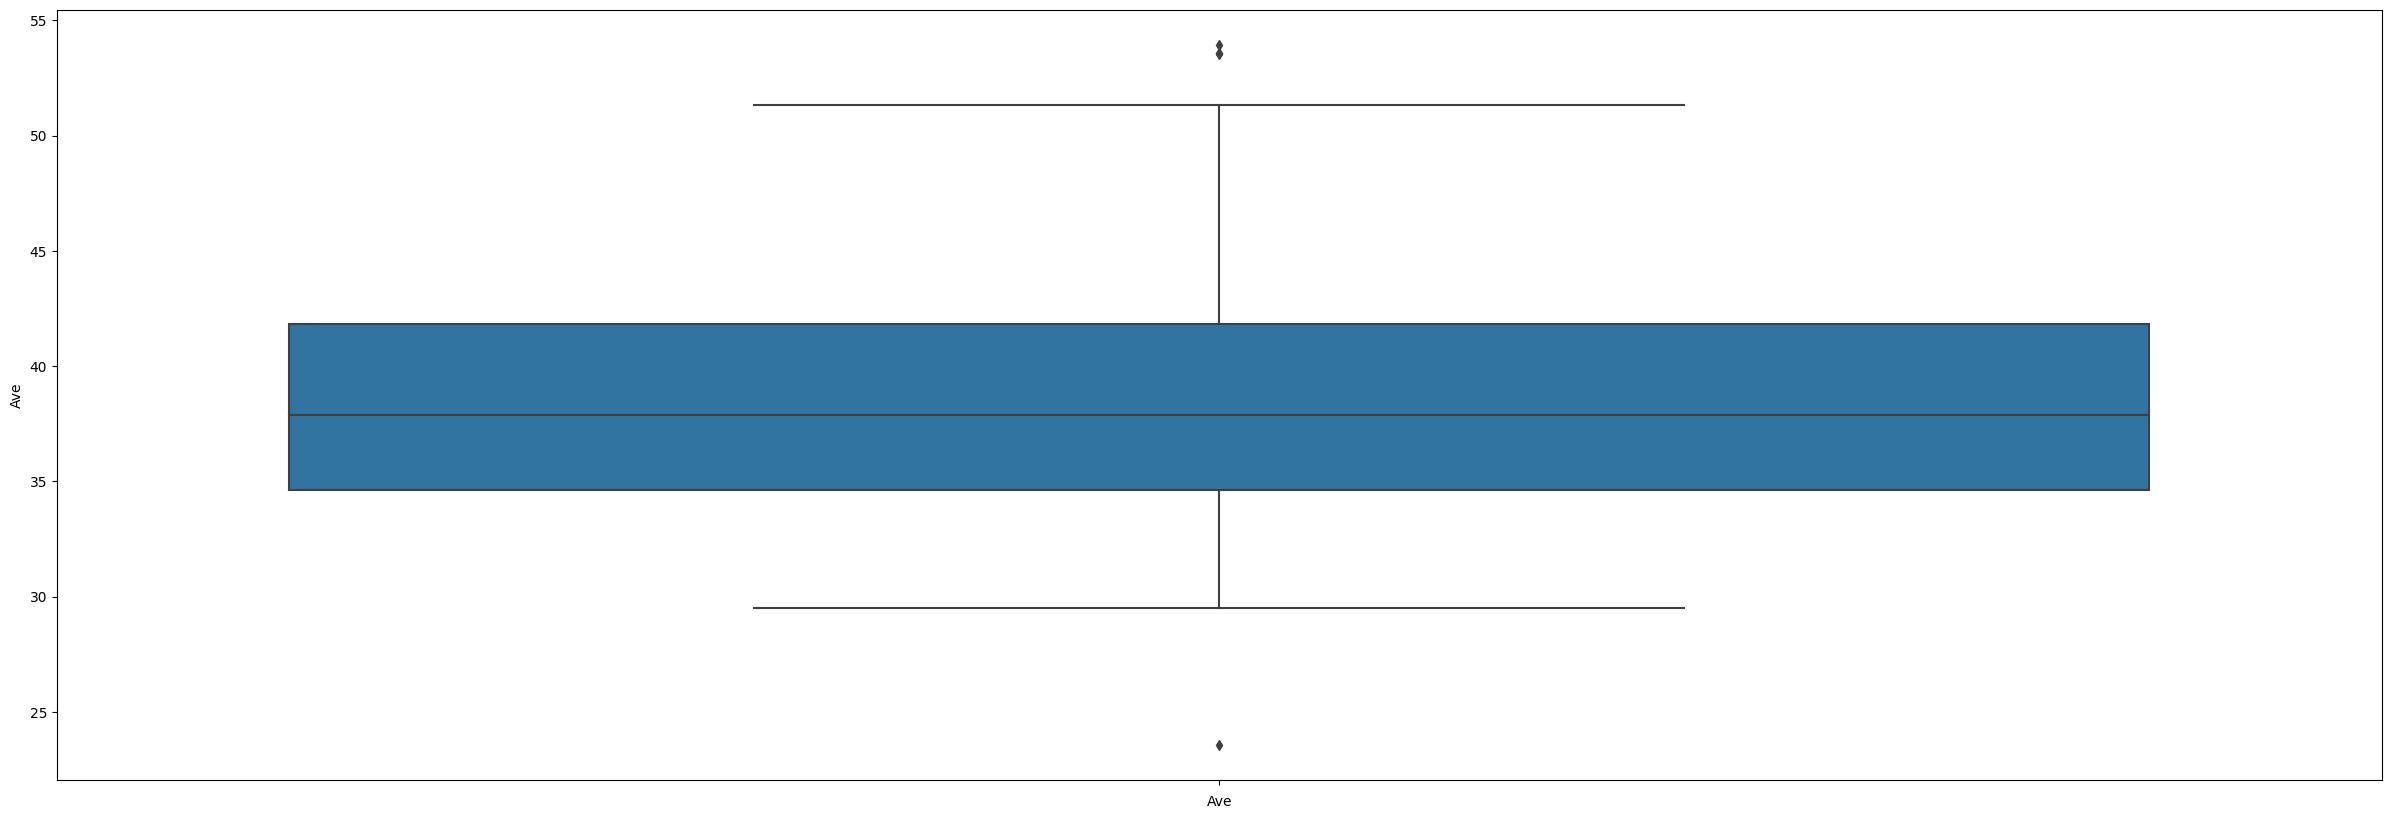

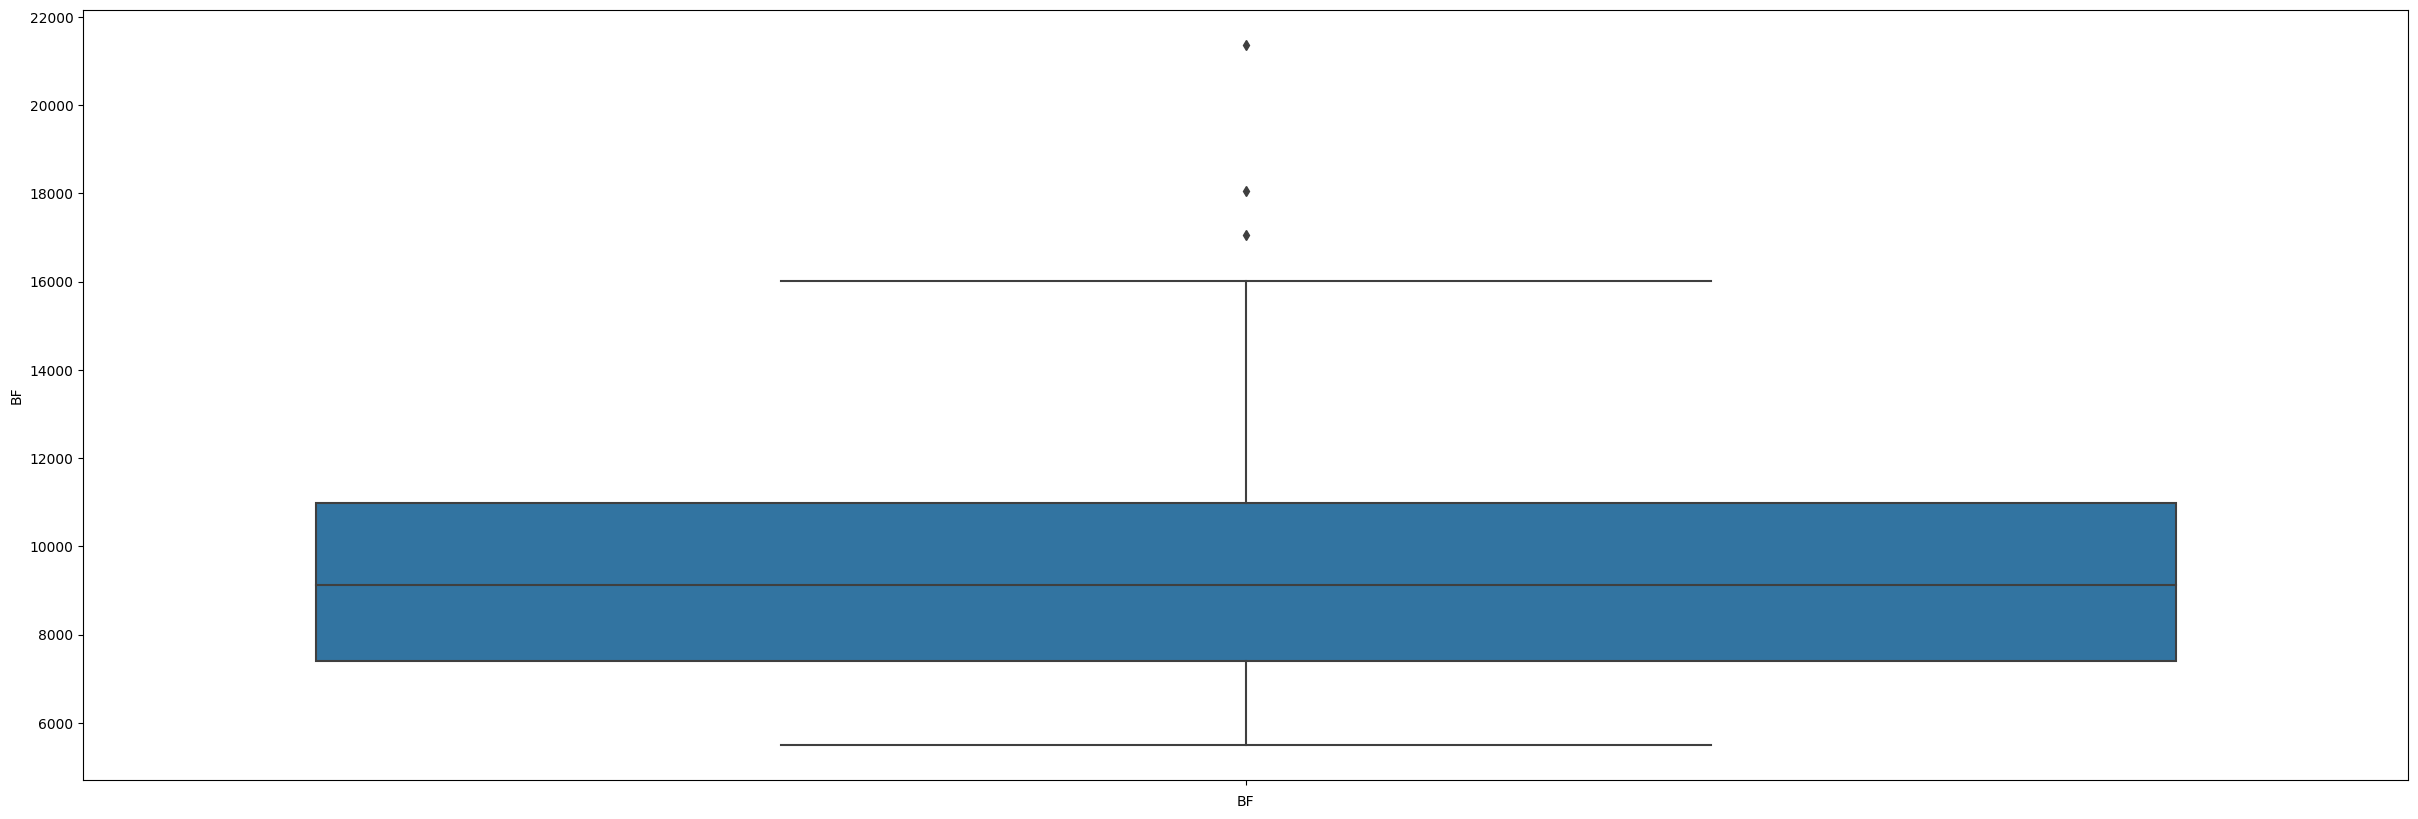

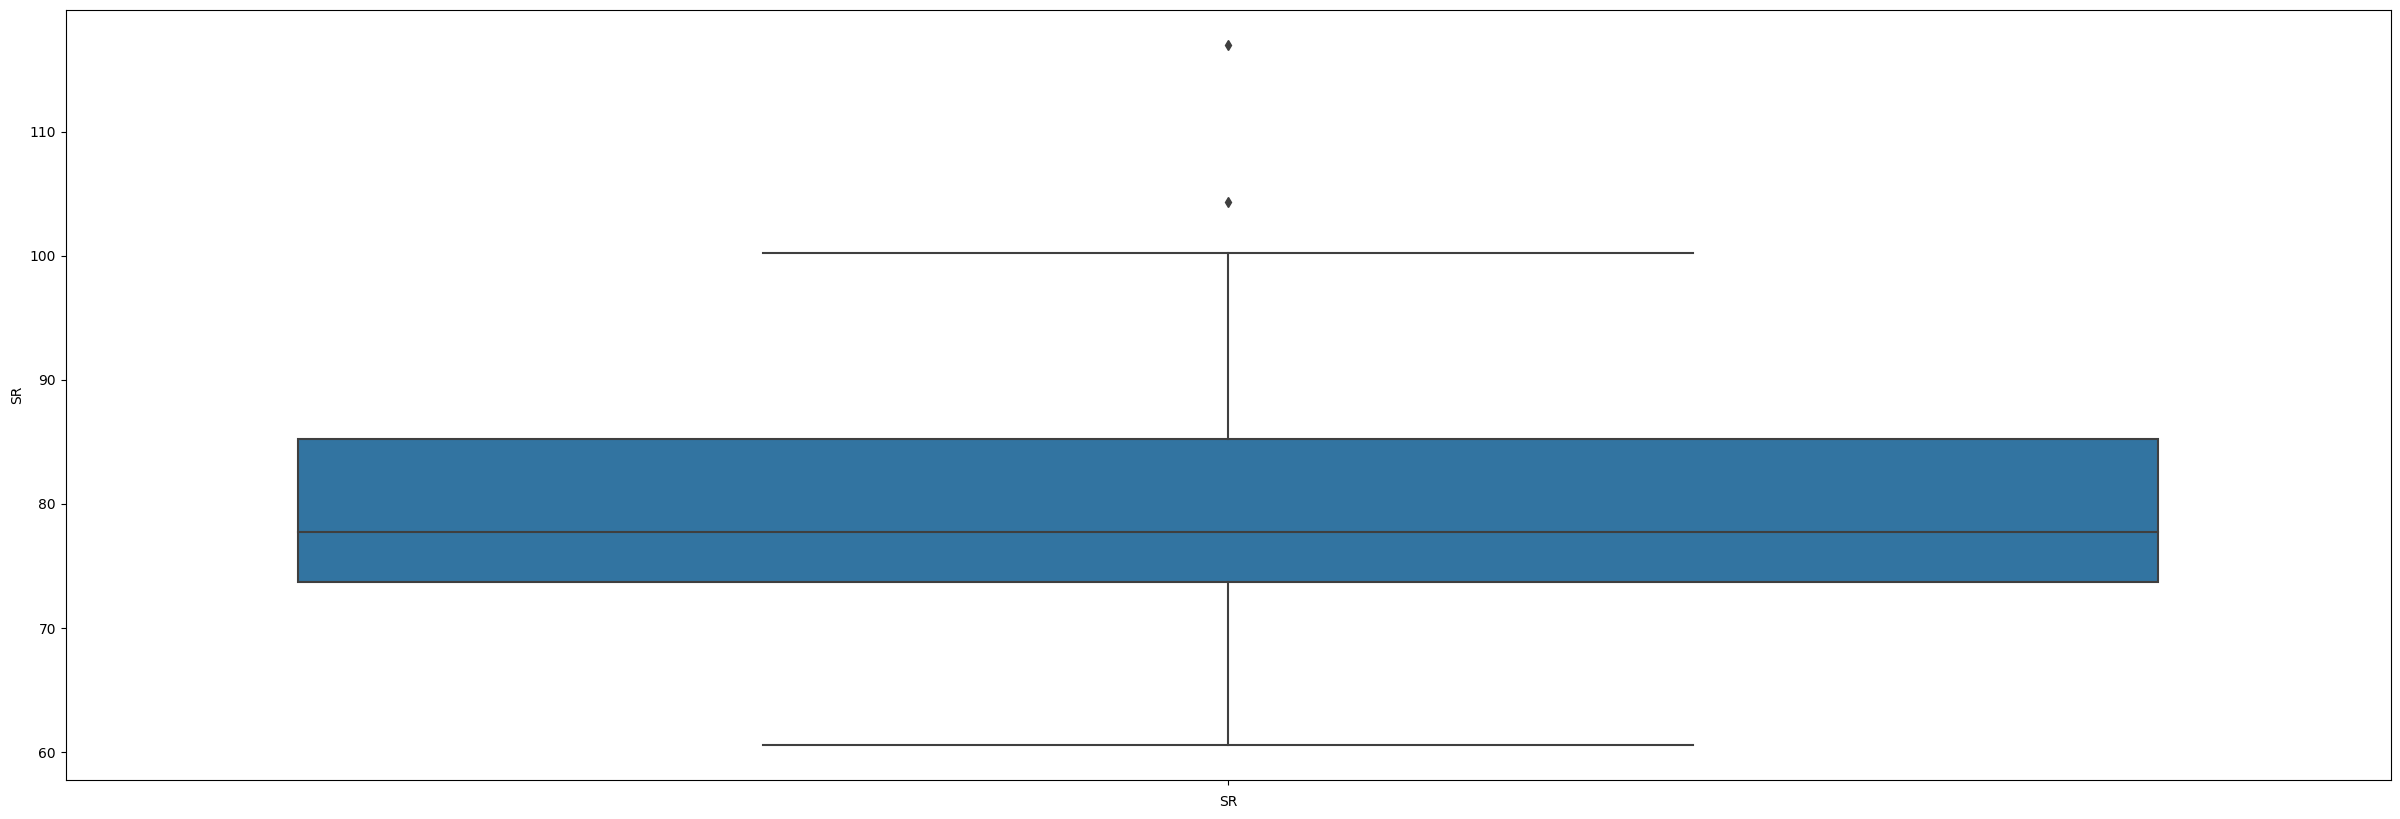

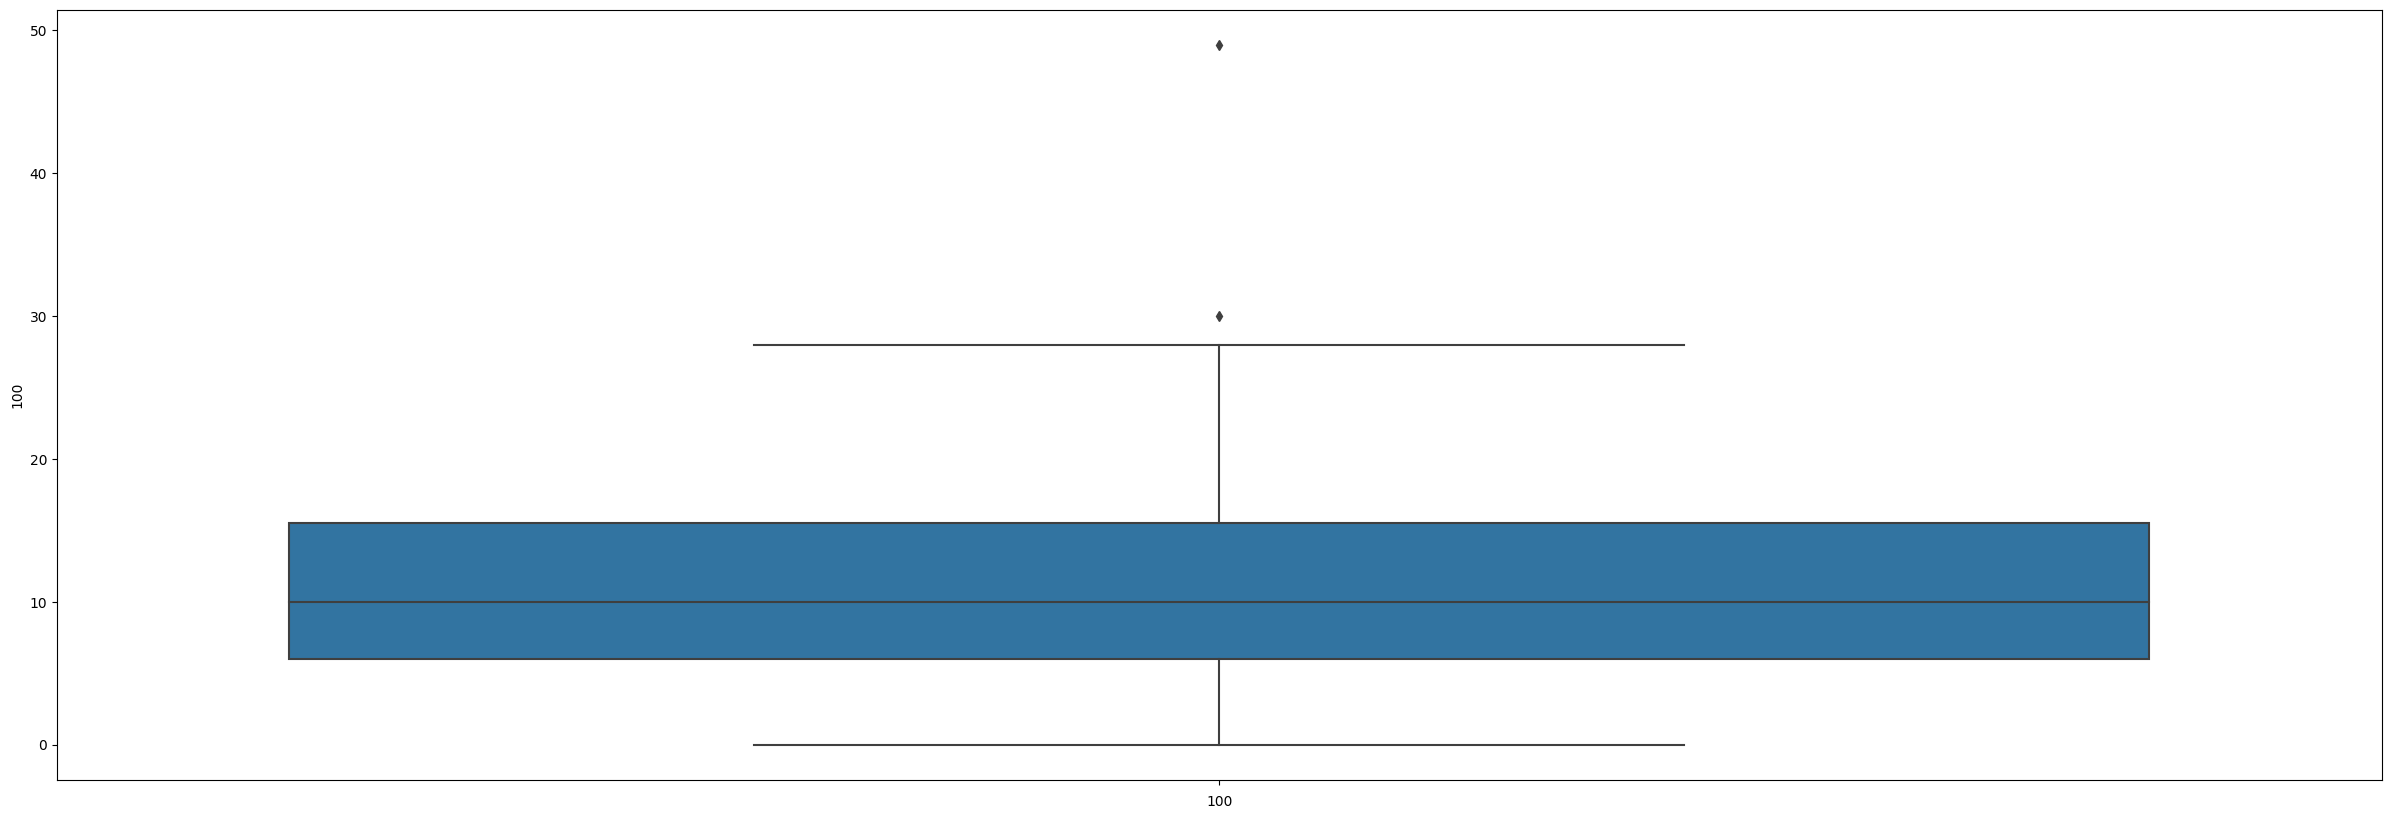

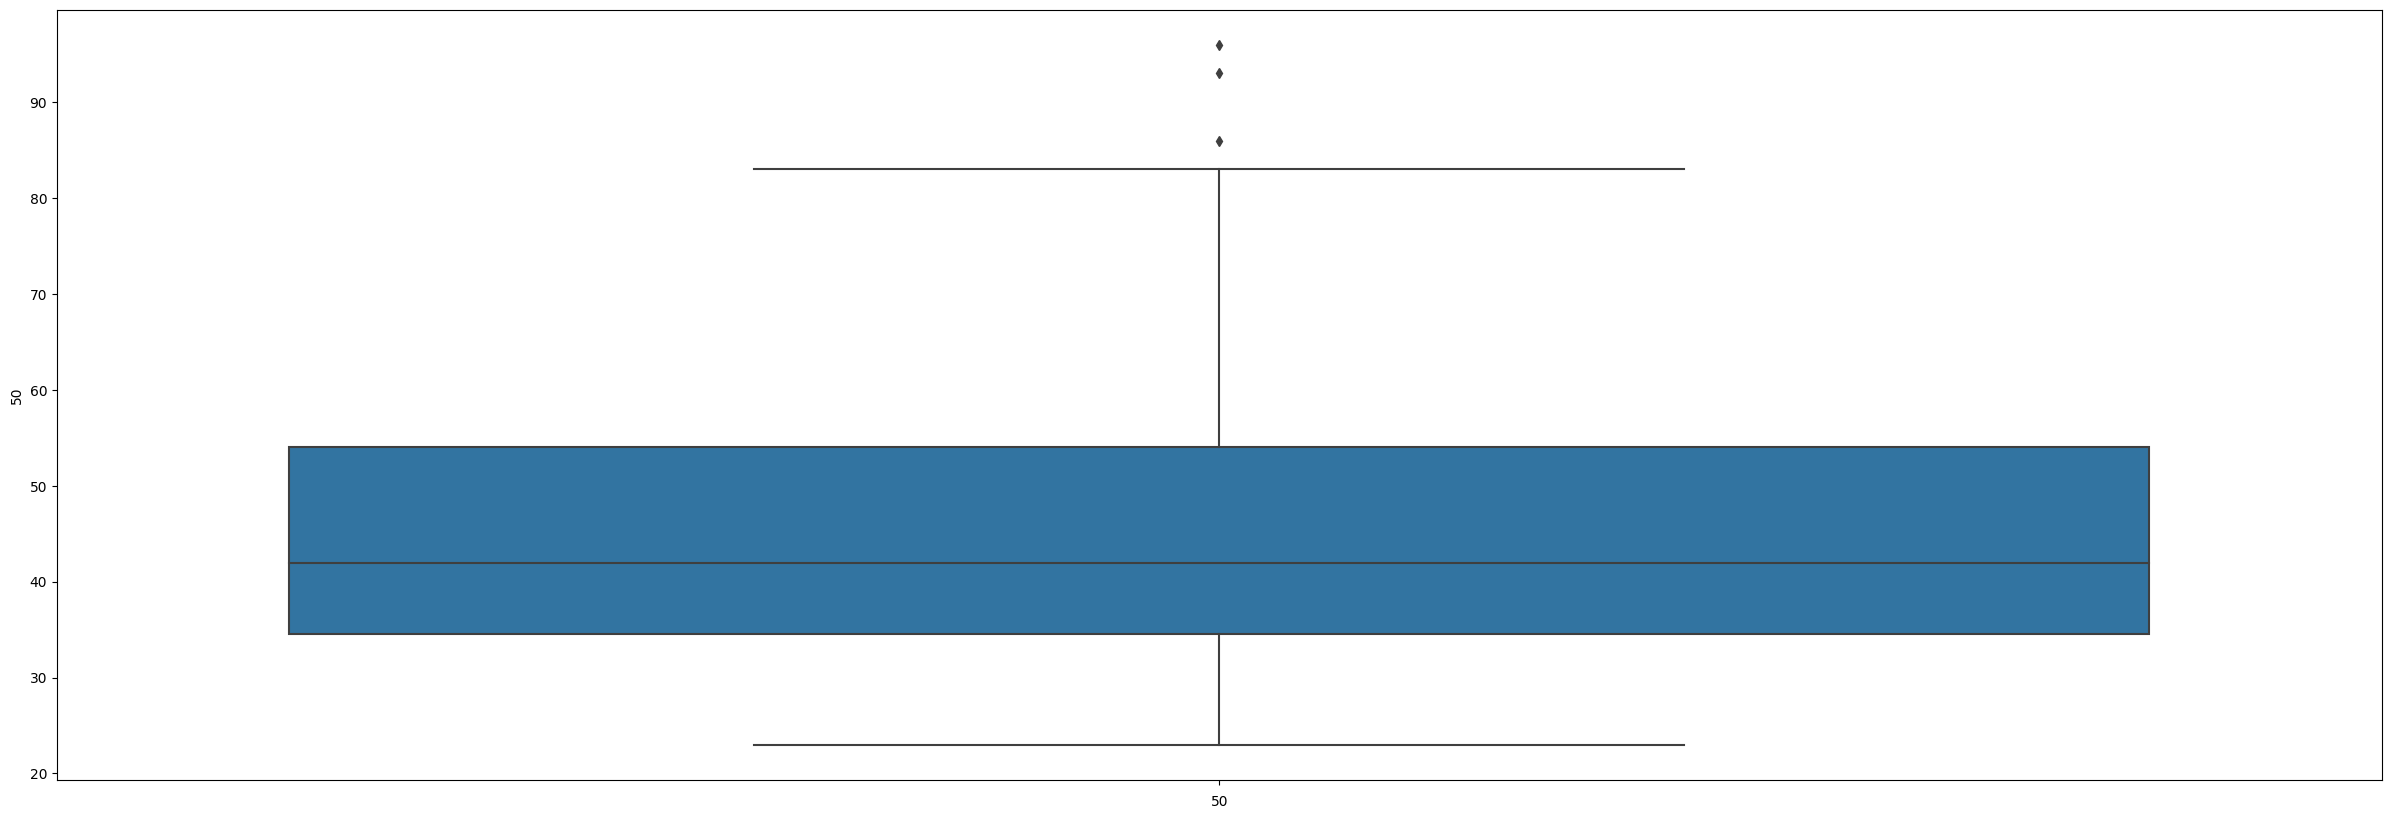

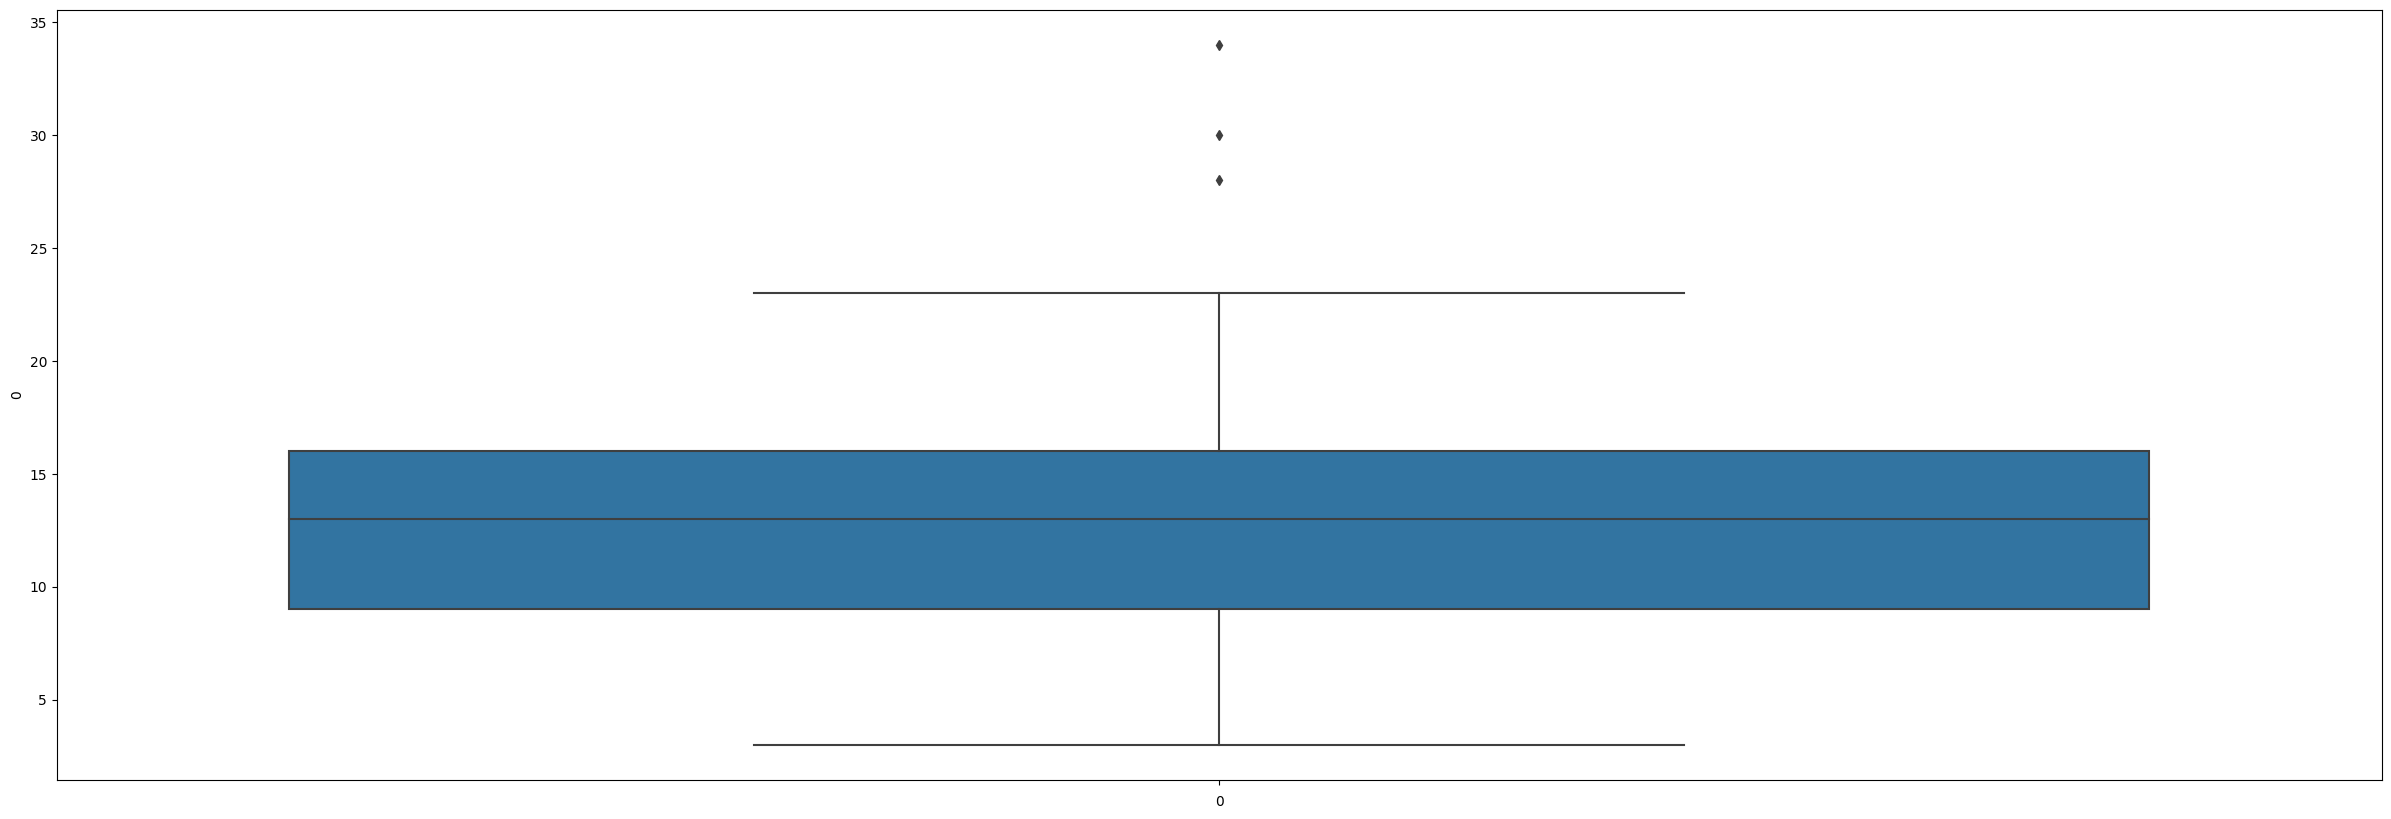

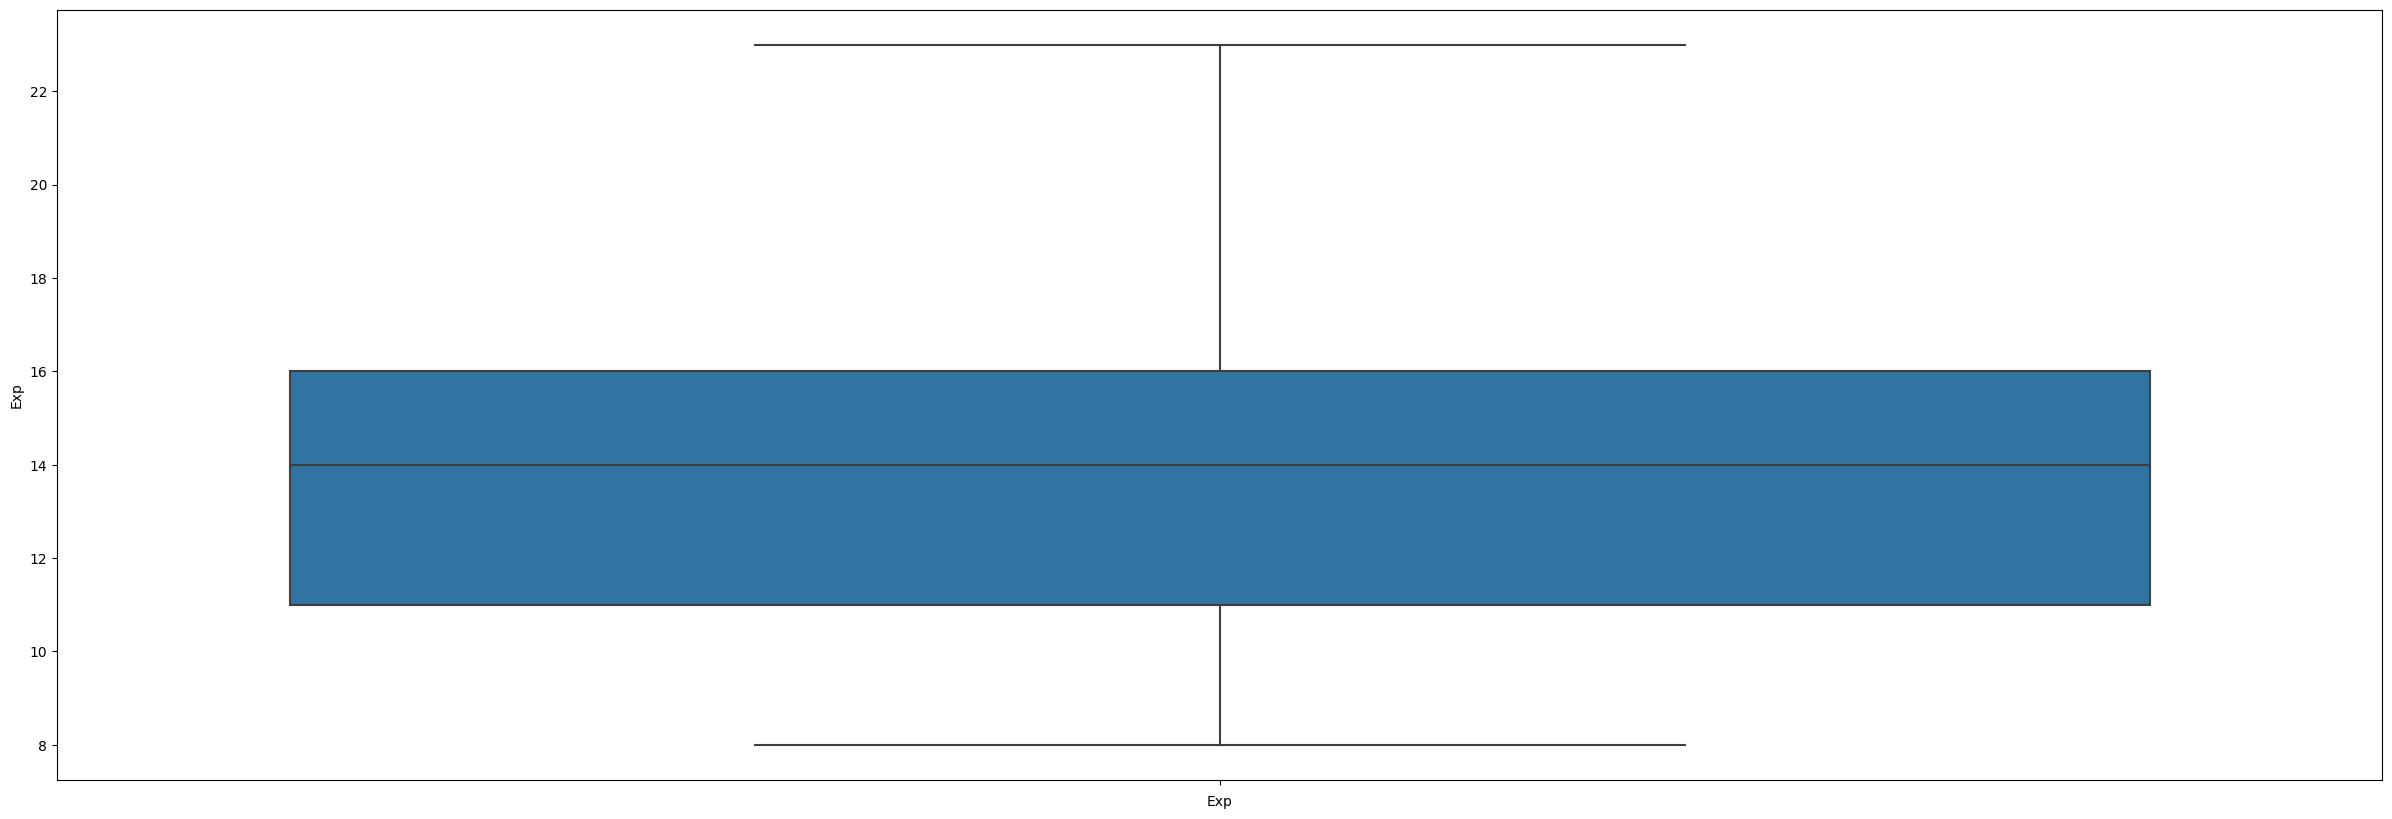

In [18]:
for i in cric_df.columns:
    if i!= "Player":
        plt.figure(figsize=(30,10))
        sns.boxplot(y=i,data=cric_df)
        plt.xlabel(i)
        plt.xticks(rotation=90)
        plt.show()

In [19]:
# Here we assining the replace the oultier with the 98% quantile and 1% quantile
for i in cric_df.columns:
    if i != "Player":
        Q3=cric_df[i].quantile(0.98)
        Q1=cric_df[i].quantile(0.01)
        cric_df[i][cric_df[i]<=Q1]=Q1
        cric_df[i][cric_df[i]>=Q3]=Q3

C:\Users\chemi\AppData\Local\Temp\ipykernel_6332\2012970665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cric_df[i][cric_df[i]<=Q1]=Q1
C:\Users\chemi\AppData\Local\Temp\ipykernel_6332\2012970665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cric_df[i][cric_df[i]>=Q3]=Q3


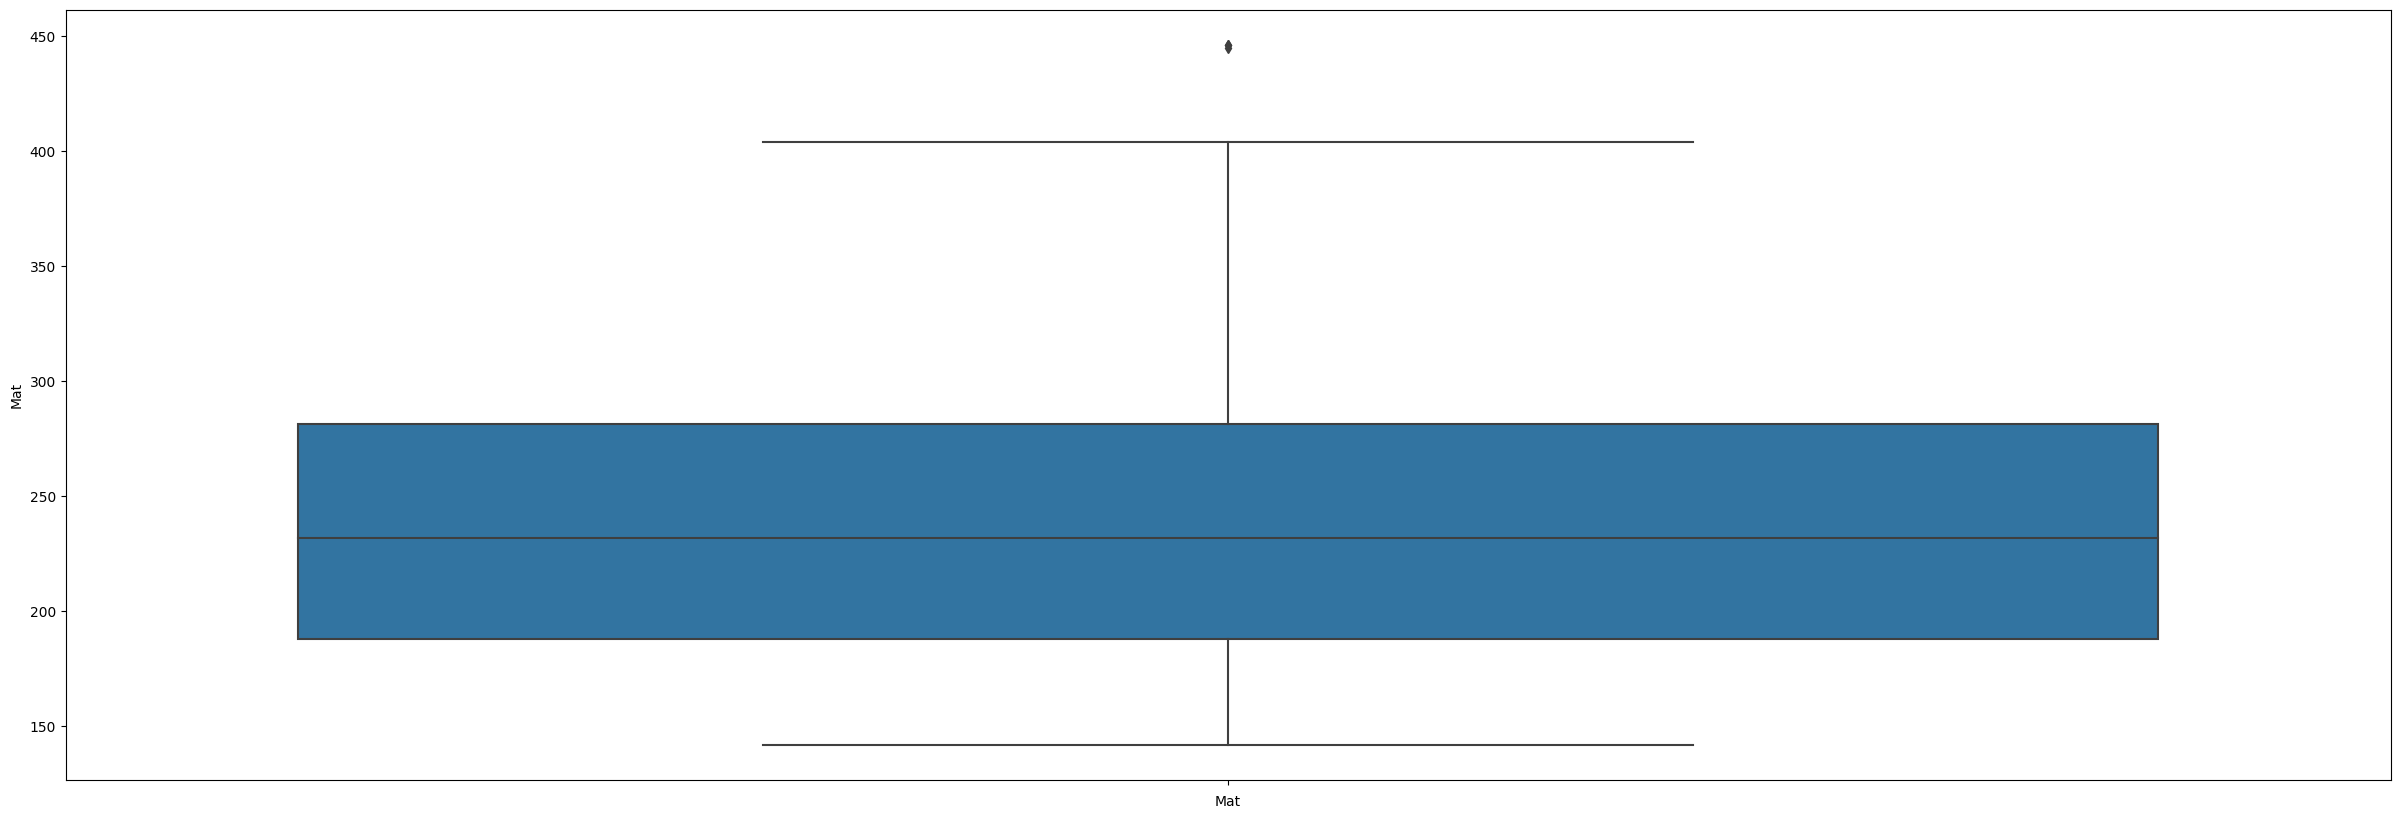

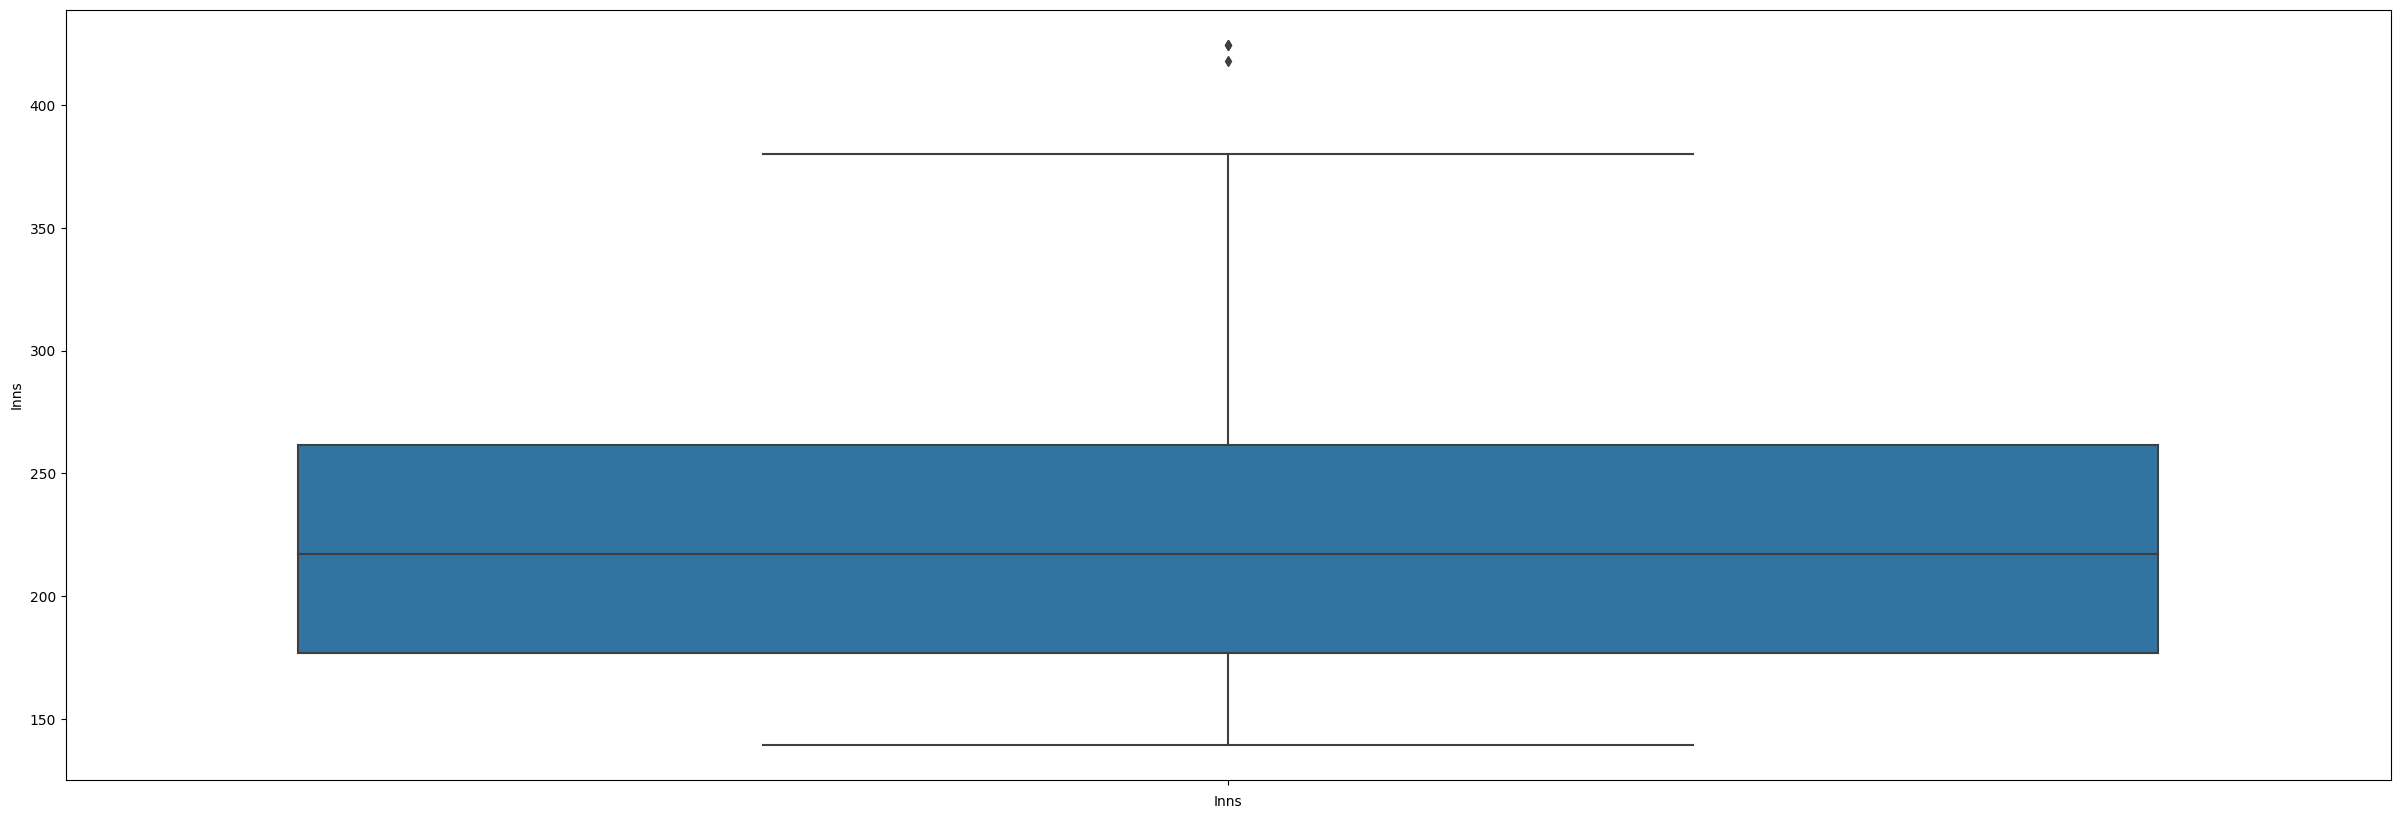

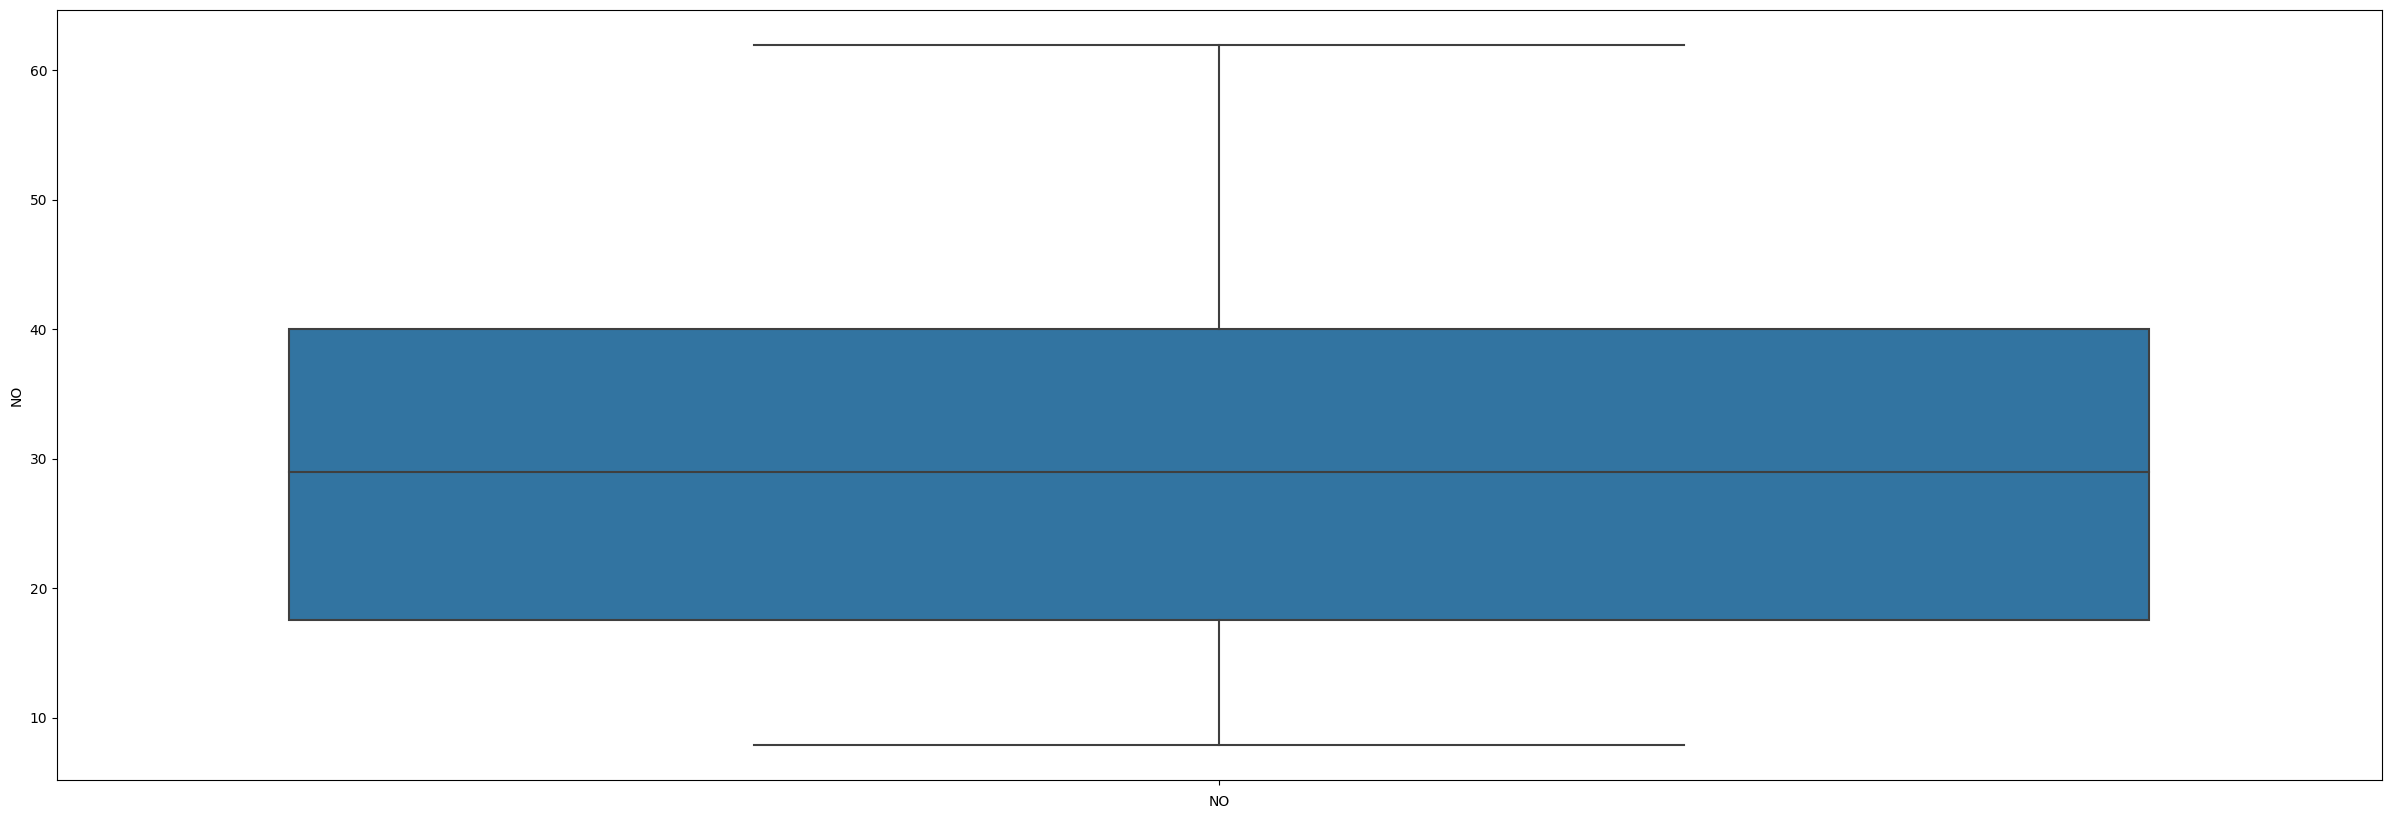

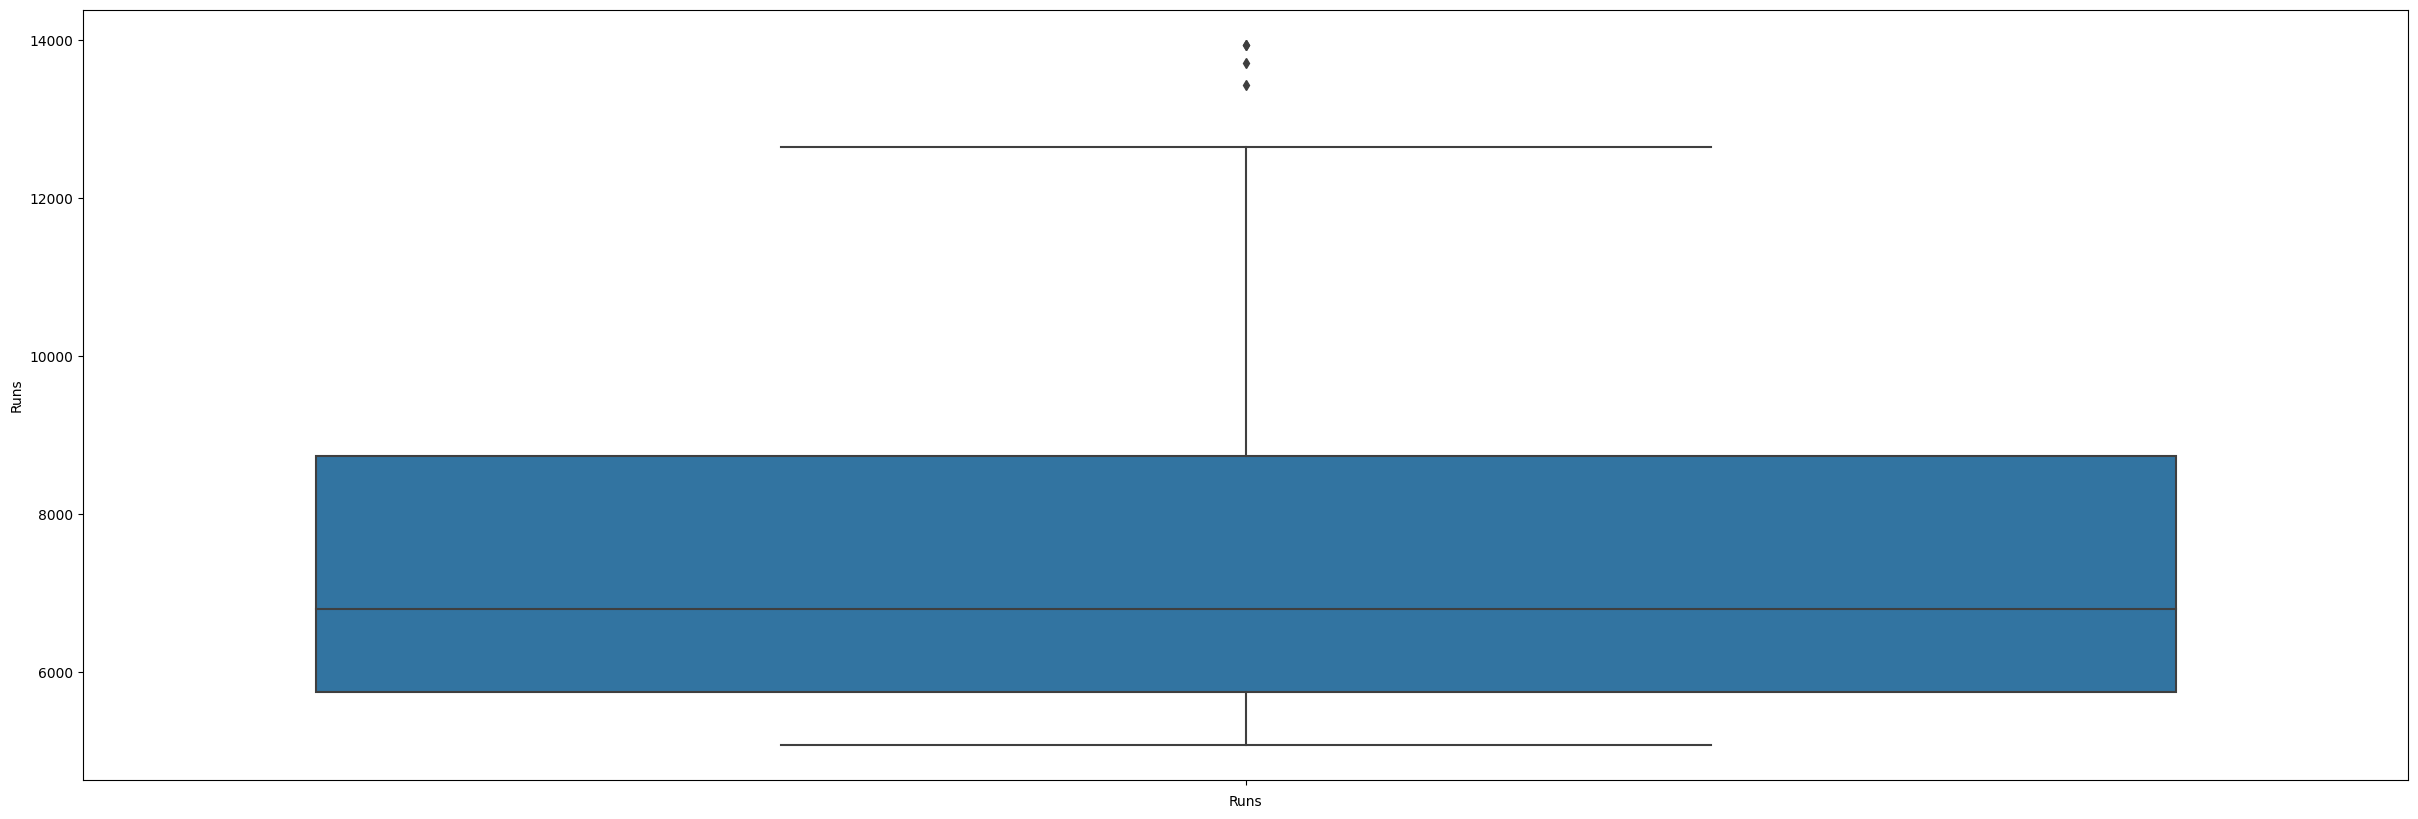

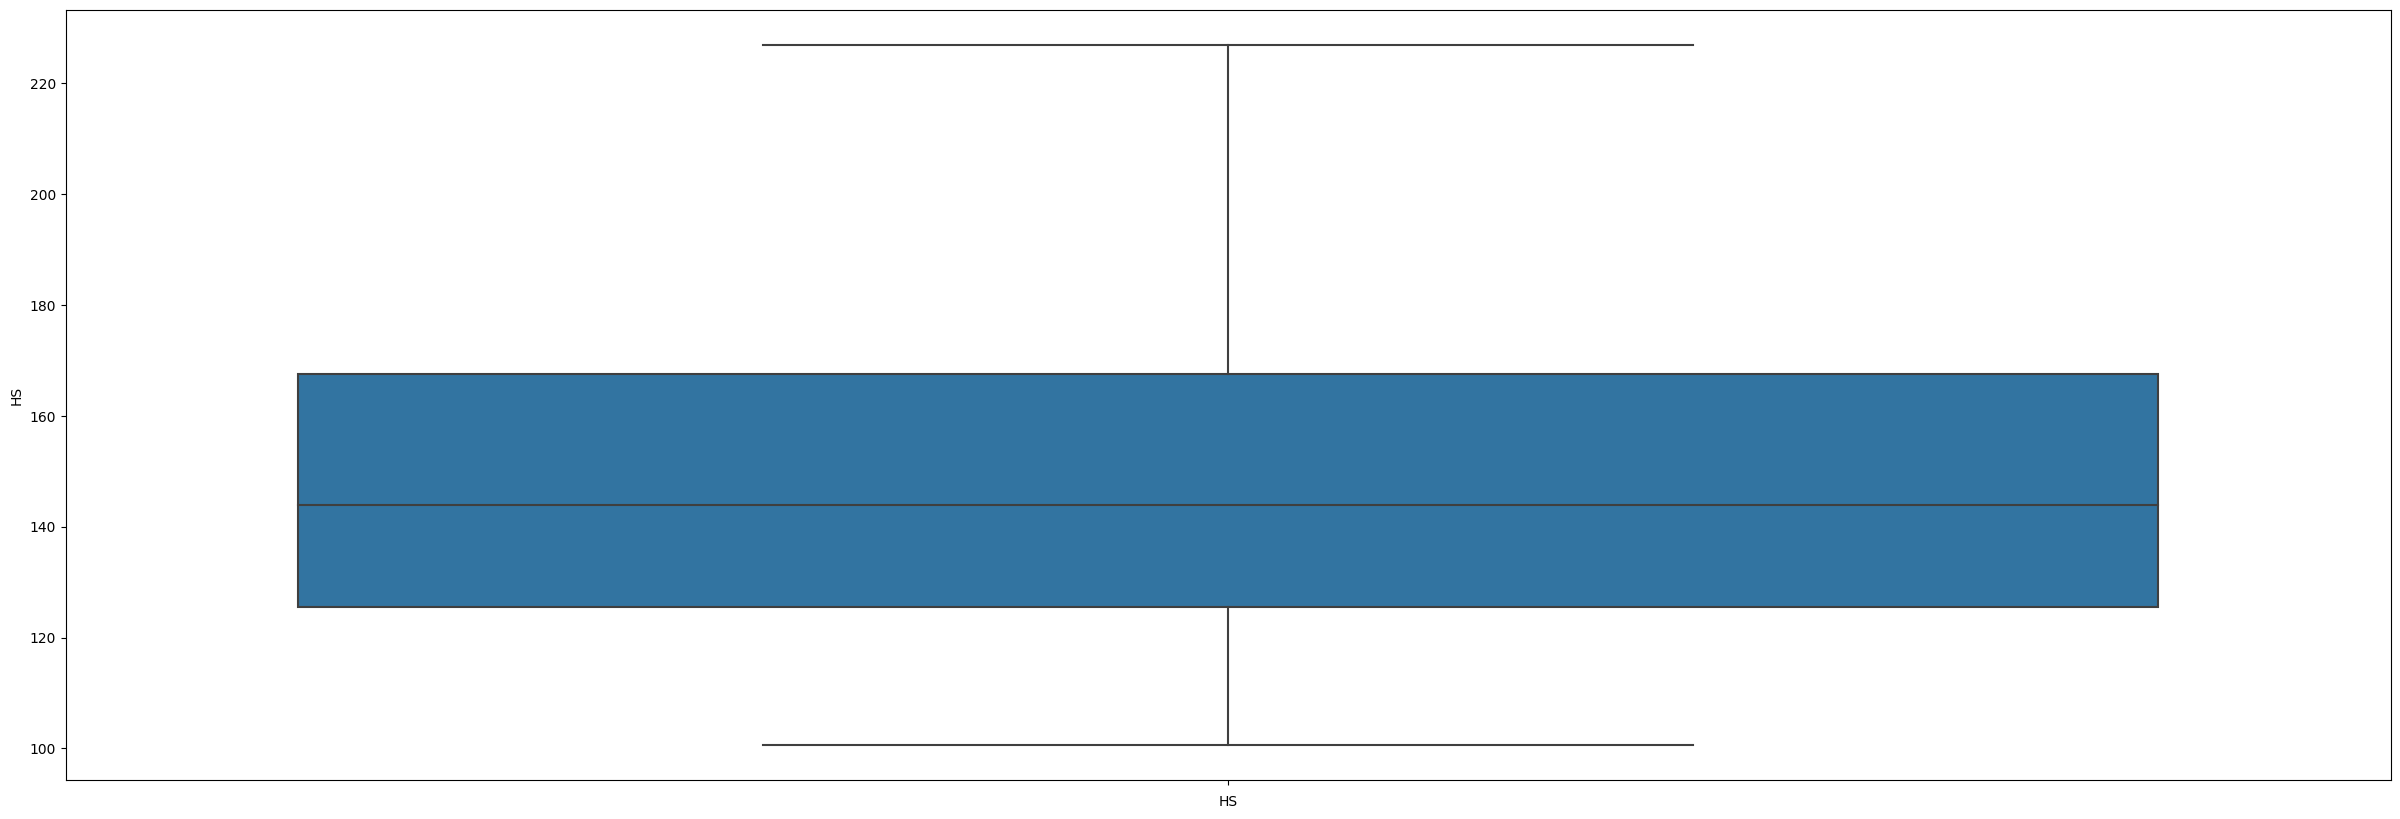

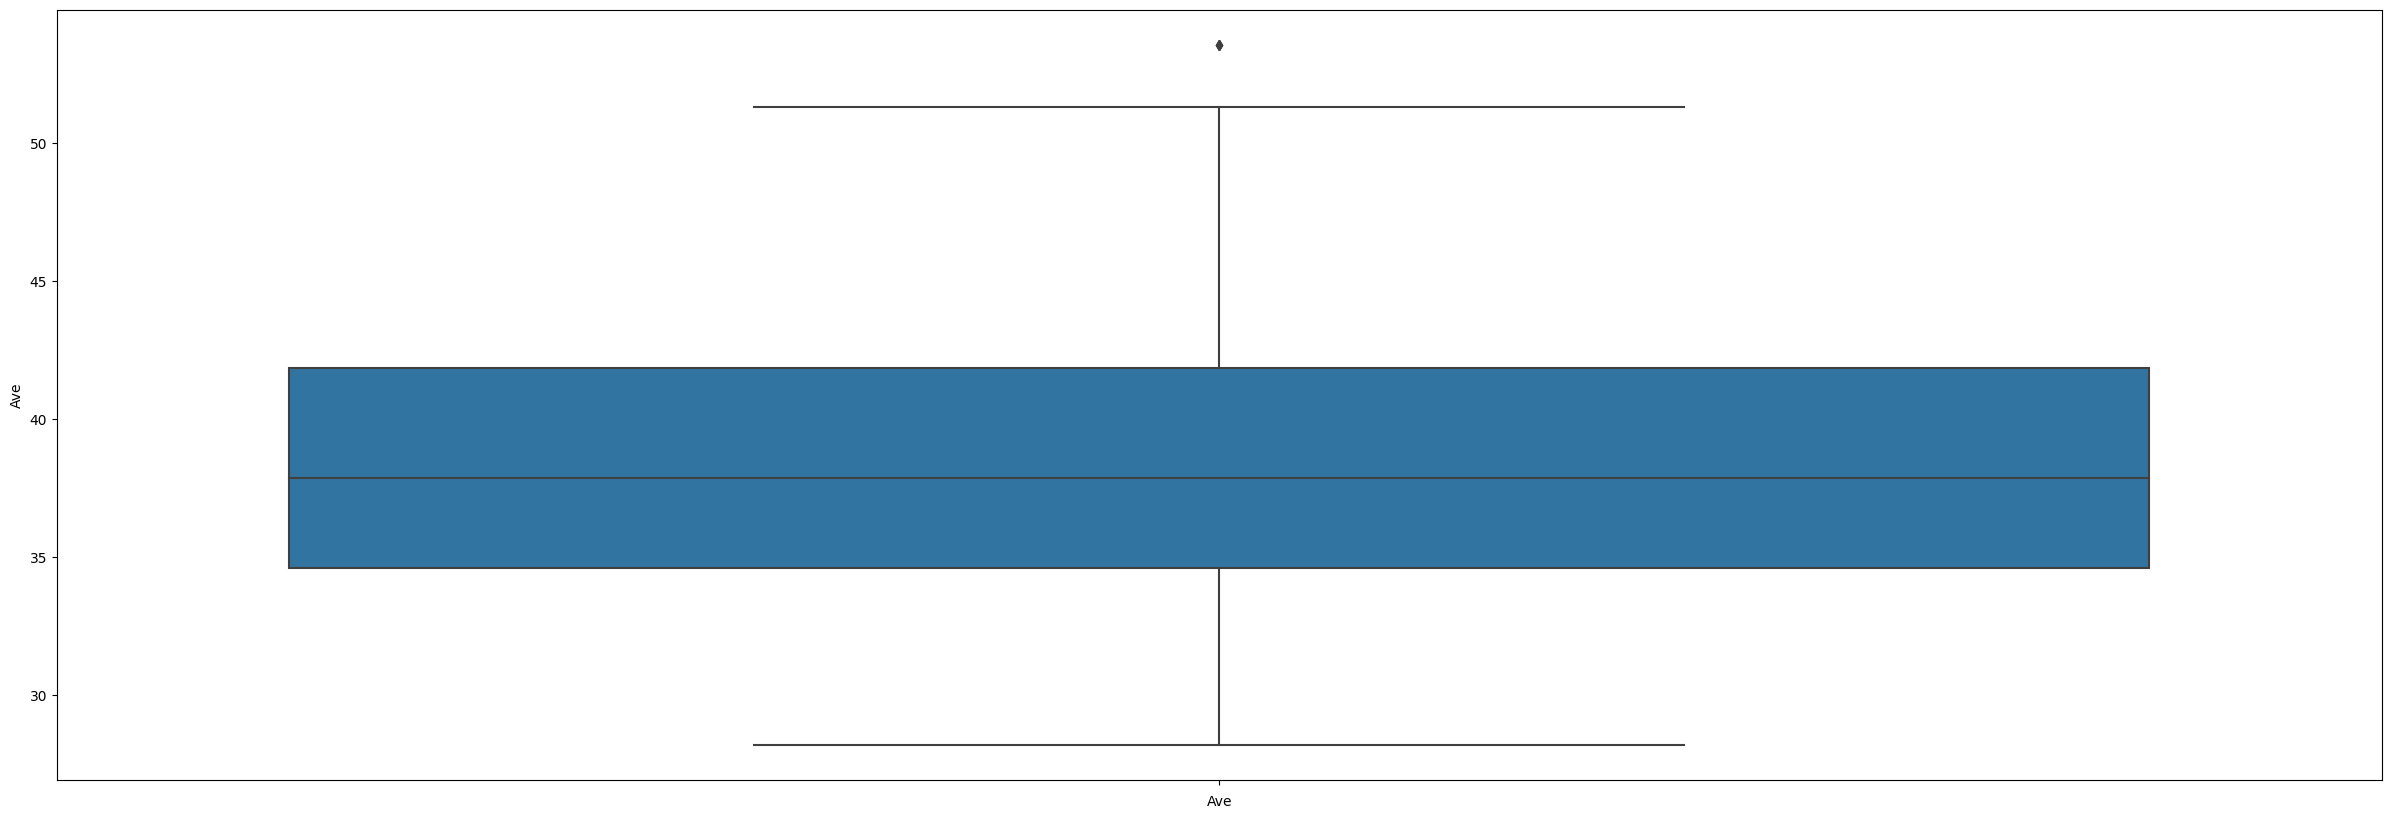

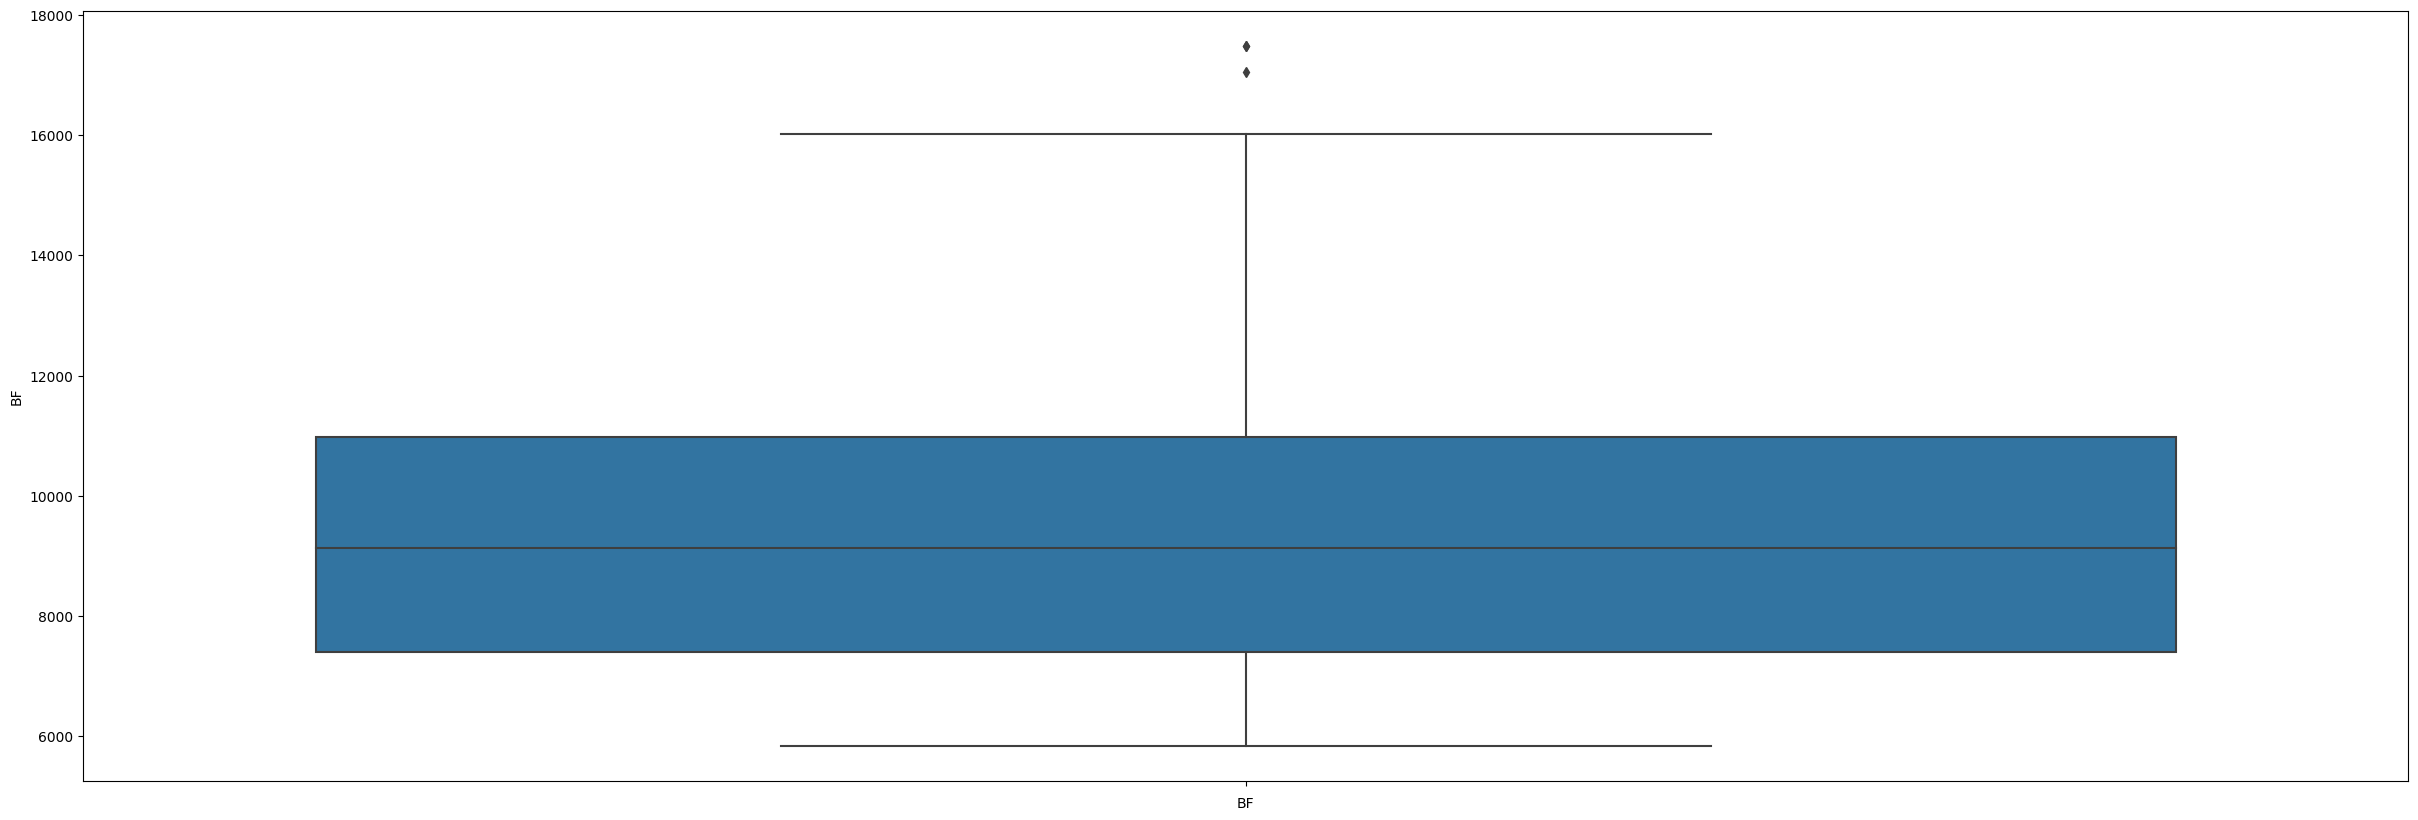

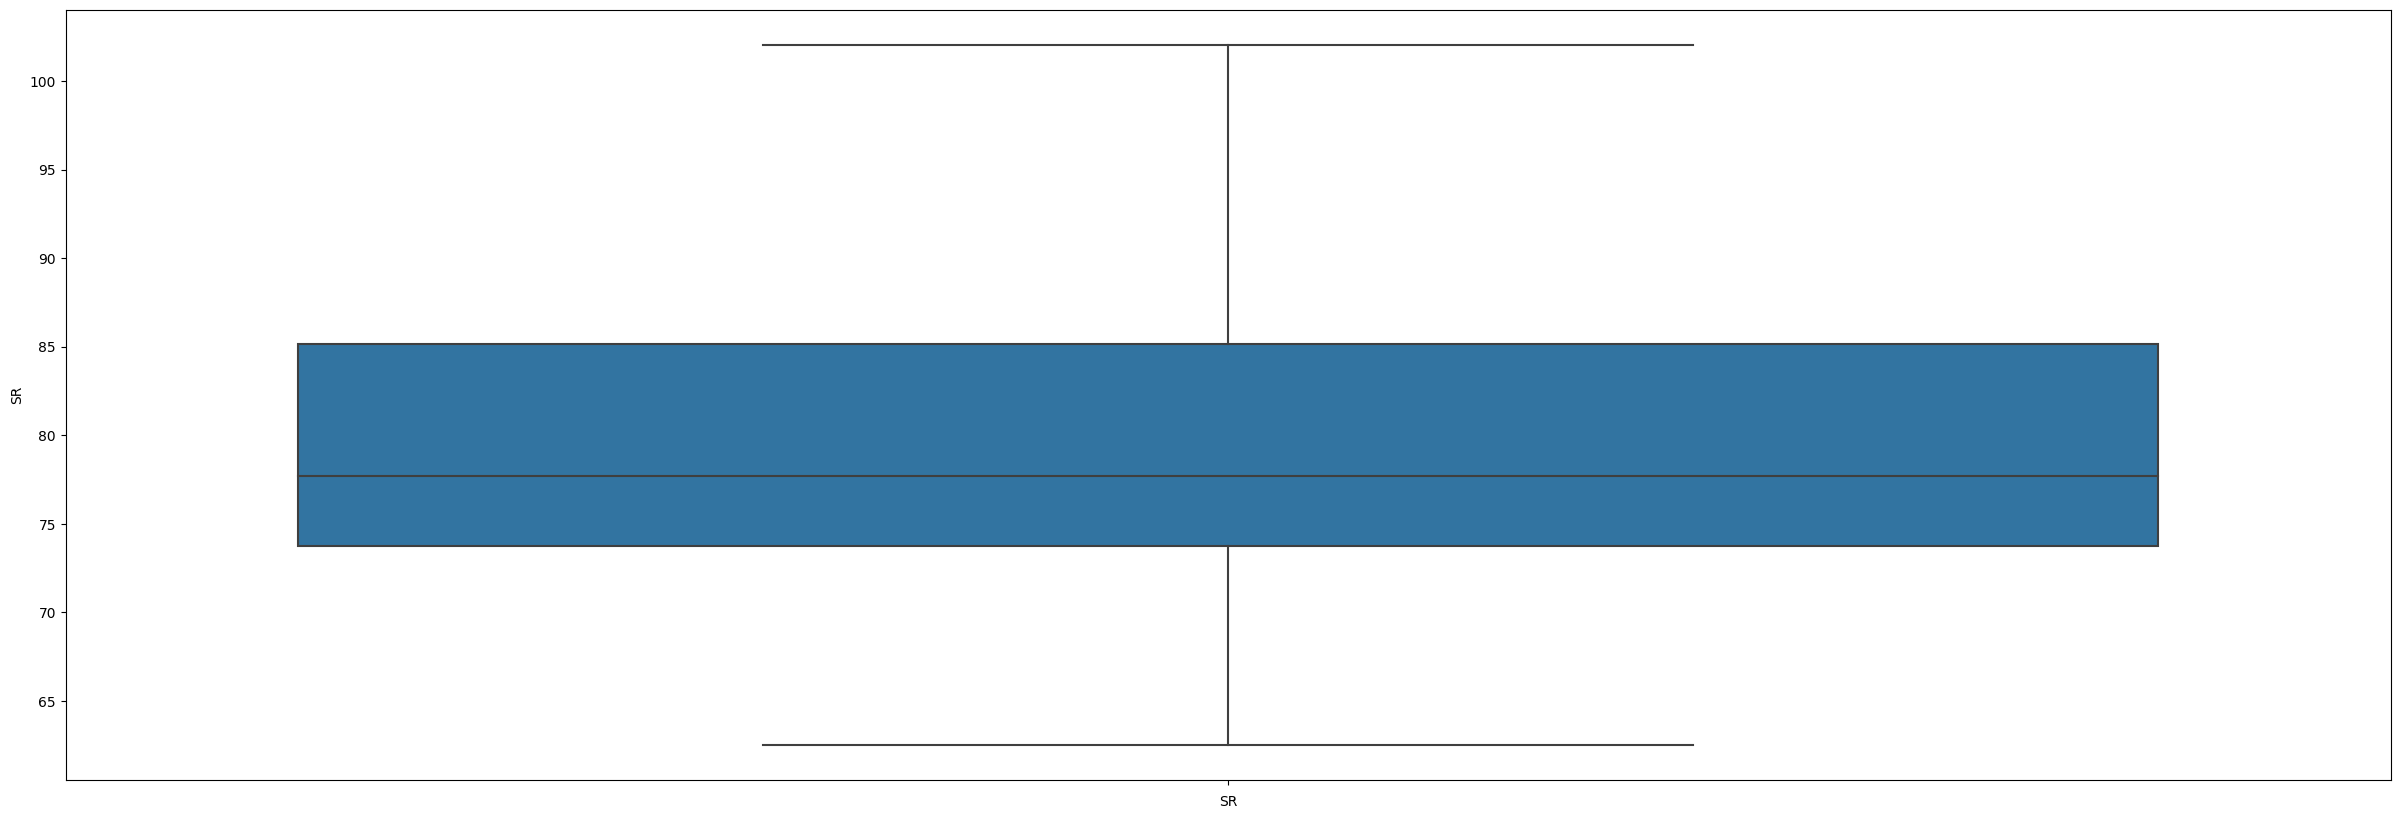

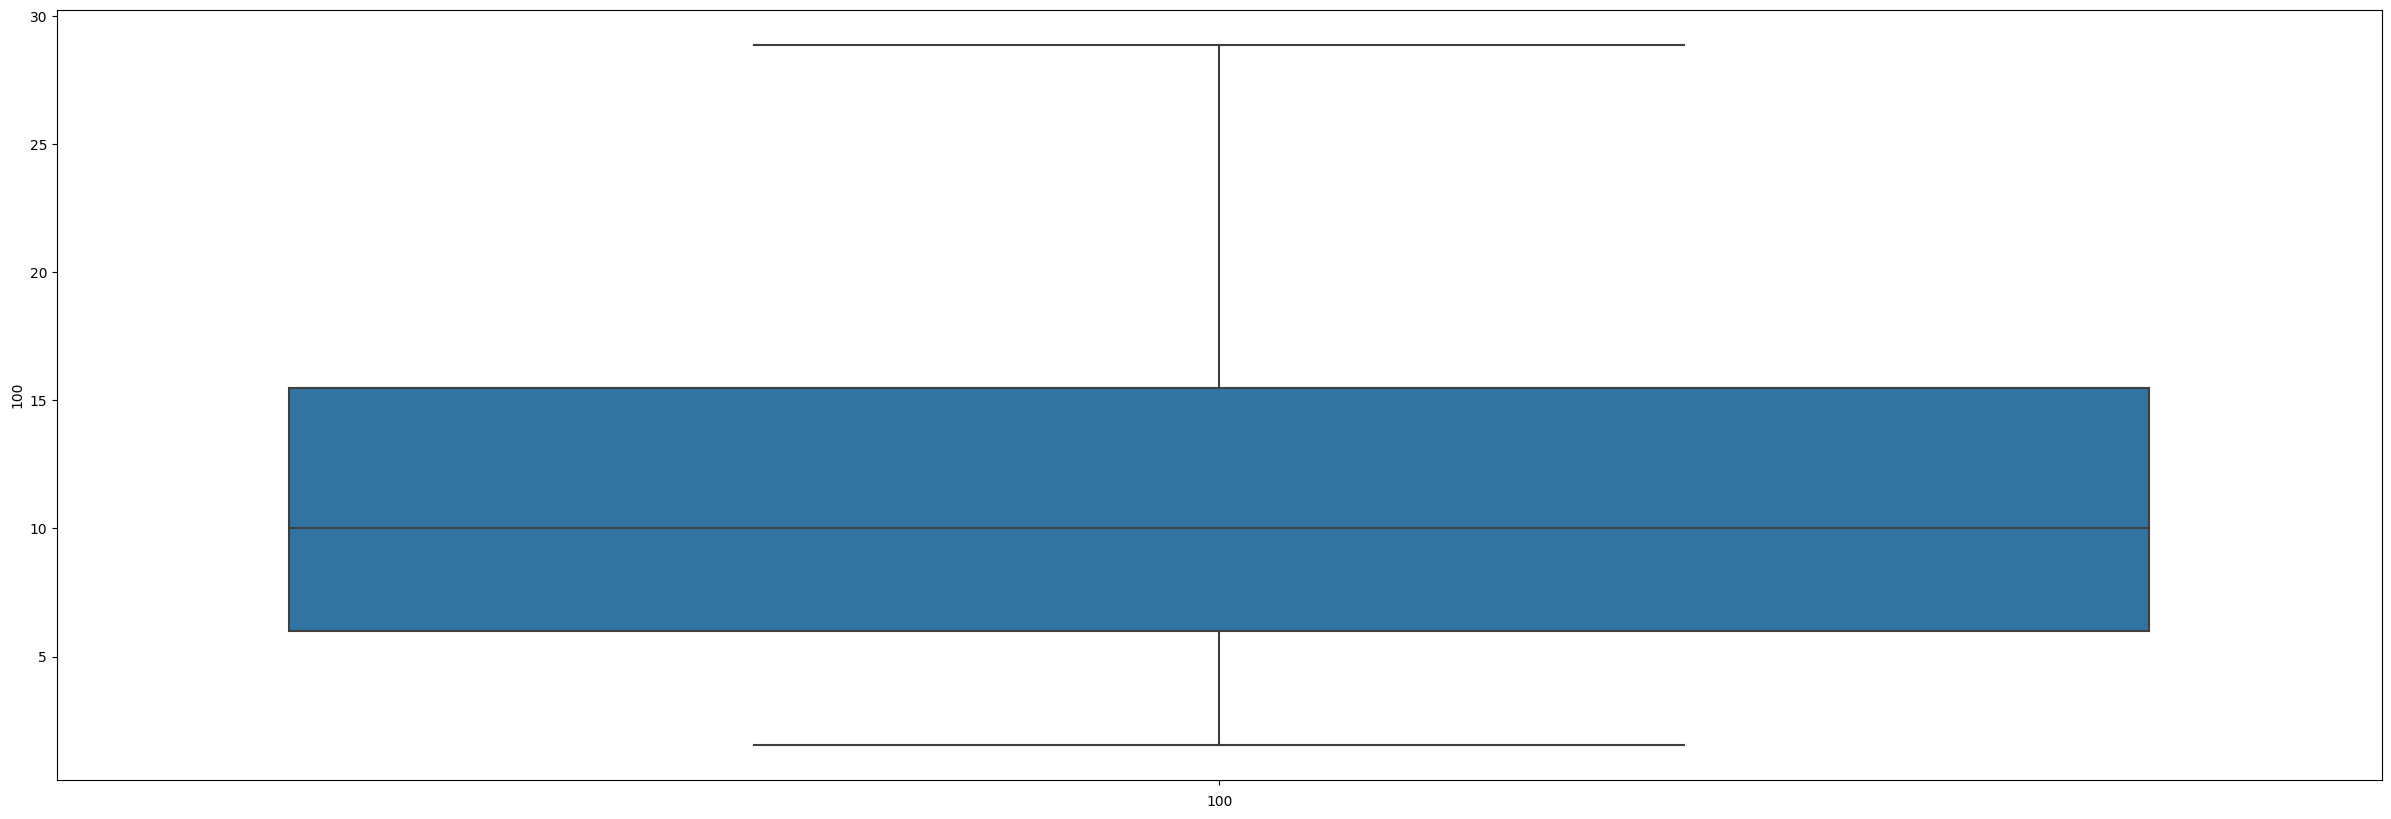

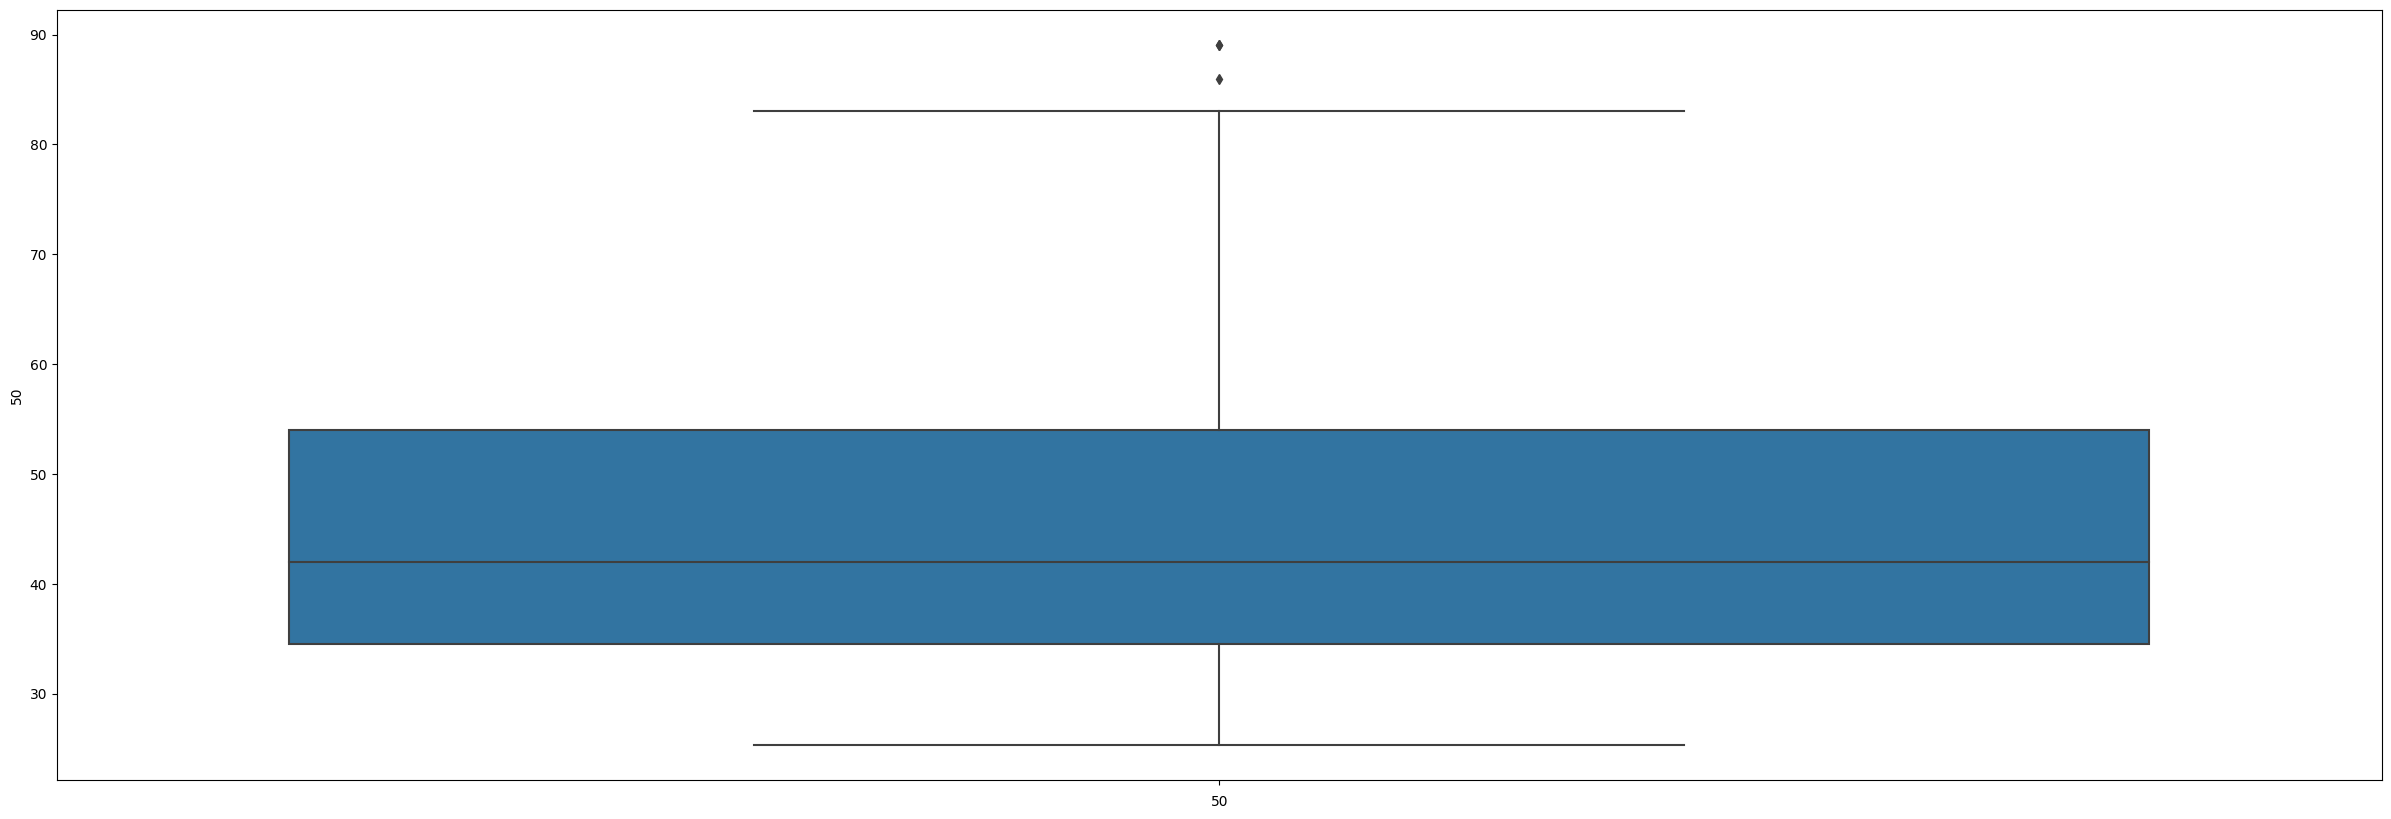

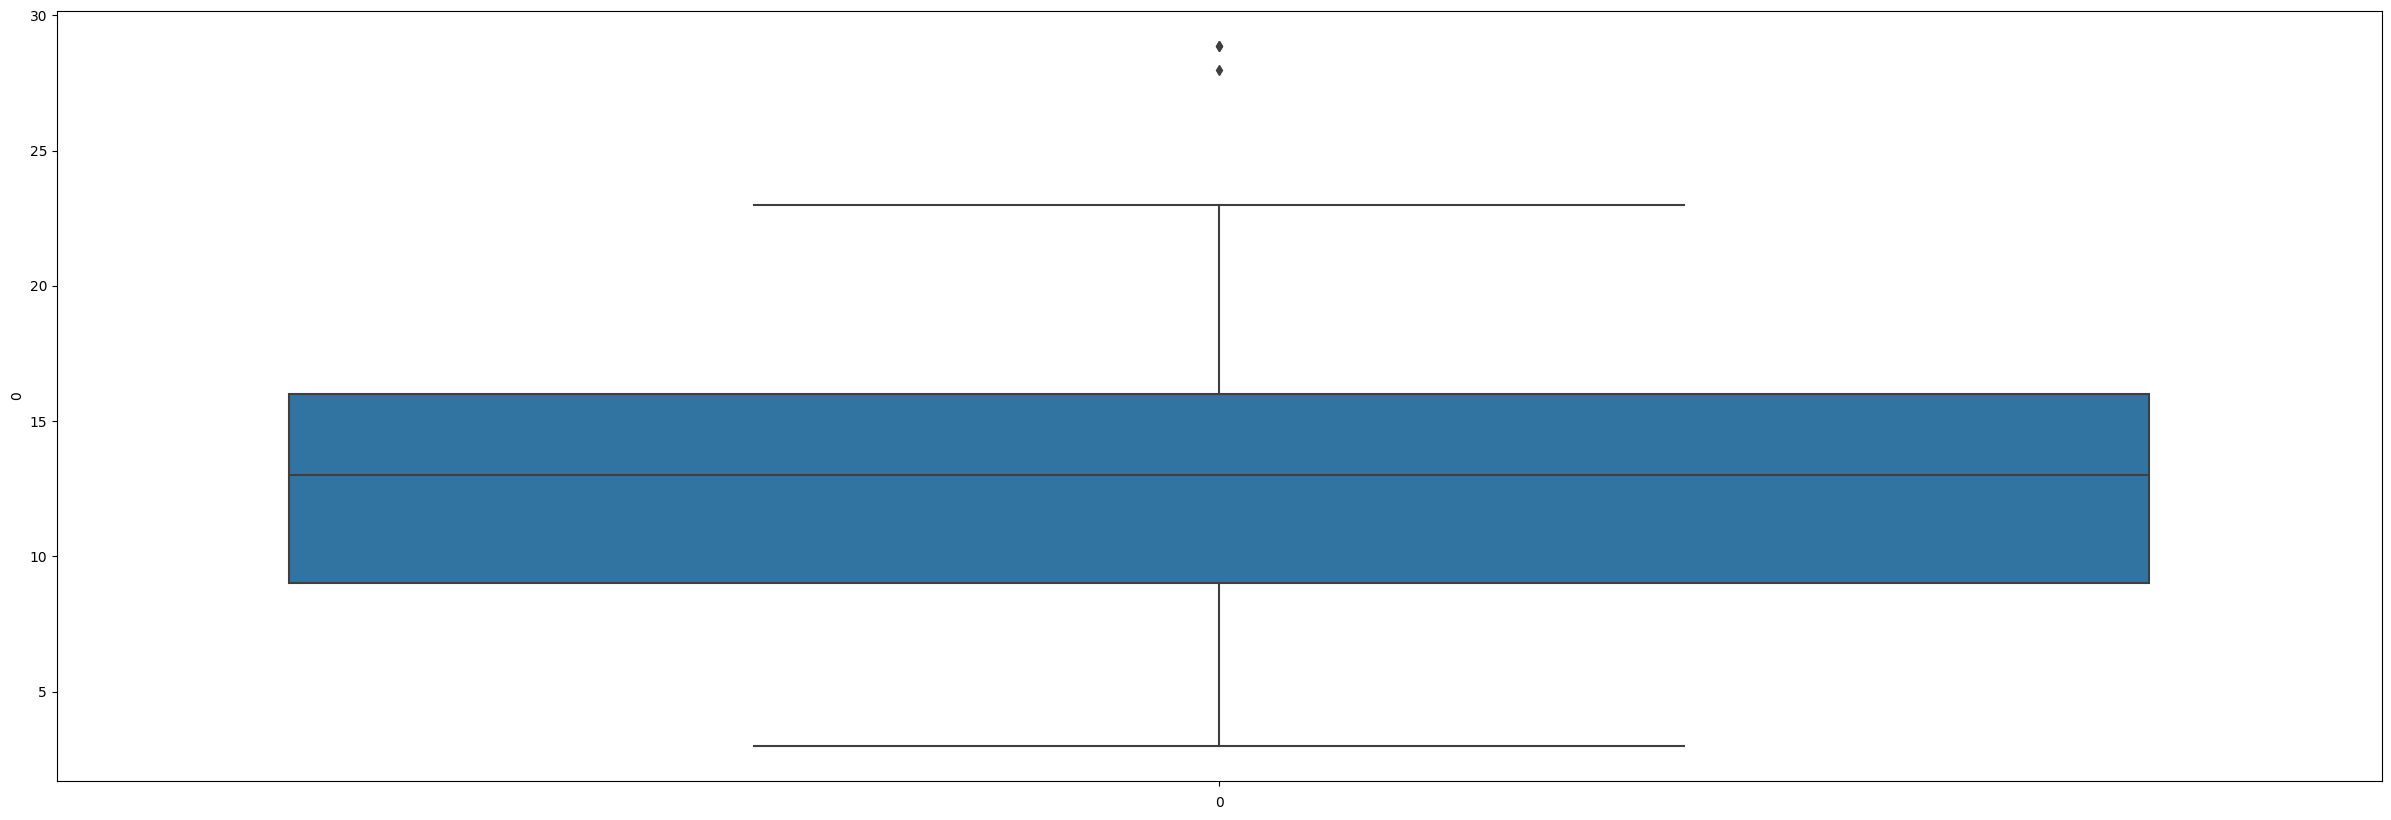

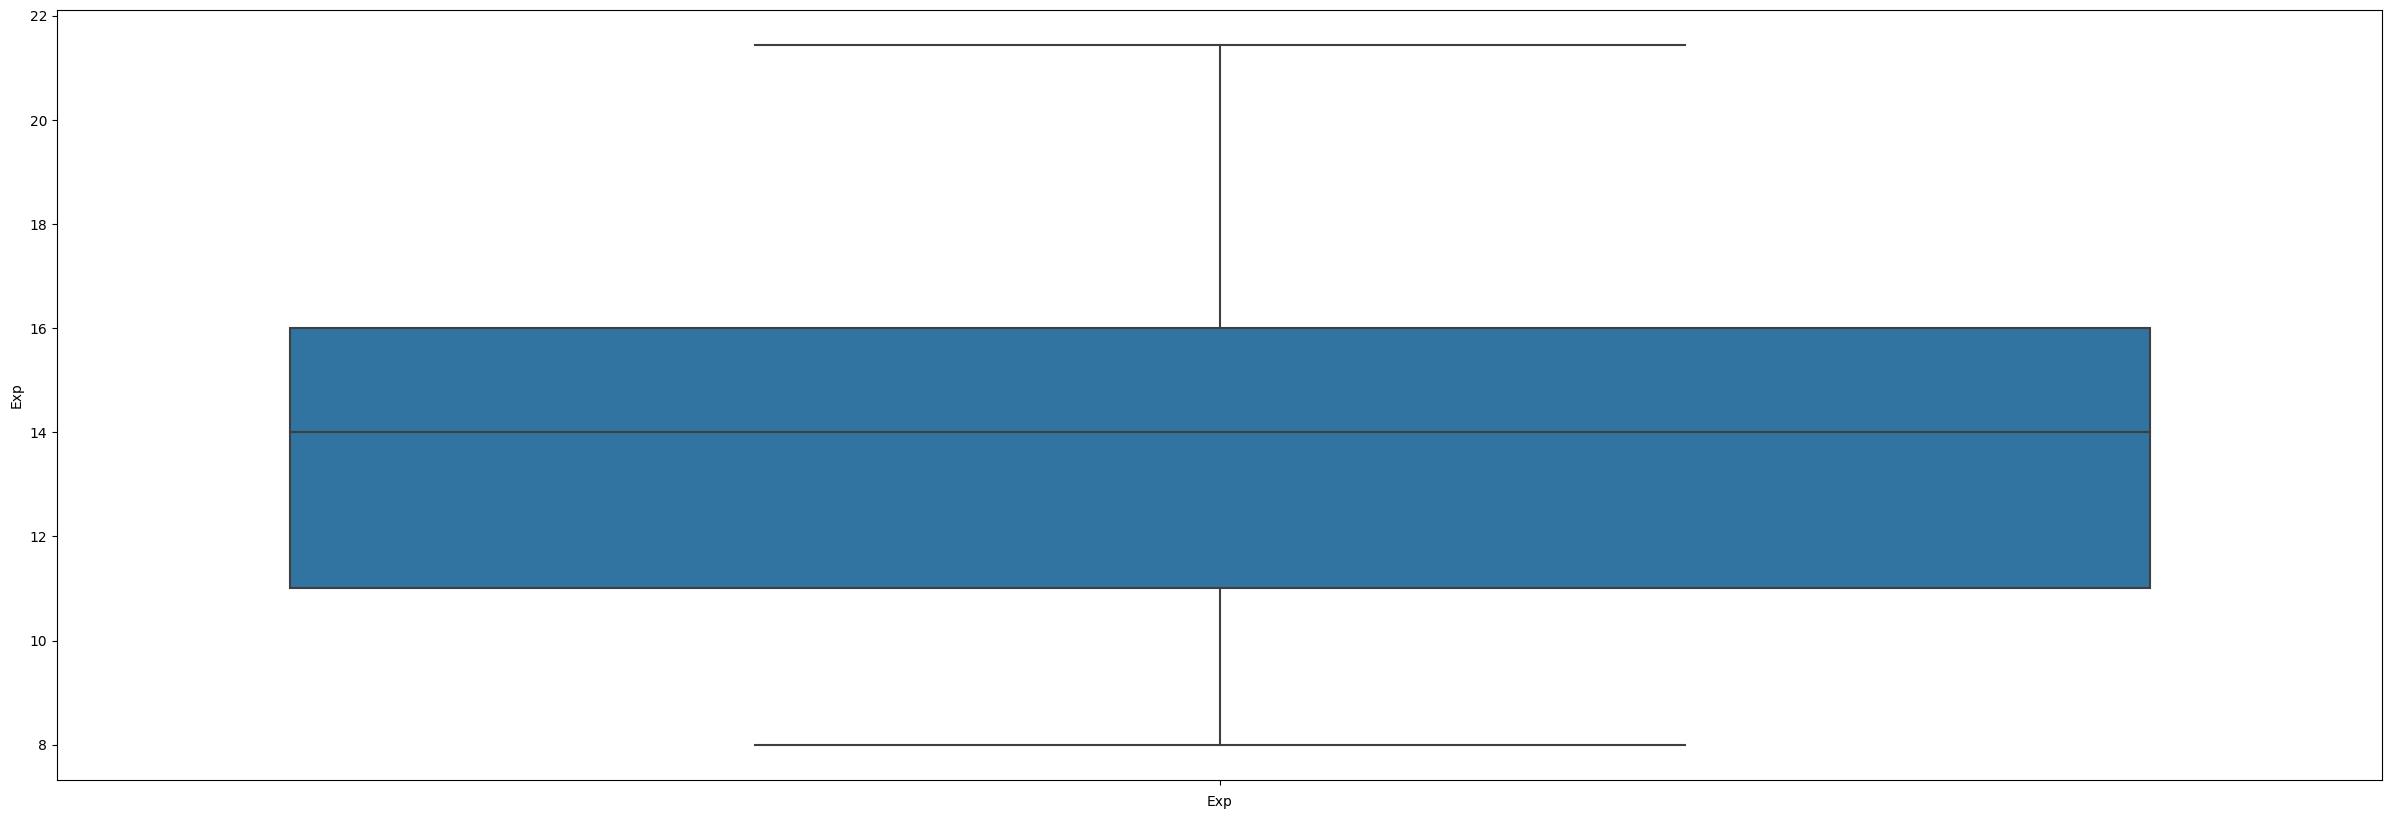

In [20]:
for i in cric_df.columns:
    if i!= "Player":
        plt.figure(figsize=(30,10))
        sns.boxplot(y=i,data=cric_df)
        plt.xlabel(i)
        plt.xticks(rotation=90)
        plt.show()

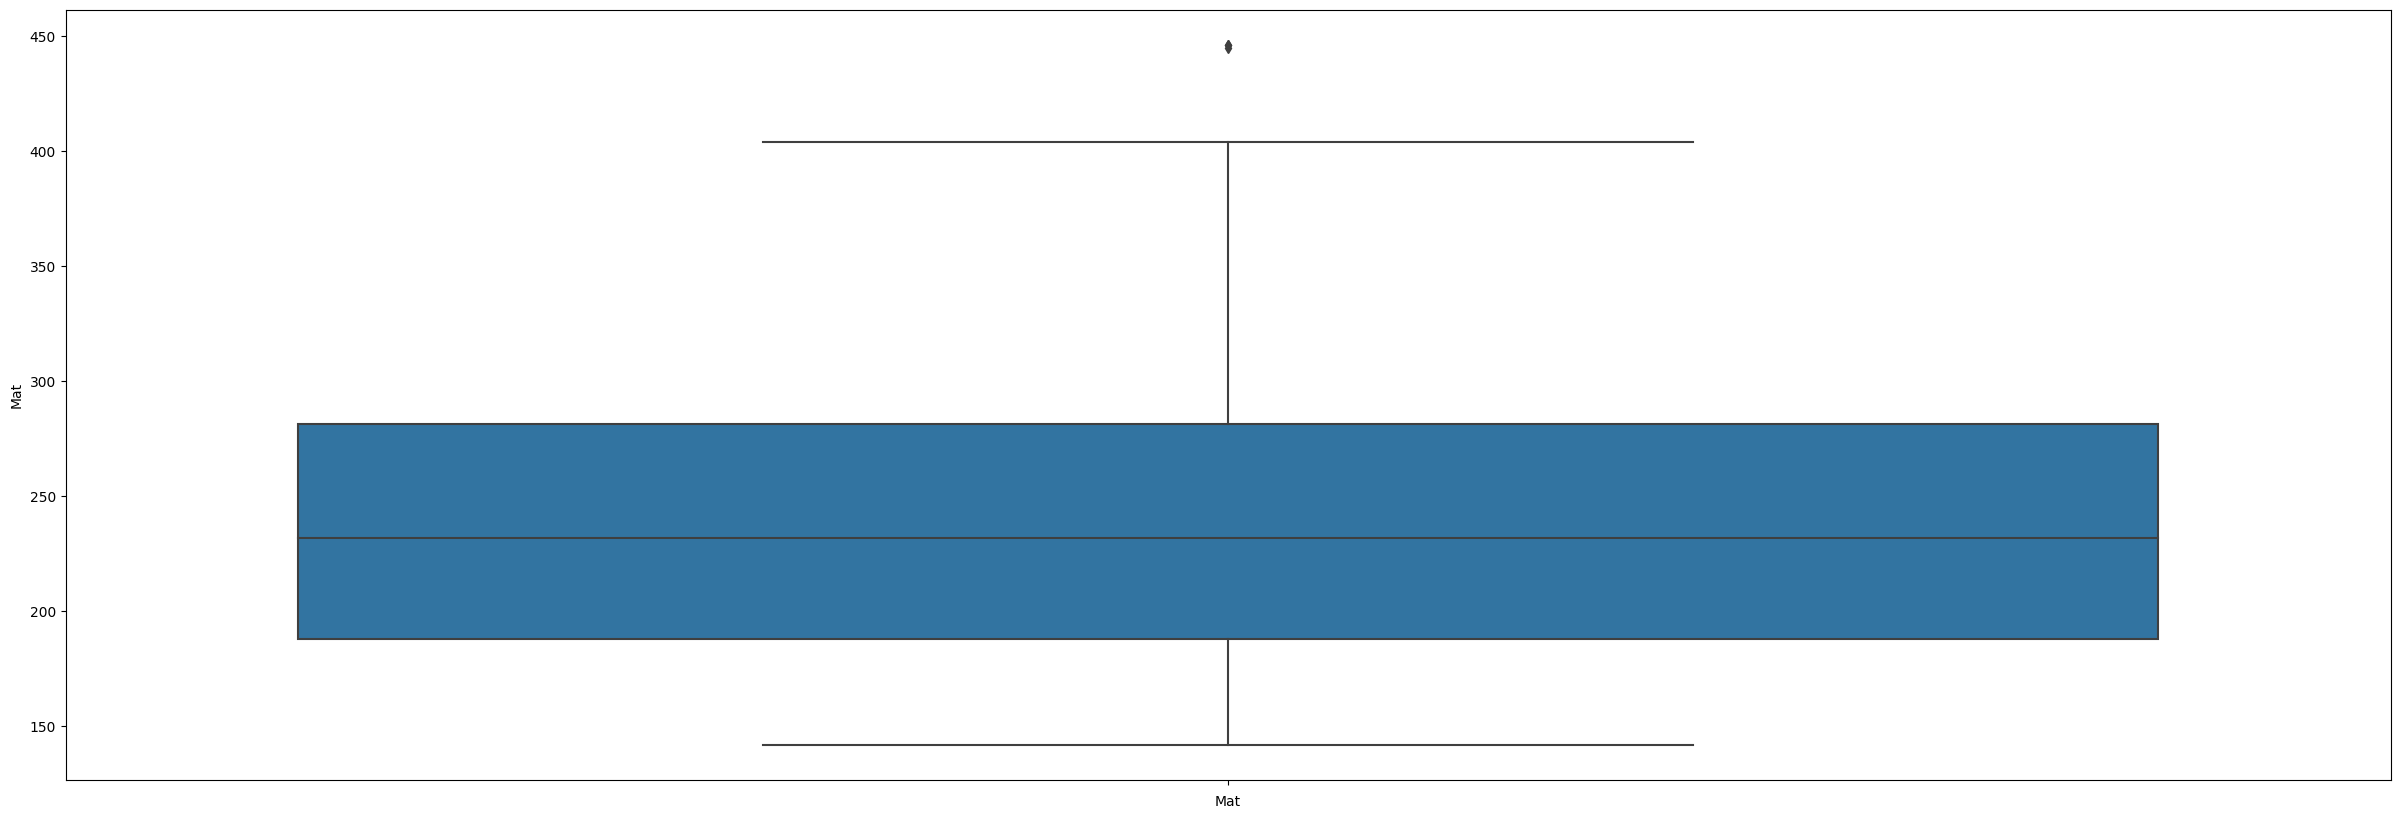

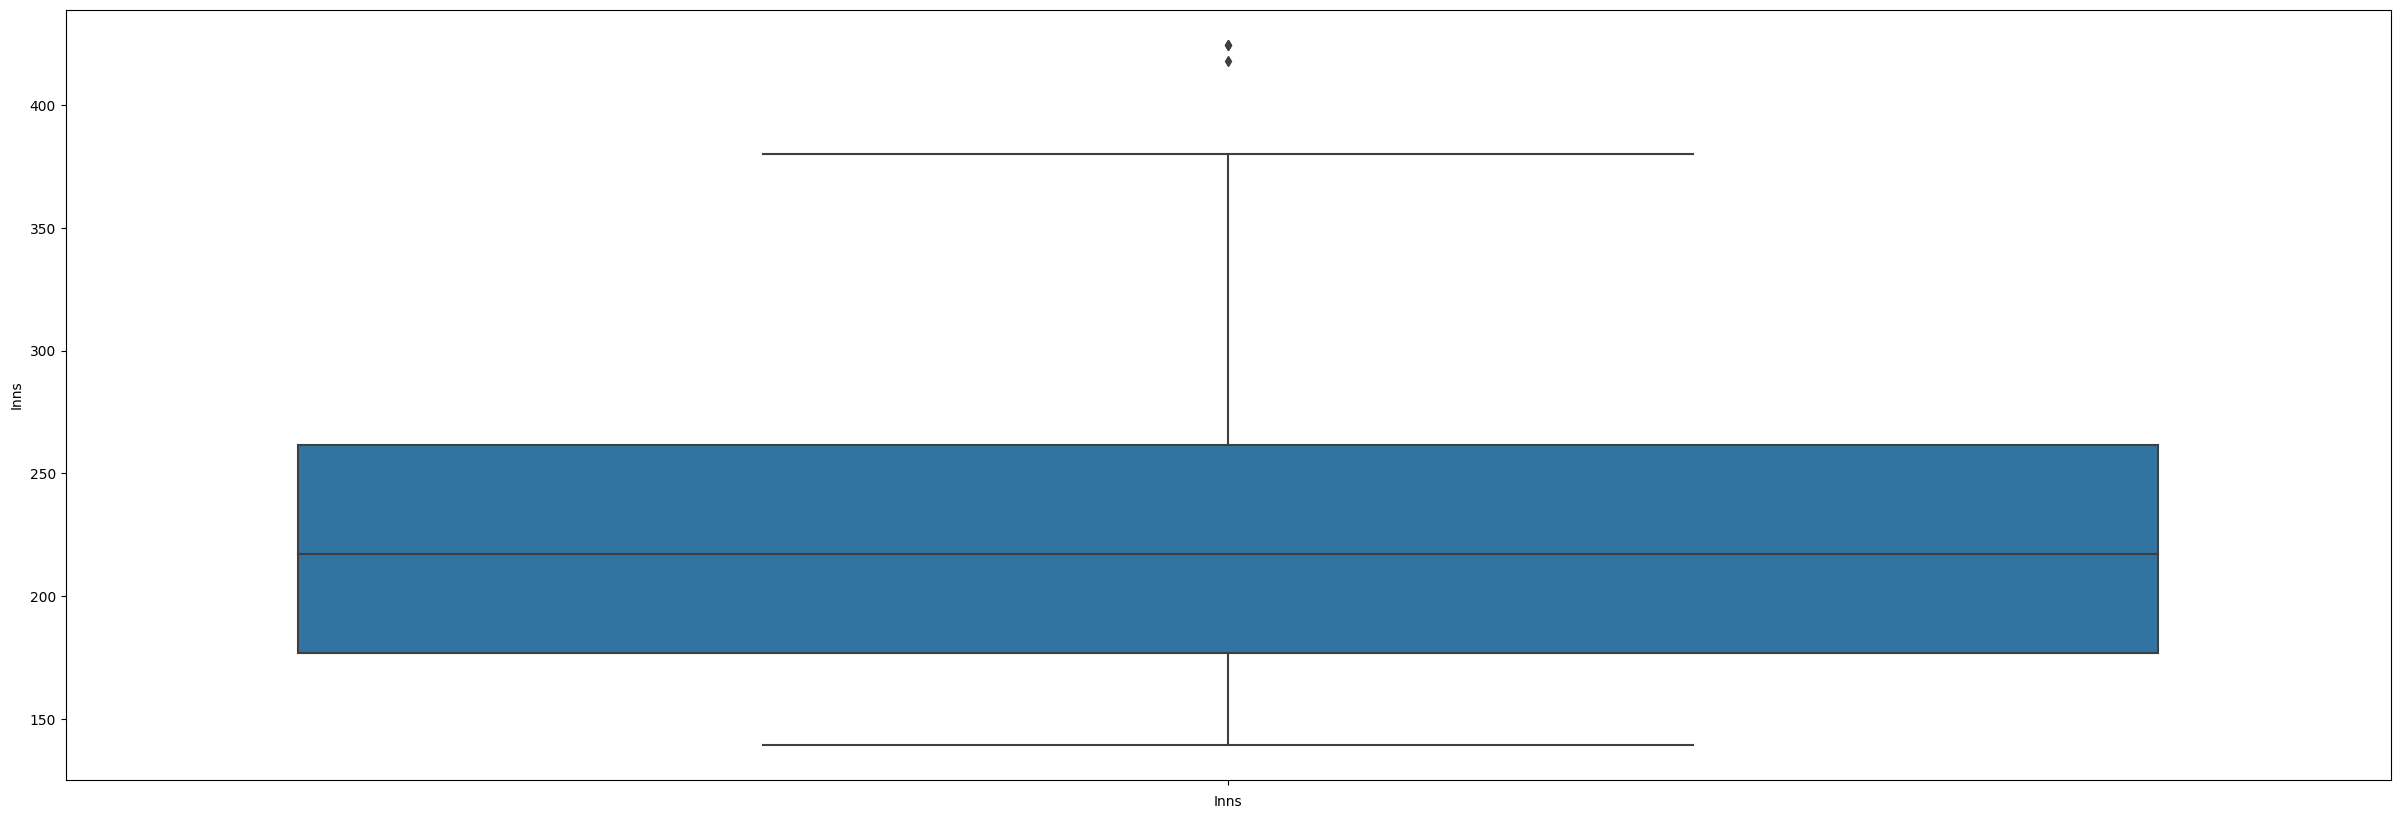

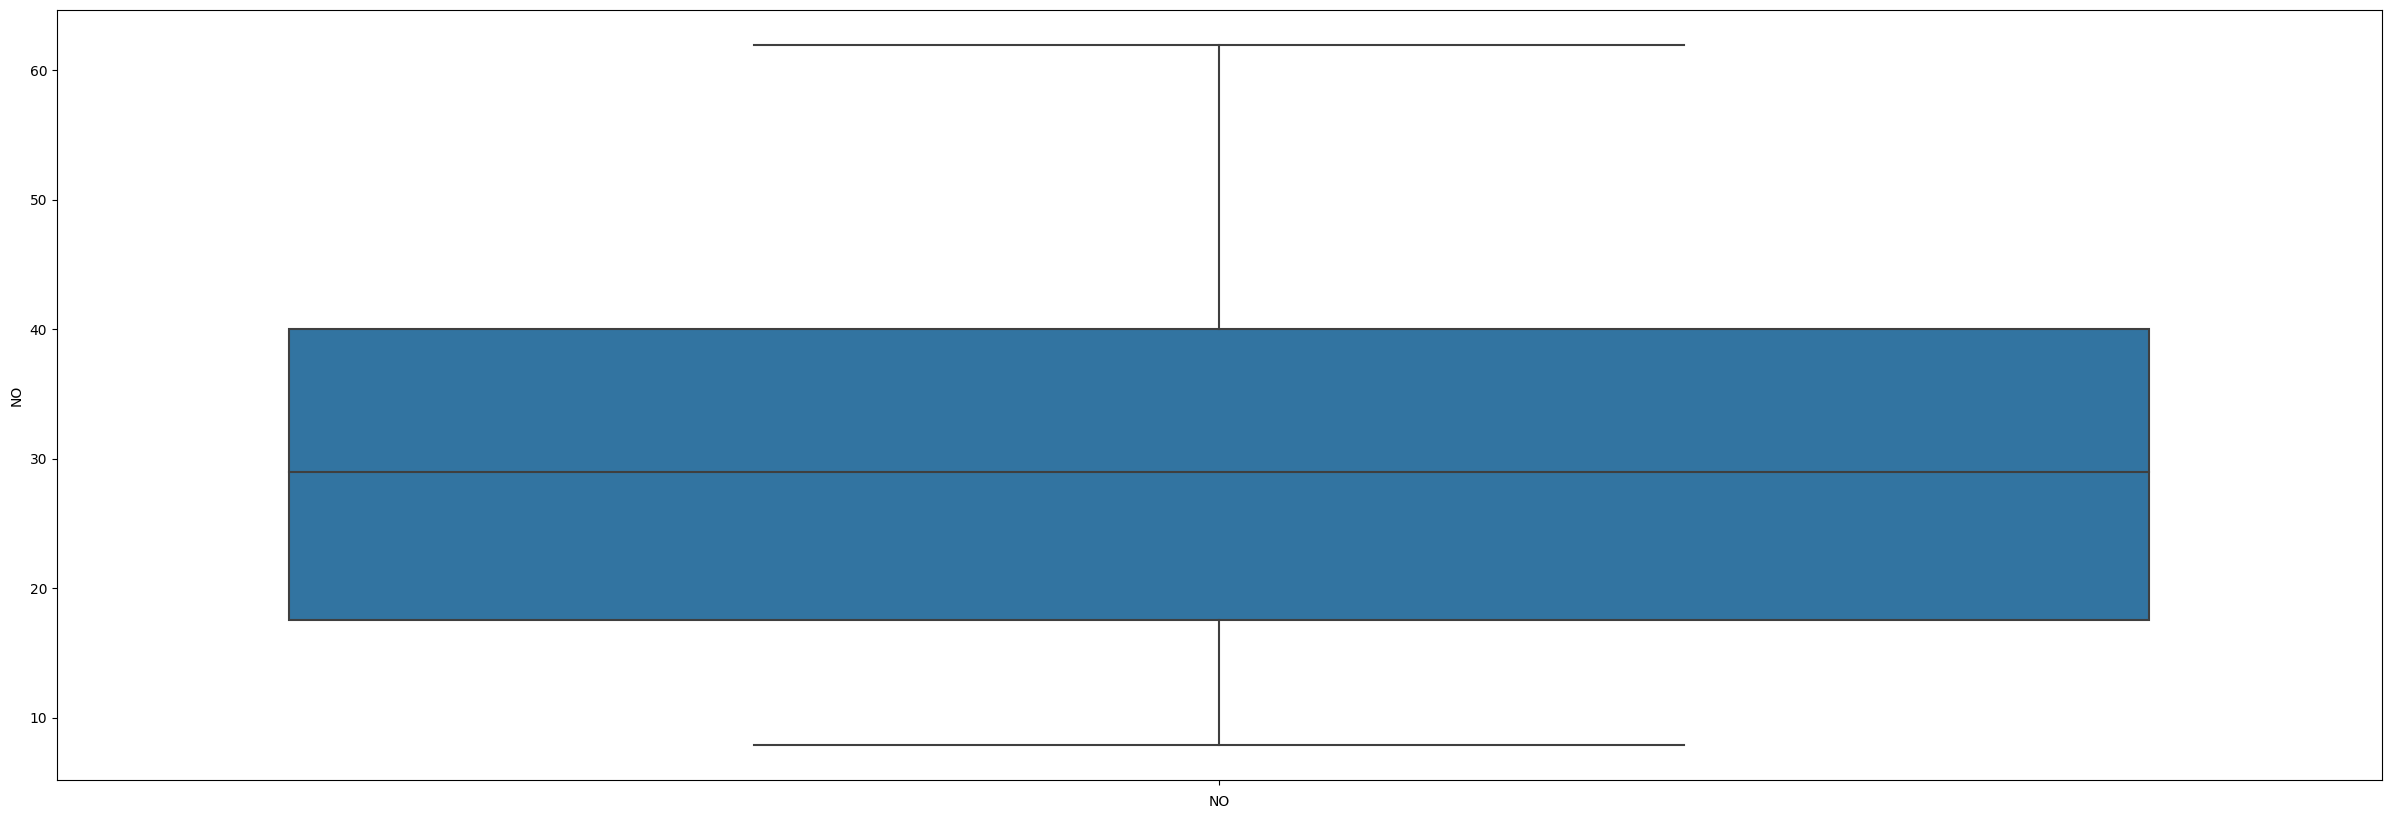

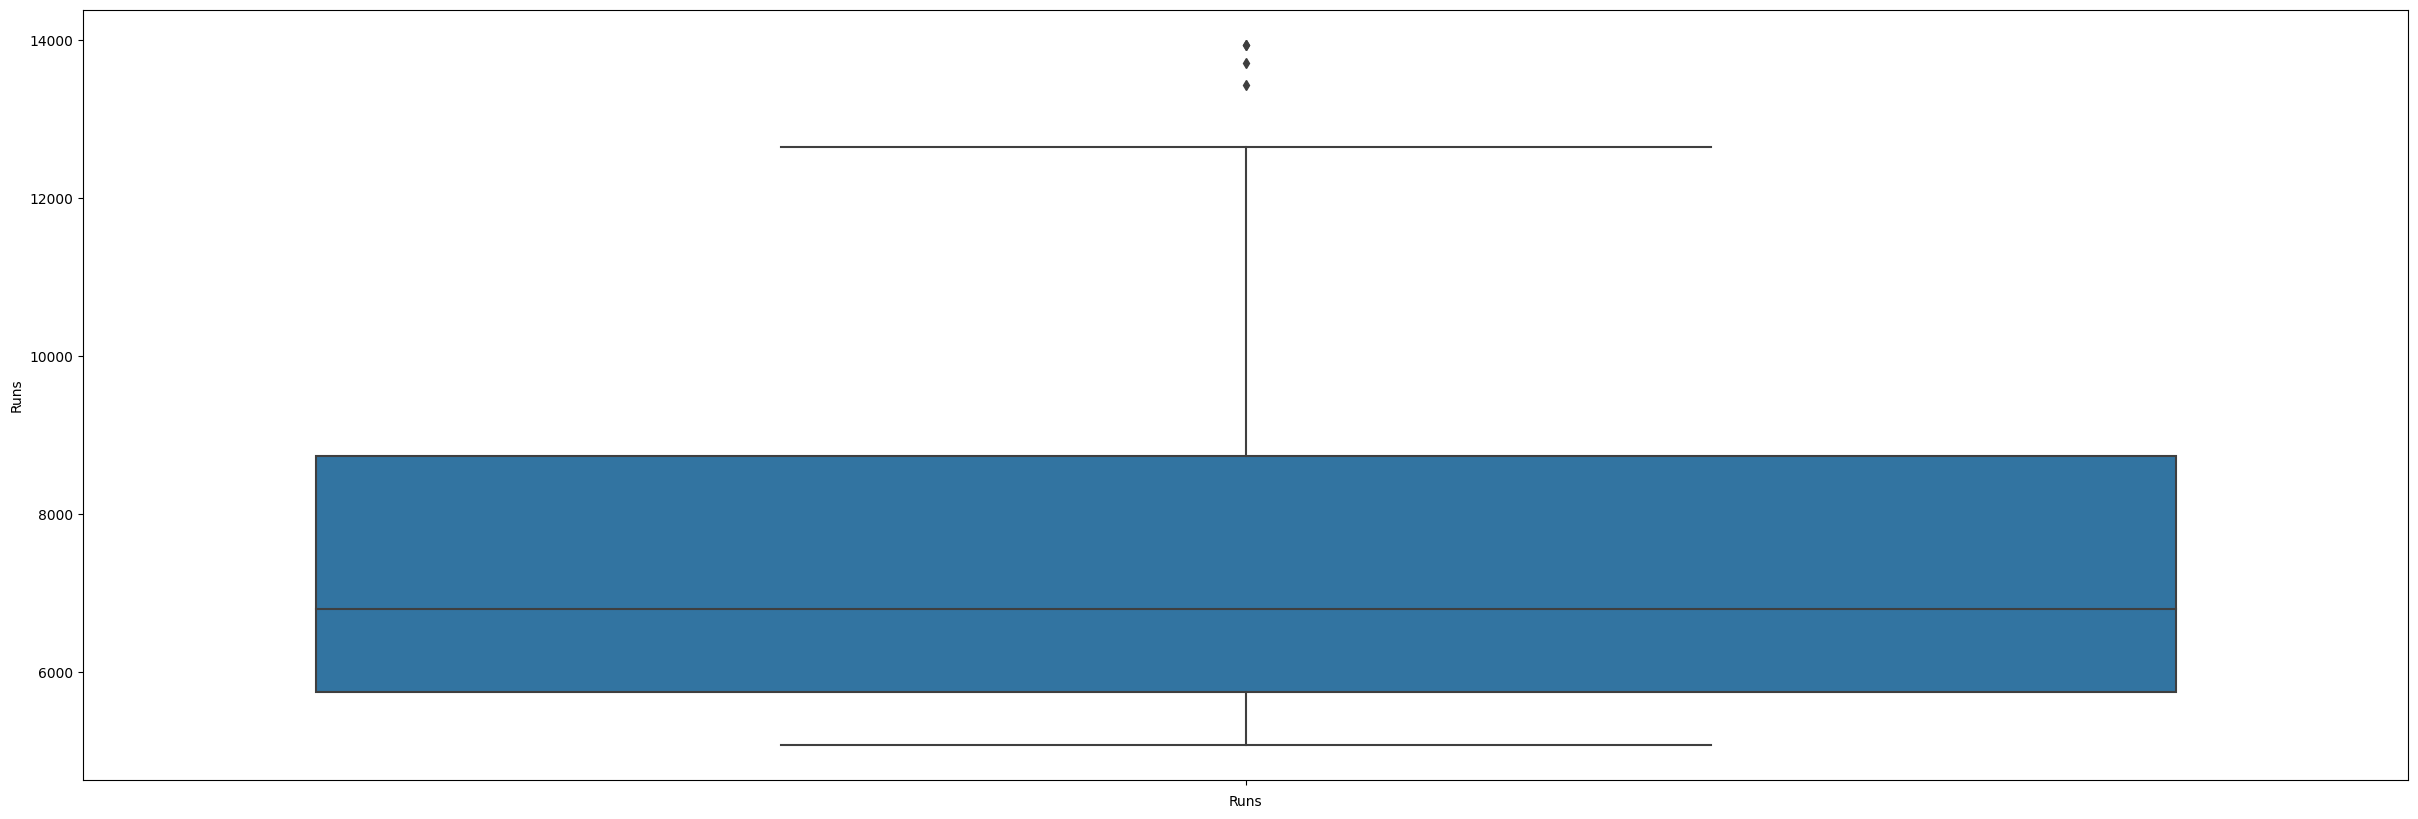

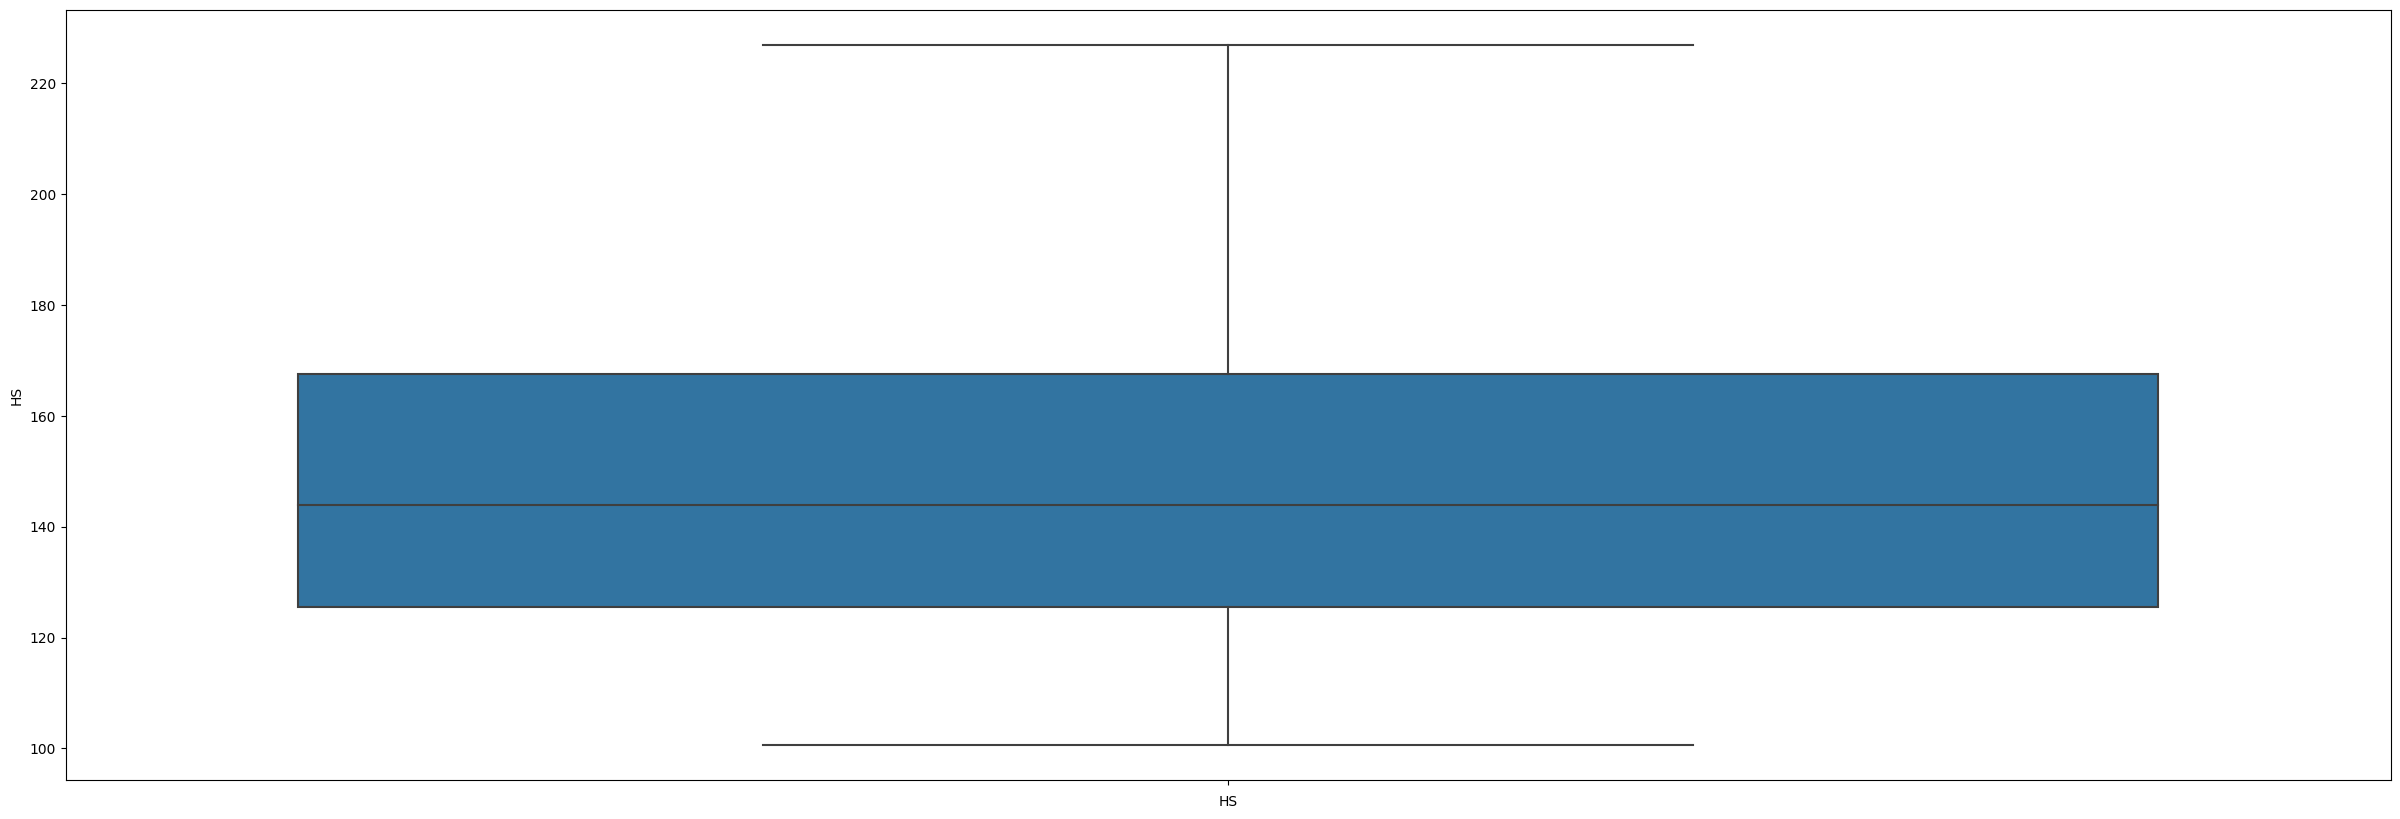

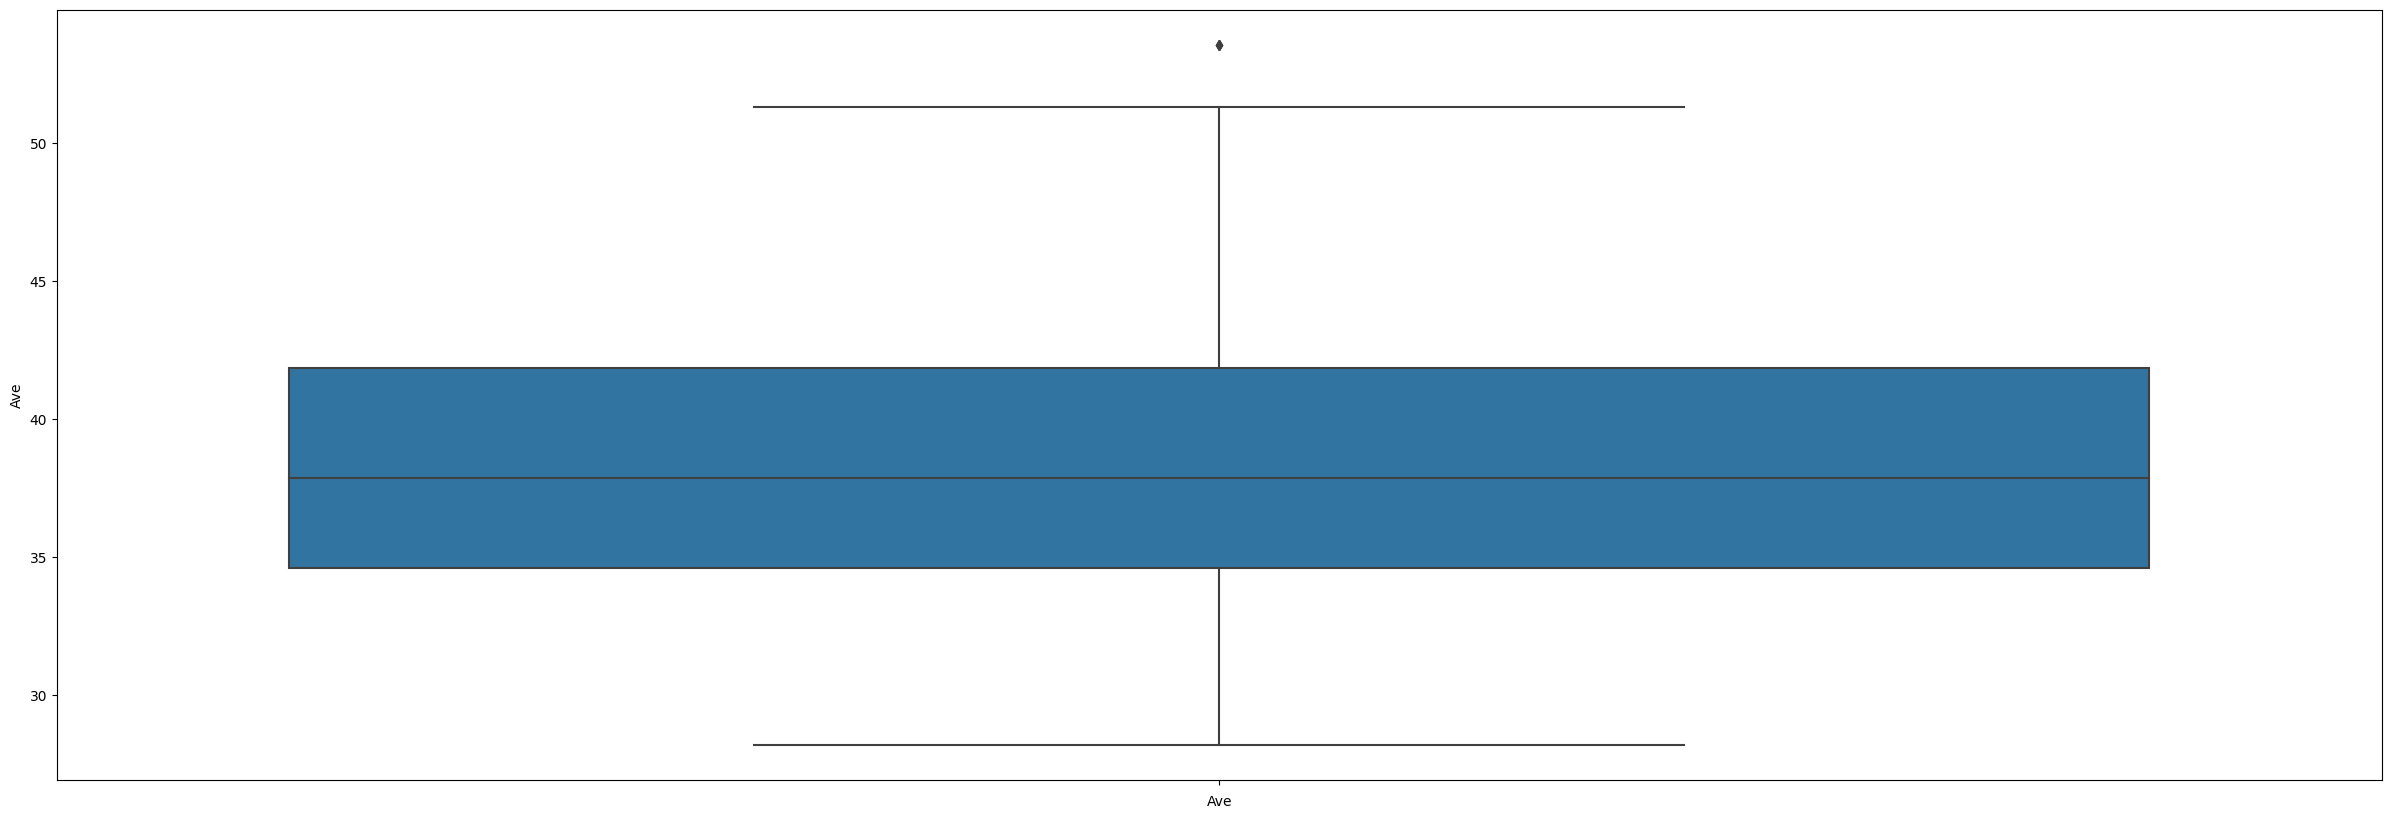

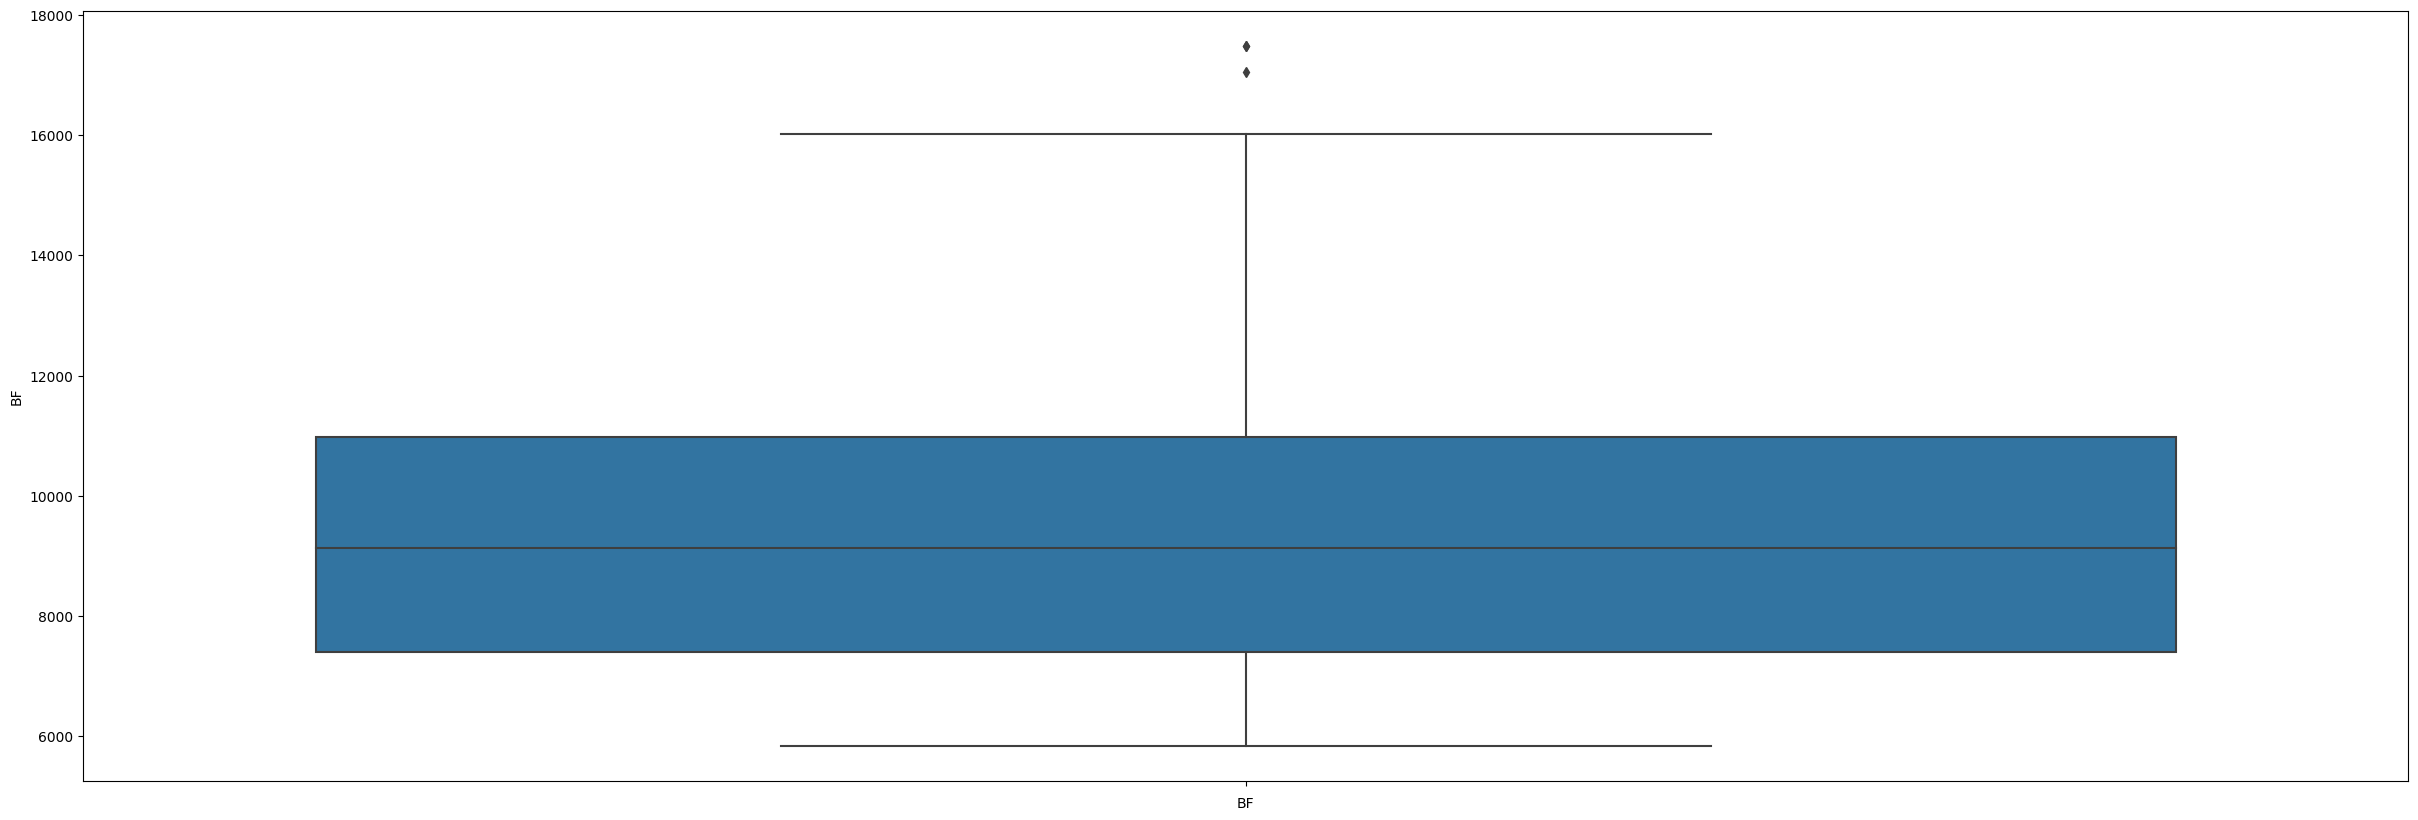

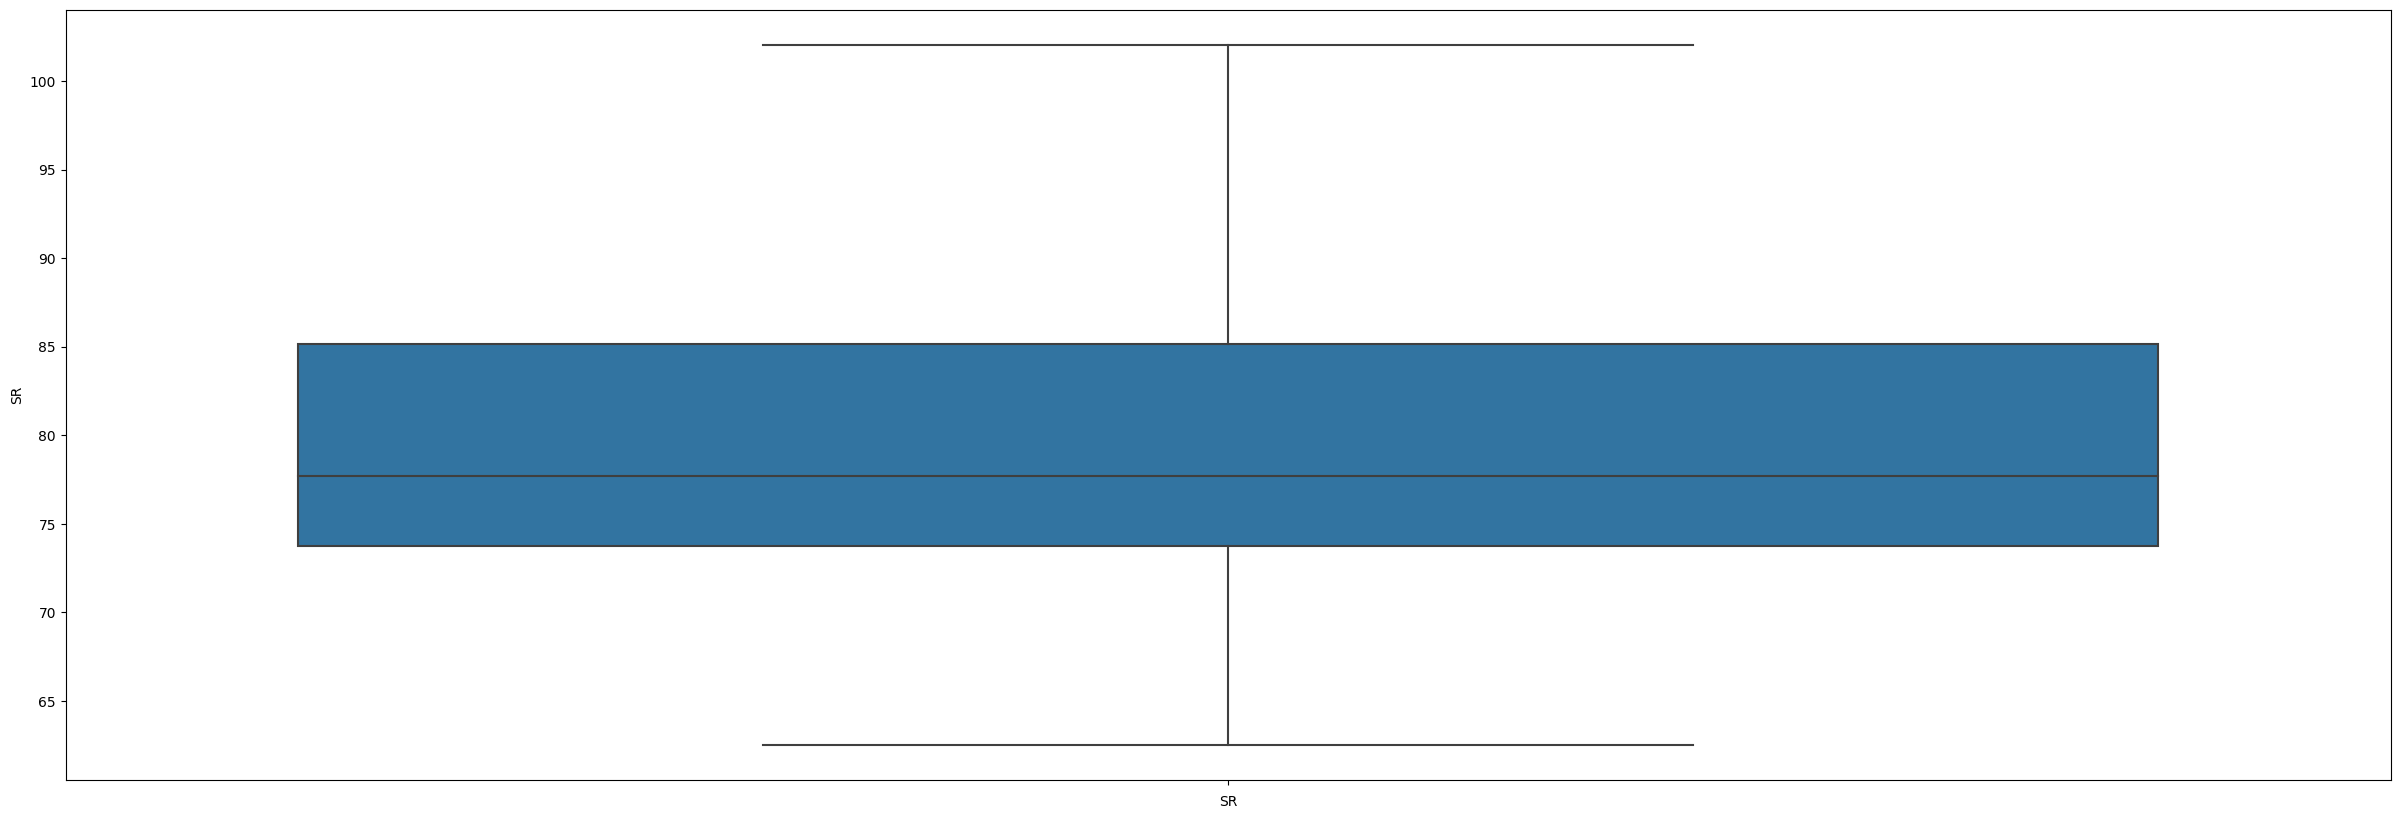

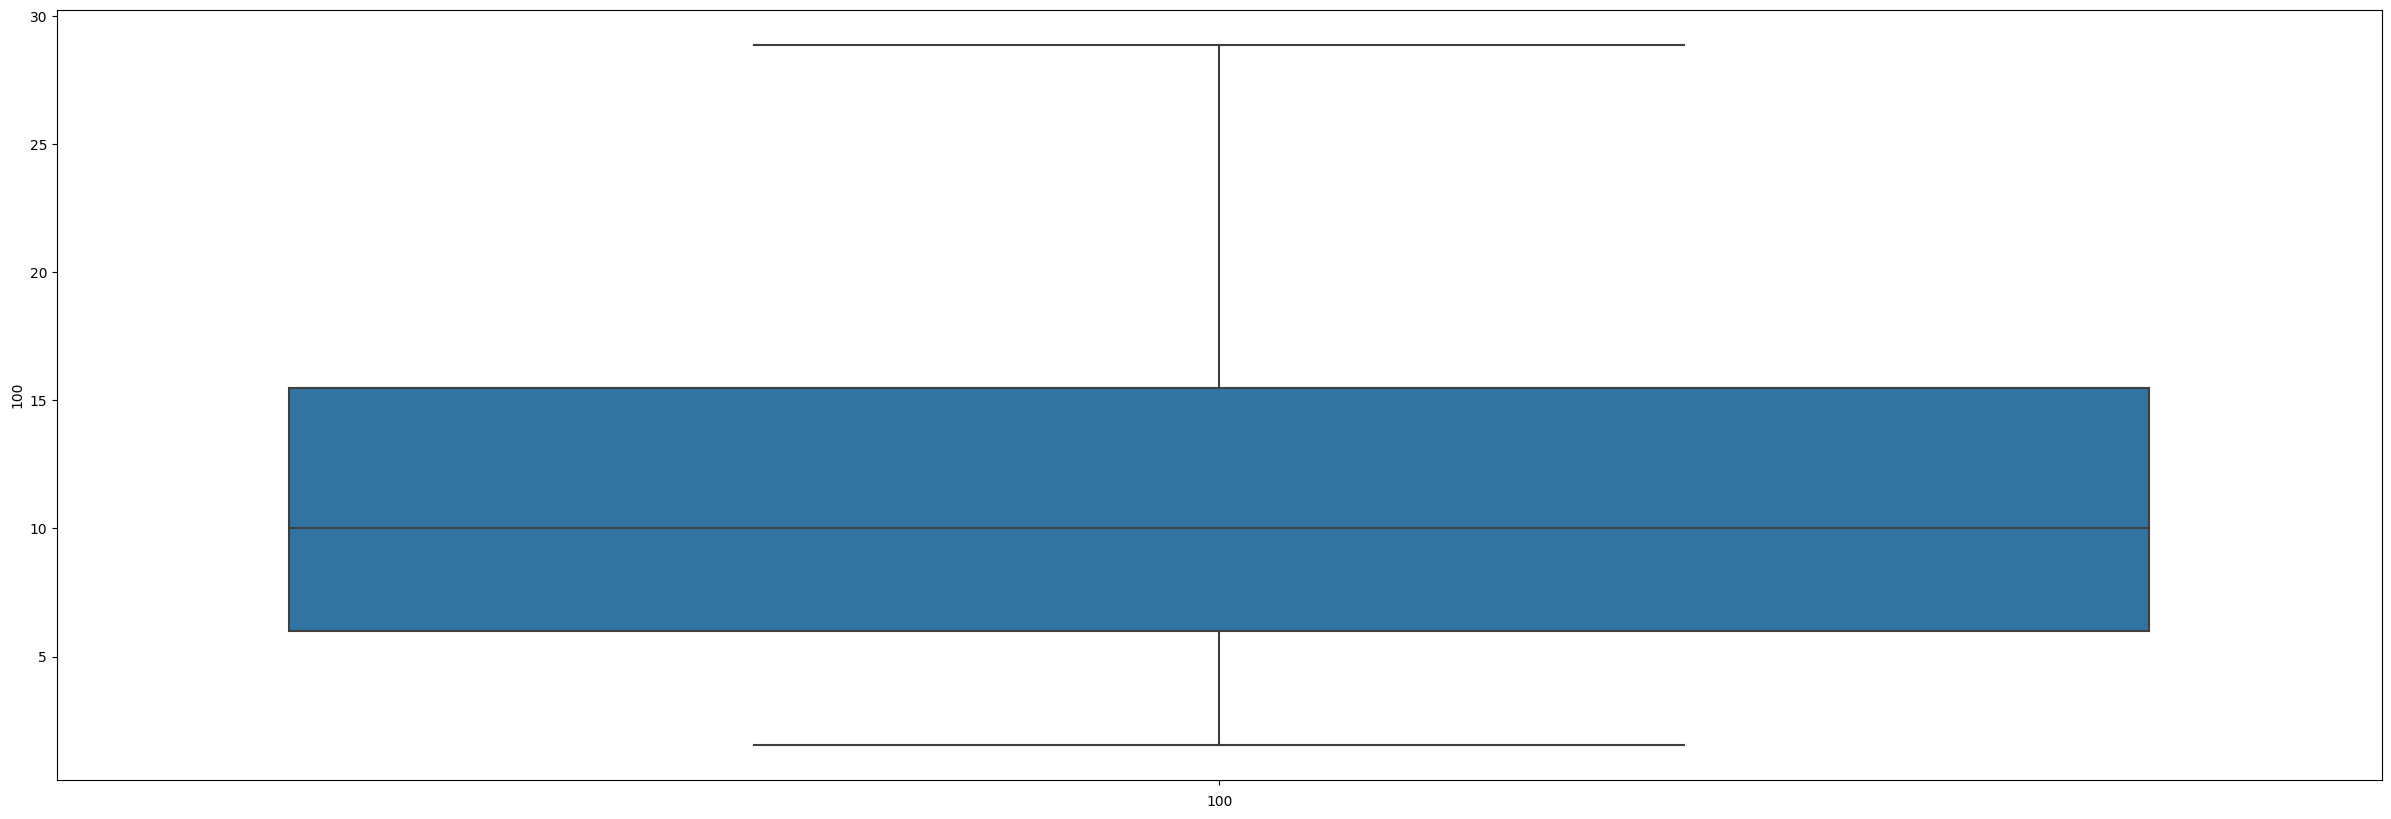

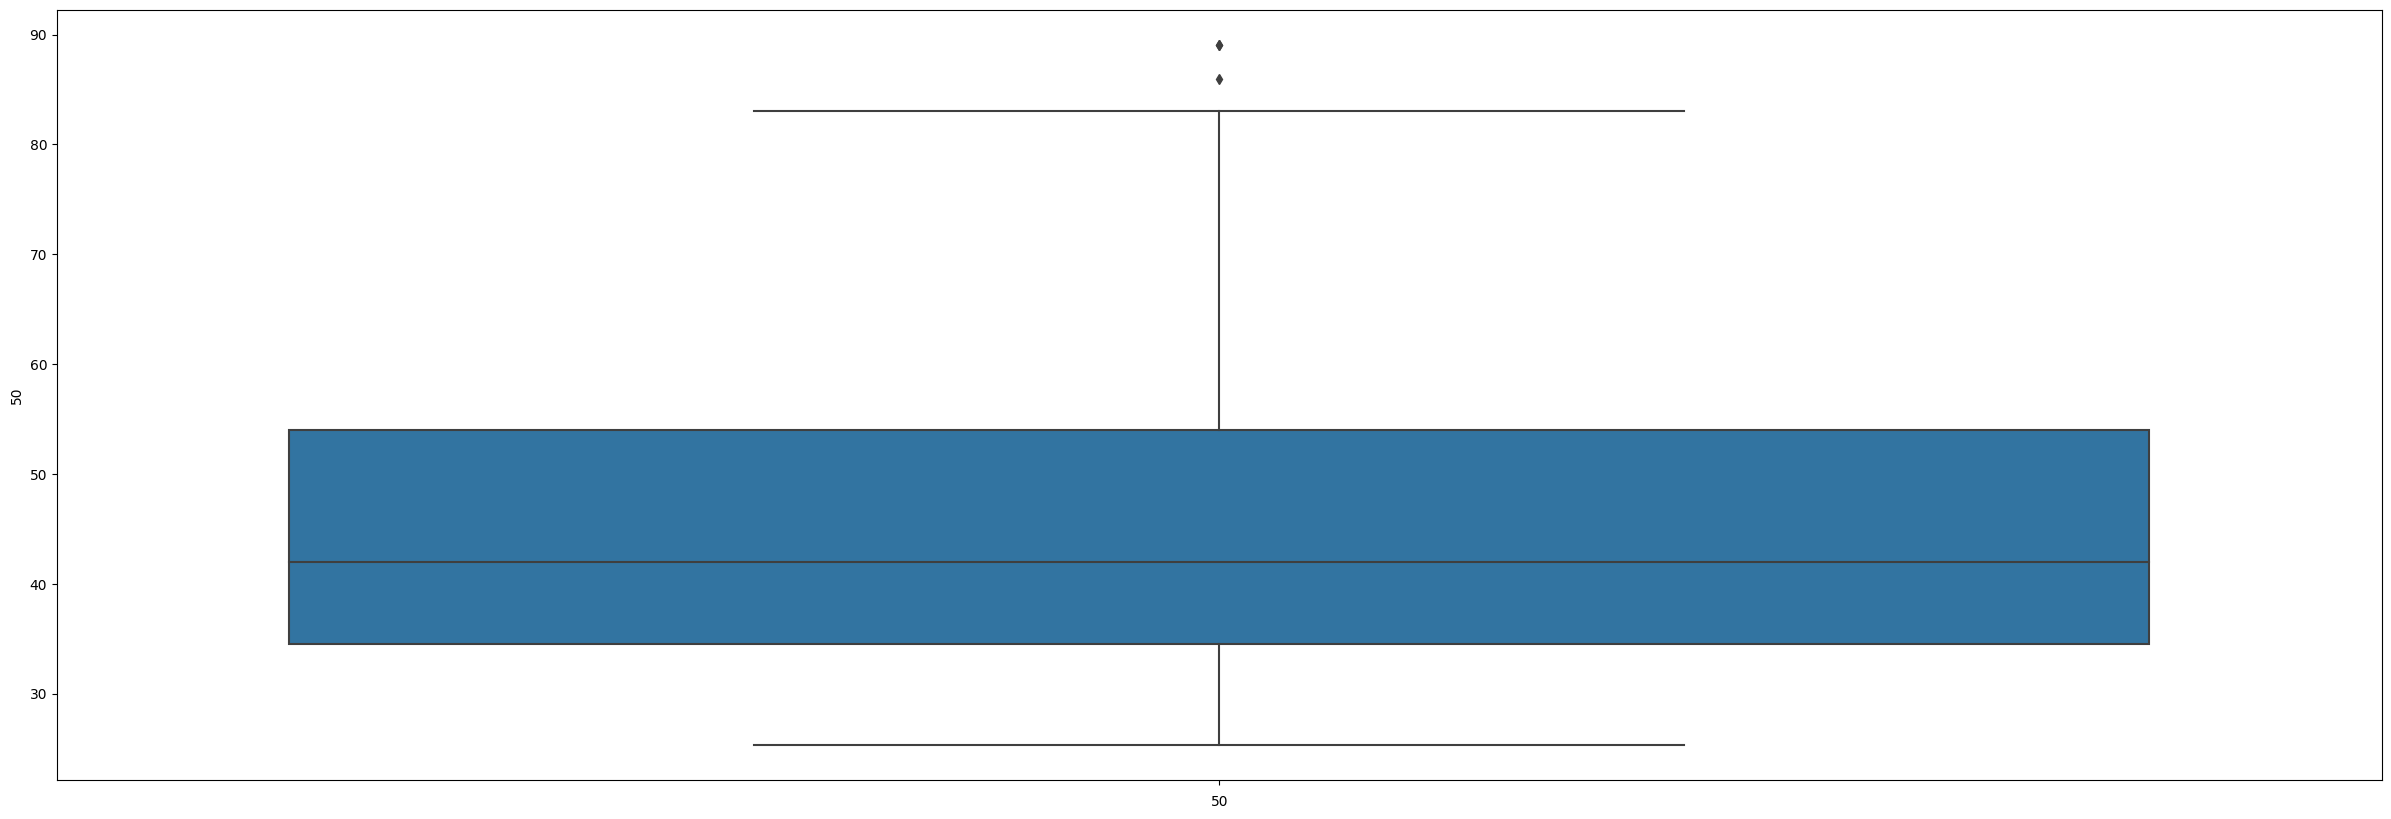

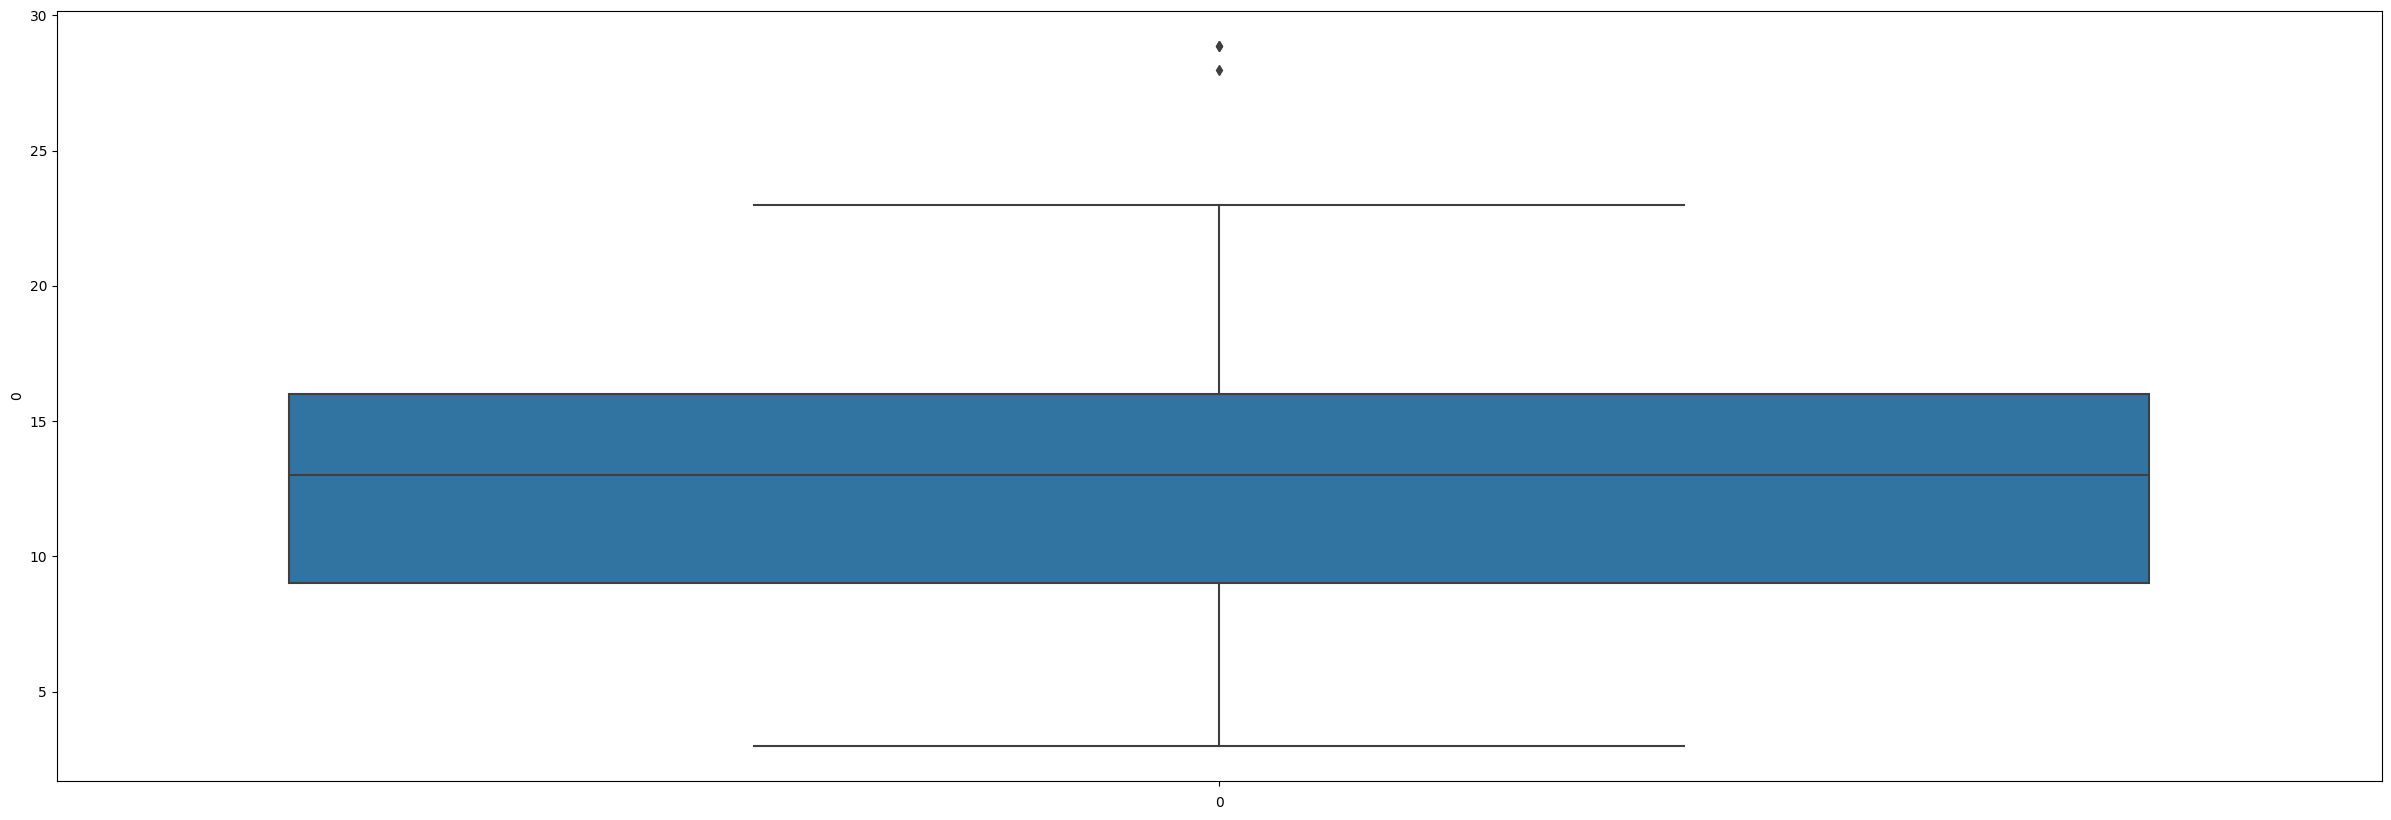

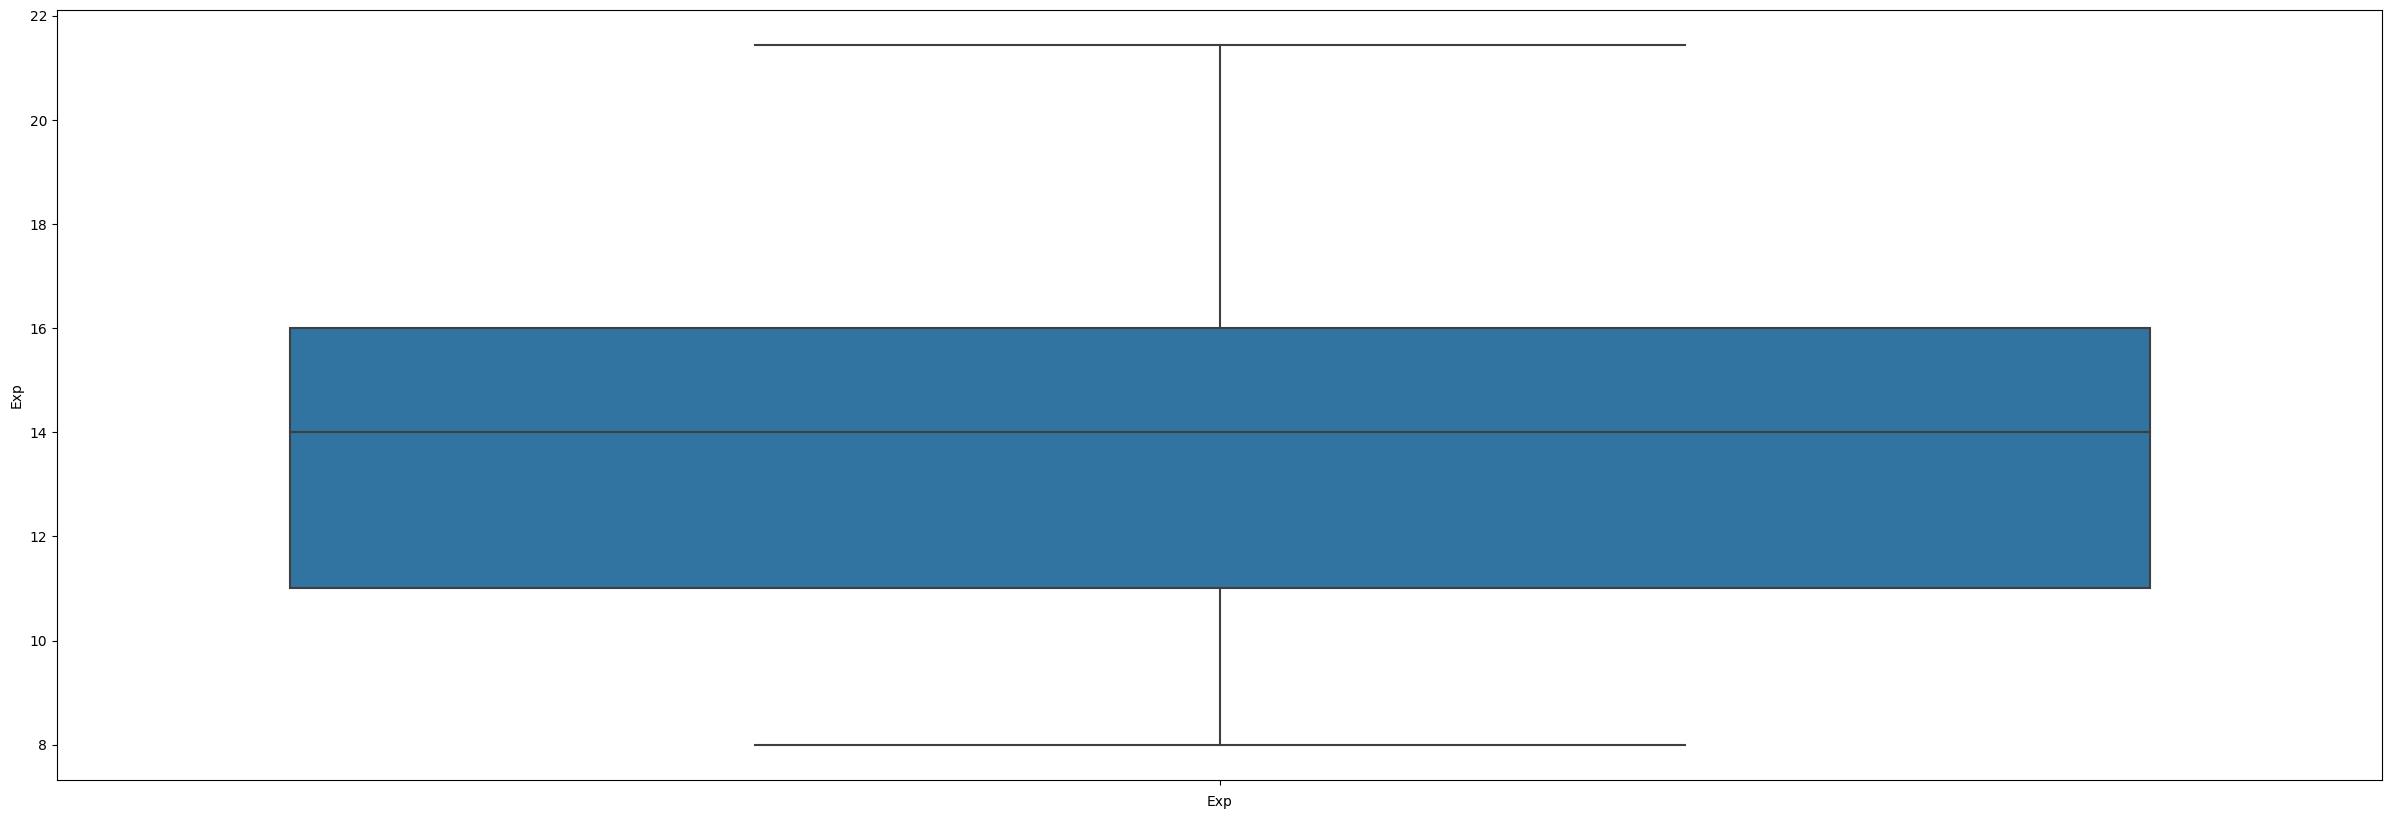

In [21]:
for i in cric_df.columns:
    if i!= "Player":
        plt.figure(figsize=(30,10))
        sns.boxplot(y=i,data=cric_df)
        plt.xlabel(i)
        plt.xticks(rotation=90)
        plt.show()

In [22]:
pd.set_option("display.float_format",lambda x:"%.2f" %x)
cric_df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),446.32,424.60,41.00,13937.20,200.00,44.83,17486.88,86.23,28.88,89.08,20.00,21.44
1,KC Sangakkara (Asia/ICC/SL),404.00,380.00,41.00,13937.20,169.00,41.98,17486.88,78.86,25.00,89.08,15.00,15.00
2,RT Ponting (AUS/ICC),375.00,365.00,39.00,13704.00,164.00,42.03,17046.00,80.39,28.88,82.00,20.00,17.00
3,ST Jayasuriya (Asia/SL),445.00,424.60,18.00,13430.00,189.00,32.36,14725.00,91.20,28.00,68.00,28.88,21.44
4,DPMD Jayawardene (Asia/SL),446.32,418.00,39.00,12650.00,144.00,33.37,16020.00,78.96,19.00,77.00,28.00,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),142.04,139.48,13.00,5134.00,133.00,45.03,7908.00,64.92,11.00,31.00,3.00,16.00
75,Misbah-ul-Haq (PAK),162.00,149.00,31.00,5122.00,100.68,43.40,6945.00,73.75,1.56,42.00,6.00,13.00
76,PD Collingwood (ENG),197.00,181.00,37.00,5092.00,120.00,35.36,6614.00,76.98,5.00,26.00,7.00,10.00
77,A Symonds (AUS),198.00,161.00,33.00,5088.00,156.00,39.75,5842.52,92.44,6.00,30.00,15.00,11.00


In [23]:
cric_df_drop=cric_df.copy()
player= cric_df_drop.pop('Player')

In [24]:
# After visualization and cleaning and also treat some higher oultier and taking only numerical columns
from sklearn.preprocessing import StandardScaler

In [25]:
#MODEL BULIDING
scaler=StandardScaler()
cric_df_scaled= scaler.fit_transform(cric_df_drop)
cric_df1=pd.DataFrame(cric_df_scaled)

In [26]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

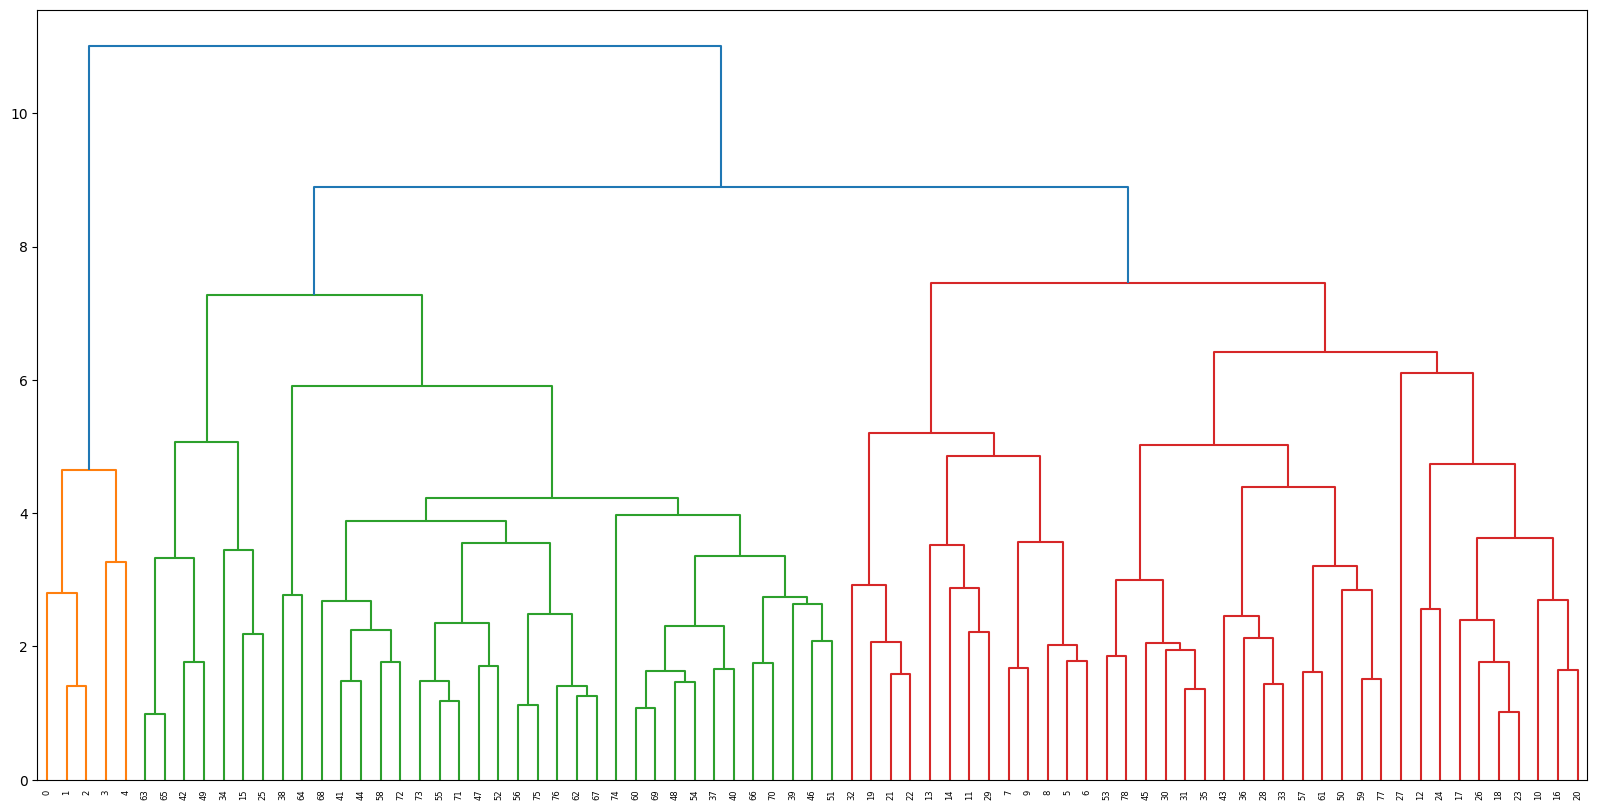

In [27]:
plt.figure(figsize=(20,10))
"""euclidean gives the distance in the n dimensional data and method is used to farthest distance
between the points of two different cluster""" 
merging=linkage(cric_df1,method="complete",metric='euclidean')
dendrogram(merging)
plt.xticks(rotation=90)
plt.show()

In [28]:
from scipy.cluster.hierarchy import cut_tree
# go with the 4 cluster can go with 3 or look appropiate with the dendrogram
cluster_label=cut_tree(merging,n_clusters=4).reshape(-1,)
cluster_label

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2])

In [29]:
df_hc=cric_df.copy()
df_hc["cluster_label"]=cluster_label
df_hc

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster_label
0,SR Tendulkar (INDIA),446.32,424.60,41.00,13937.20,200.00,44.83,17486.88,86.23,28.88,89.08,20.00,21.44,0
1,KC Sangakkara (Asia/ICC/SL),404.00,380.00,41.00,13937.20,169.00,41.98,17486.88,78.86,25.00,89.08,15.00,15.00,0
2,RT Ponting (AUS/ICC),375.00,365.00,39.00,13704.00,164.00,42.03,17046.00,80.39,28.88,82.00,20.00,17.00,0
3,ST Jayasuriya (Asia/SL),445.00,424.60,18.00,13430.00,189.00,32.36,14725.00,91.20,28.00,68.00,28.88,21.44,0
4,DPMD Jayawardene (Asia/SL),446.32,418.00,39.00,12650.00,144.00,33.37,16020.00,78.96,19.00,77.00,28.00,17.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),142.04,139.48,13.00,5134.00,133.00,45.03,7908.00,64.92,11.00,31.00,3.00,16.00,3
75,Misbah-ul-Haq (PAK),162.00,149.00,31.00,5122.00,100.68,43.40,6945.00,73.75,1.56,42.00,6.00,13.00,3
76,PD Collingwood (ENG),197.00,181.00,37.00,5092.00,120.00,35.36,6614.00,76.98,5.00,26.00,7.00,10.00,3
77,A Symonds (AUS),198.00,161.00,33.00,5088.00,156.00,39.75,5842.52,92.44,6.00,30.00,15.00,11.00,2


In [30]:
df_hc[df_hc['cluster_label']==0].sort_values(by=['Mat','Ave','SR'],ascending=[False,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster_label
0,SR Tendulkar (INDIA),446.32,424.60,41.00,13937.20,200.00,44.83,17486.88,86.23,28.88,89.08,20.00,21.44,0
4,DPMD Jayawardene (Asia/SL),446.32,418.00,39.00,12650.00,144.00,33.37,16020.00,78.96,19.00,77.00,28.00,17.00,0
3,ST Jayasuriya (Asia/SL),445.00,424.60,18.00,13430.00,189.00,32.36,14725.00,91.20,28.00,68.00,28.88,21.44,0
1,KC Sangakkara (Asia/ICC/SL),404.00,380.00,41.00,13937.20,169.00,41.98,17486.88,78.86,25.00,89.08,15.00,15.00,0
2,RT Ponting (AUS/ICC),375.00,365.00,39.00,13704.00,164.00,42.03,17046.00,80.39,28.88,82.00,20.00,17.00,0


In [31]:
df_hc[df_hc['cluster_label']==1].sort_values(by=['Mat','Ave','SR'],ascending=[False,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster_label
5,Inzamam-ul-Haq (Asia/PAK),378.00,350.00,53.00,11739.00,137.00,39.52,15812.00,74.24,10.00,83.00,20.00,16.00,1
8,R Dravid (Asia/ICC/INDIA),344.00,318.00,40.00,10889.00,153.00,39.16,15284.00,71.24,12.00,83.00,13.00,15.00,1
14,M Azharuddin (INDIA),334.00,308.00,54.00,9378.00,153.00,36.92,12669.00,74.02,7.00,58.00,9.00,15.00,1
6,JH Kallis (Afr/ICC/SA),328.00,314.00,53.00,11579.00,139.00,44.36,15885.00,72.89,17.00,86.00,17.00,18.00,1
7,SC Ganguly (Asia/INDIA),311.00,300.00,23.00,11363.00,183.00,41.02,15416.00,73.70,22.00,72.00,16.00,15.00,1


In [32]:
df_hc[df_hc['cluster_label']==2].sort_values(by=['Mat','Ave','SR'],ascending=[False,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster_label
27,Shahid Afridi (Asia/ICC/PAK),398.00,369.00,27.00,8064.00,124.00,28.19,6892.00,102.05,6.00,39.00,28.88,19.00,2
10,TM Dilshan (SL),330.00,303.00,41.00,10290.00,161.00,39.27,11933.00,86.23,22.00,47.00,11.00,17.00,2
30,SR Waugh (AUS),325.00,288.00,58.00,7569.00,120.00,32.90,9971.00,75.91,3.00,45.00,15.00,16.00,2
16,PA de Silva (SL),308.00,296.00,30.00,9284.00,145.00,34.90,11443.00,81.13,11.00,64.00,17.00,19.00,2
20,Yuvraj Singh (Asia/INDIA),304.00,278.00,40.00,8701.00,150.00,36.55,9924.00,87.67,14.00,52.00,18.00,17.00,2


In [33]:
df_hc.groupby("cluster_label").mean().T

C:\Users\chemi\AppData\Local\Temp\ipykernel_6332\1160964485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hc.groupby("cluster_label").mean().T


cluster_label,0,1,2,3
Mat,423.33,294.54,263.64,189.45
Inns,402.44,276.54,245.28,179.18
NO,35.60,41.69,29.76,25.00
Runs,13531.68,9683.54,7433.01,6046.78
HS,173.20,149.31,150.12,144.13
Ave,38.91,41.64,35.04,39.88
BF,16552.95,13202.08,8942.38,7861.61
SR,83.13,73.61,83.78,77.28
100,25.95,12.85,10.32,9.40
50,81.03,65.85,42.13,37.39


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

In [39]:
X=np.random.rand(50,2)
Y=2+np.random.rand(50,2)
Z=np.concatenate((X,Y))
Z=pd.DataFrame(Z)
Z
sns.scatterplot(x=Z[0],y=Z[1],hue=cluster_label)

ValueError: array length 79 does not match index length 100

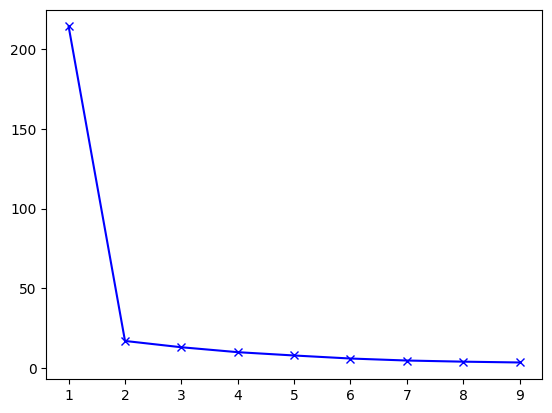

In [40]:
see={}
for k in range(1,10):
    kmean=KMeans(n_clusters=k,random_state=1).fit(Z)
    see[k]=kmean.inertia_
plt.figure()
plt.plot(list(see.keys()),list(see.values()),'bx-')
    

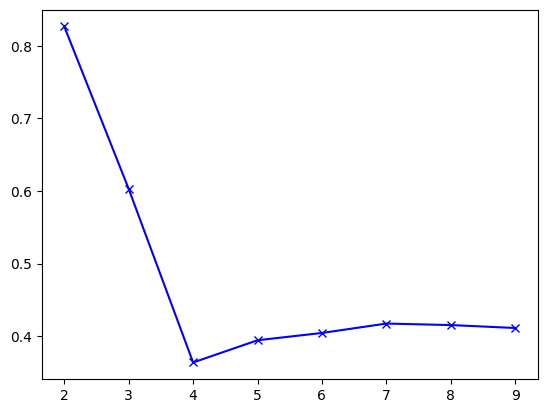

array([3, 8, 6, 6, 0, 8, 6, 3, 6, 0, 8, 0, 0, 0, 3, 6, 0, 8, 3, 6, 8, 4,
       0, 8, 4, 4, 6, 8, 3, 6, 8, 6, 0, 4, 0, 4, 3, 4, 6, 0, 6, 6, 4, 3,
       0, 4, 4, 4, 3, 0, 5, 1, 7, 7, 5, 2, 1, 7, 1, 5, 7, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 5, 7, 2, 2, 2, 7, 5, 2, 2, 7, 2, 7, 2, 2, 1, 2, 5, 2,
       5, 2, 2, 2, 5, 7, 5, 1, 5, 1, 2, 7])

In [262]:
sc={}
for k in range(2,10):
    kmean=KMeans(n_clusters=k,random_state=1).fit(Z)
    label=kmean.predict(Z)
    sc[k]=silhouette_score(Z,label)
plt.figure()
plt.plot(list(sc.keys()),list(sc.values()),'bx-')
plt.show()
label


In [41]:
kmean=KMeans(n_clusters=2)
kmean.fit(Z)
label=kmean.predict(Z)
pd.Series(label).value_counts()
silhouette_score(Z,label)

0.8112508423956399

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

SilhouetteVisualizer(ax=<AxesSubplot: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=2))

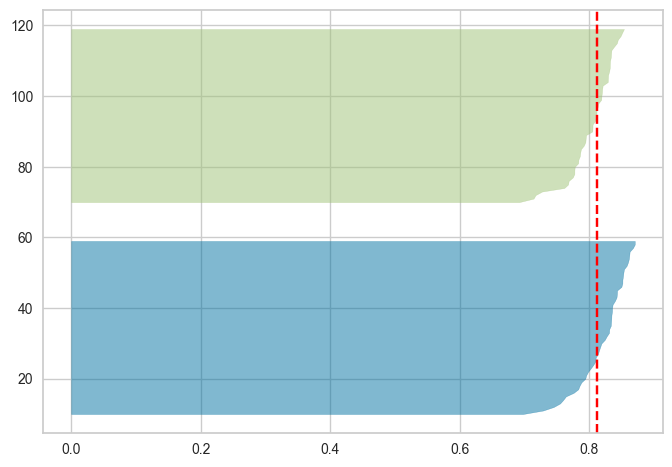

In [43]:
#for i in range(2,6):
model=KMeans(n_clusters=2)
#q,mod=divmod(i,2)
vis=SilhouetteVisualizer(model,colors='yellowbrick',)
vis.fit(Z)

# Association Rule mining

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [22]:
df={'ID':[1,2,3,4,5,6],
    'Onion':[1,0,0,1,1,1],
    'Potato':[1,1,0,1,1,1],
    'Burger':[1,1,0,0,1,1],
    'Milk':[0,1,1,1,0,1],
    'Beer':[0,0,1,0,1,0] }

In [23]:
x=pd.DataFrame(df)
x

,ID,Onion,Potato,Burger,Milk,Beer
0,1,1,1,1,0,0
1,2,0,1,1,1,0
2,3,0,0,0,1,1
3,4,1,1,0,1,0
4,5,1,1,1,0,1
5,6,1,1,1,1,0


In [24]:
frequent_itemsets= apriori(x[["Onion","Potato","Burger","Milk","Beer"]],min_support=0.50,use_colnames=True)

C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [27]:
frequent_itemsets

,support,itemsets
0,0.666667,(Onion)
1,0.833333,(Potato)
2,0.666667,(Burger)
3,0.666667,(Milk)
4,0.666667,"(Onion, Potato)"
5,0.500000,"(Onion, Burger)"
6,0.666667,"(Burger, Potato)"
7,0.500000,"(Potato, Milk)"
8,0.500000,"(Onion, Burger, Potato)"


In [33]:
association_rules(frequent_itemsets,metric='confidence',min_threshold=0.8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf
1,(Burger),(Potato),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf
2,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.0,1.2,0.083333,inf


In [36]:
    association_rules(frequent_itemsets,metric='lift',min_threshold=0.8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.00,1.200,0.111111,inf
1,(Potato),(Onion),0.833333,0.666667,0.666667,0.80,1.200,0.111111,1.666667
2,(Onion),(Burger),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333
3,(Burger),(Onion),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.00,1.200,0.111111,inf
5,(Potato),(Burger),0.833333,0.666667,0.666667,0.80,1.200,0.111111,1.666667
6,(Potato),(Milk),0.833333,0.666667,0.500000,0.60,0.900,-0.055556,0.833333
7,(Milk),(Potato),0.666667,0.833333,0.500000,0.75,0.900,-0.055556,0.666667
8,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.00,1.200,0.083333,inf
9,"(Onion, Potato)",(Burger),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333


In [51]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
#retail=pd.DataFrame(mlb.fit_transform(retail.Basket),columns=mlb.classes_)

In [15]:
import pandas as pd
x=1,2,3,4,5
y=2,4,5,4,2
df1=pd.DataFrame(x)
df2=pd.DataFrame(y)
df2.describe()
from scipy import stats as st
st.mode(df1)

C:\Users\chemi\AppData\Local\Temp\ipykernel_17344\1232613751.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  st.mode(df1)


ModeResult(mode=array([[1]], dtype=int64), count=array([[1]]))